## **Data Analysis**

**Input for our analysis:**
- **Angel - Startup relations**
- **Startup list** including Name, #of angel investors, industry, region
- **Angel list** including #of investments, name, region, average shares, number of investments per industry

**Steps of our analysis:**

1. **Creating a network graph**

2. **Descriptive Statistics** on:
   - _Angels_
   - _Startups_
   - _Network_

3. **Simulating a network graph with Null distribution**

4. **Community detection** in actual and simulated communities

5. **Analysis of similarity of communities** in terms of:
   - _Reach and Power_
   - _Investment Style_
   - _Personal Characteristics_

## Importing libraries and data - 0

In [10]:
#all libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime


In [11]:
#all data sets
#open from csv the shareholder list as a dataframe

df_investment_rel_angel_startup = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/data_all_SH/investment_rel_angels.csv")
    #open from csv the shareholders as a dataframe
# df_shareholders = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/shareholders.csv', sep=';')
    #open from csv the investments as a dataframe
df_angels = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/data_all_SH/angels.csv")
    #open from csv the startups as a dataframe
df_startups = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/data_all_SH/startups_all_shareholders.csv")
#get all shareholder with shareholder type angel    
# df_angels = df_angels[df_angels['shareholder_type'] == 'angel']


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/3972750702.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_angels = pd.read_csv("/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/data_all_SH/angels.csv")


In [12]:
#replace shareholder_name spaces with _
df_angels['shareholder_name'] = df_angels['shareholder_name'].str.replace(' ', '_')

In [13]:
#for each angel count how often the occur in df_invetment_rel_angel_startup and add it to number_of_investments_2
df_angels['number_of_investments_2'] = df_angels['shareholder_name'].map(df_investment_rel_angel_startup['shareholder_name_mapped'].value_counts())
#return all angels where number_of investments is unequal to number_of_investments_2
df_angels[df_angels['number_of_investments'] != df_angels['number_of_investments_2']]


Empty DataFrame
Columns: [Unnamed: 0, shareholder_name_old, shareholder_id, created_at, number_of_investments, shareholder_type, register_id, register_court, total_participation, register_mapping, shareholder_purpose, link_structured_content_file_current, gender, firstname, lastname, list_mds, shareholder_location, error, investment_type, test, founding_date, title, age, shareholder_name_mapped_double, shareholder_name, region_mapping, production_trade, technology_digital_services, energy_environment_infrastructure, healthcare, services_consulting, mobility, software, food, industry, staffing, energy, media, service, construction, hardware, blockchain_crypto, gaming, medicine_biotech, agriculture, real_estate, environmental_technology, sports, education, ecommerce, finance, tourism, advertising, logistics, legal_consulting, insurance, berlin, munich, stuttgart, leipzig, cologne, frankfurt, hamburg, other, international, mannheim, birthdate, 2017, 2018, 2019, 2020, 2021, status, number_of_investments_2]
Index: []

[0 rows x 74 columns]

In [14]:
#get unique startup_ids
unique_startup_ids = df_investment_rel_angel_startup['startup_id'].unique()
len(unique_startup_ids)

5830

## Stats on All Angels, Startups with angel funding, and network graph of all angels - 1

In [15]:
df_angel_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of angels and add to df_angel_descriptive with variable name "total_number_of_angels"
total_number_of_angels = len(df_angels)
df_angel_descriptive.loc[0] = ["total_number_of_angels", total_number_of_angels]
#Calculate the amount of males among the angels
number_of_male_angels_total = len(df_angels[df_angels['gender'] == 'male'])
df_angel_descriptive.loc[1] = ["number_of_male_angels", number_of_male_angels_total]
#Calculate the amount of females among all angels
number_of_female_angels_total = len(df_angels[df_angels['gender'] == 'female'])
df_angel_descriptive.loc[2] = ["number_of_female_angels", number_of_female_angels_total]

# calculate share of female angels
share_of_female_angels = number_of_female_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[3] = ["share_of_female_angels_total", share_of_female_angels]

#calculate share of male angels
share_of_male_angels = number_of_male_angels_total / (number_of_female_angels_total+number_of_male_angels_total)
df_angel_descriptive.loc[4] = ["share_of_male_angels_total", share_of_male_angels]

#cast column number of age to integer
df_angels['age'] = pd.to_numeric(df_angels['age'], errors='coerce').fillna(1).astype(int)
#calculate mean of age for all angels where age is not 0
df_angels_mf = df_angels[df_angels['age'] != 1]
mean_age_of_all_angels = df_angels_mf['age'].mean()
df_angel_descriptive.loc[5] = ["mean_age_of_all_angels", mean_age_of_all_angels]

#Calculate mean age of female angels
df_female_angels = df_angels[df_angels['gender']=='female']
mean_age_of_female_angels = df_female_angels['age'].mean()
df_angel_descriptive.loc[6] = ["mean_age_of_all_female_angels", mean_age_of_female_angels]

#Calculate mean age of male angels
df_male_angels = df_angels[df_angels['gender']=='male']
mean_age_of_male_angels = df_male_angels['age'].mean()
df_angel_descriptive.loc[7] = ["mean_age_of_all_male_angels", mean_age_of_male_angels]



# df_gender_unknown = df_angels[df_angels['gender'] =='unknown']
# mean_age_unknown = df_gender_unknown['age'].mean()
# df_angel_descriptive.loc[8] = ["mean_age_of_all_unknown_angels", mean_age_unknown]

#Calulate total number of active angels and add to df_angel_descriptive with variable name "total_number_of_active_angels"
total_number_of_active_angels = len(df_angels[df_angels['status'] == 'active'])
df_angel_descriptive.loc[9] = ["total_number_of_active_angels", total_number_of_active_angels]

# Calculate number of angels investing through a holding and add to df_angel_descriptive with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels[df_angels['investment_type'] == 'holding'])
# add them to df
df_angel_descriptive.loc[10] = ["number_of_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]

#Calculate number of angels investing as a person and add to df_angel_descriptive with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels[df_angels['investment_type'] == 'person'])



# add them to df
df_angel_descriptive.loc[11] = ["number_of_angels_investing_as_a_person", number_of_angels_investing_as_a_person]

share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[12] = ["share_of_investments_through_holding", share_of_investments_through_holding]
# #share of investments through holding and add to df_angel_descriptive with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angel_descriptive.loc[13] = ["share_of_investments_as_person", share_of_investments_as_person]

#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels[df_angels['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angel_descriptive.loc[14] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]



df_angel_descriptive

variable         value
0                         total_number_of_angels  13030.000000
1                          number_of_male_angels  10191.000000
2                        number_of_female_angels   1562.000000
3                   share_of_female_angels_total      0.132902
4                     share_of_male_angels_total      0.867098
5                         mean_age_of_all_angels     45.381879
6                  mean_age_of_all_female_angels     44.710627
7                    mean_age_of_all_male_angels     45.509764
9                  total_number_of_active_angels    945.000000
10  number_of_angels_investing_through_a_holding   4086.000000
11        number_of_angels_investing_as_a_person   8944.000000
12          share_of_investments_through_holding      0.313584
13                share_of_investments_as_person      0.686416
14           ratio_of_angels_with_academic_title      0.136628

In [16]:
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))
#take subset of df startups that are in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_angel_funded_companies", total_number_of_startups]
i=i+1
df_startup_descriptive

#get subset of startups with more than 2 shareholders
df_startups = df_startups[df_startups['number_active_angels'] > 0]
#get subset of startups that is also in df_investment_rel_angel_startup
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]
number_startups_in_dataset=len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups_in_dataset", number_startups_in_dataset]
df_startup_descriptive

variable  value
0  total_number_of_angel_funded_companies   5830
1     total_number_of_startups_in_dataset   1326

In [17]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels['shareholder_name'])]
# only angels where status is active



# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

shareholder_name_mapped_x  \
46145                                  ROMM_Holding_GmbH   
46134                                  ROMM_Holding_GmbH   
60127                                     whiletrue_GmbH   
48175                       Roskopf_Ventures_GmbH_Berlin   
2188                                          Alvio_GmbH   
...                                                  ...   
20205                                 Flavia_Baldassarri   
20206                                 Flavia_Baldassarri   
20207                                 Flaßkamp_Christian   
20208  Flechsenhar_Ventures_UG_(haftungsbeschränkt)_B...   
60251                                          Žan_Pevec   

                               shareholder_name_mapped_y  CoInvestments  
46145                                     whiletrue_GmbH              6  
46134                       Roskopf_Ventures_GmbH_Berlin              6  
60127                                  ROMM_Holding_GmbH              6  
48175                                  ROMM_Holding_GmbH              6  
2188                                      whiletrue_GmbH              5  
...                                                  ...            ...  
20205                                       Martin_Maier              1  
20206                                 Matthias_Heininger              1  
20207                                   Christoph_Cauvet              1  
20208  Noxontown_UG_(haftungsbeschränkt)_Berlin_AG_Ch...              1  
60251                                SFO_Investment_GmbH              1  

[60252 rows x 3 columns]

In [18]:
# # Create a graph from the co_investment_counts DataFrame
# #get subset where co-investments >1
# # co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
# G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# # Draw the graph
# pos = nx.spring_layout(G)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap
# #nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
# #save plot as png
# plt.savefig('output/graphs/co_investments_all_angels.png')
# plt.show()


In [19]:
# # get largest connected component
# largest_cc = max(nx.connected_components(G), key=len)
# subgraph = G.subgraph(largest_cc)
# # Draw the graph
# pos = nx.spring_layout(subgraph)
# #make the graph bigger
# plt.figure(figsize=(20,20))
# nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
# #add a heatmap

# #save plot as png
# plt.savefig('output/graphs/co_investments_largest_connected_component.png')

In [20]:
# import pandas as pd
# from d3graph import d3graph, vec2adjmat
# source = co_investment_counts['shareholder_name_mapped_x']
# target = co_investment_counts['shareholder_name_mapped_y']
# weight = co_investment_counts['CoInvestments']


# adjmat = vec2adjmat(source, target, weight=weight)
# print(adjmat)
# # Initialize
# d3 = d3graph()

# d3.graph(adjmat)
# # save as graph.html in dataframes
# d3.show('dataframes/graph.html')
# # Additional customization for interactivity


# # Convert to html and open in the browser
# d3.show(filepath='output/graphs/graph_all_angels.html')


In [21]:
#get subset of active angels
df_angels_active = df_angels[df_angels['status']=='active']
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]
df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup['startup_name'])]

In [22]:
#print length of angels_active, df_investment_rel_angel_startup and df_startups
print(f"NUmber active angels {len(df_angels_active)}")
print(f"Number inv_relations {len(df_investment_rel_angel_startup)}")
print(f"number of startups with active angels {len(df_startups)}")

NUmber active angels 945
Number inv_relations 2441
number of startups with active angels 1326


## Creating a network graph of active angels


In [23]:
# get a list of co-investments
#get subset of df_investment_rel_angel_startup where shareholder_name_mapped is part of df_angels_active
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]
#only take rleations where shareholder type is insitution

print(len(df_investment_rel_angel_startup))
# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
co_investment_counts

2441


shareholder_name_mapped_x  \
4047                                ROMM_Holding_GmbH   
4053                                ROMM_Holding_GmbH   
4387                     Roskopf_Ventures_GmbH_Berlin   
5544                                   whiletrue_GmbH   
5546                                   whiletrue_GmbH   
...                                               ...   
1975                                GPS_Ventures_GmbH   
1974                                GPS_Ventures_GmbH   
1973  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
1972  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
5567                  wrapall_UG_(haftungsbeschränkt)   

               shareholder_name_mapped_y  CoInvestments  
4047        Roskopf_Ventures_GmbH_Berlin              6  
4053                      whiletrue_GmbH              6  
4387                   ROMM_Holding_GmbH              6  
5544                   ROMM_Holding_GmbH              6  
5546        Roskopf_Ventures_GmbH_Berlin              5  
...                                  ...            ...  
1975                     Matthias_Müller              1  
1974             Dr._Gabriele_Laschinski              1  
1973                    WOLFGANG_SCHMIDT              1  
1972  ULRICH_CHRISTOPH_HEINRICH_HELLBERG              1  
5567                     about:seed_GmbH              1  

[5568 rows x 3 columns]

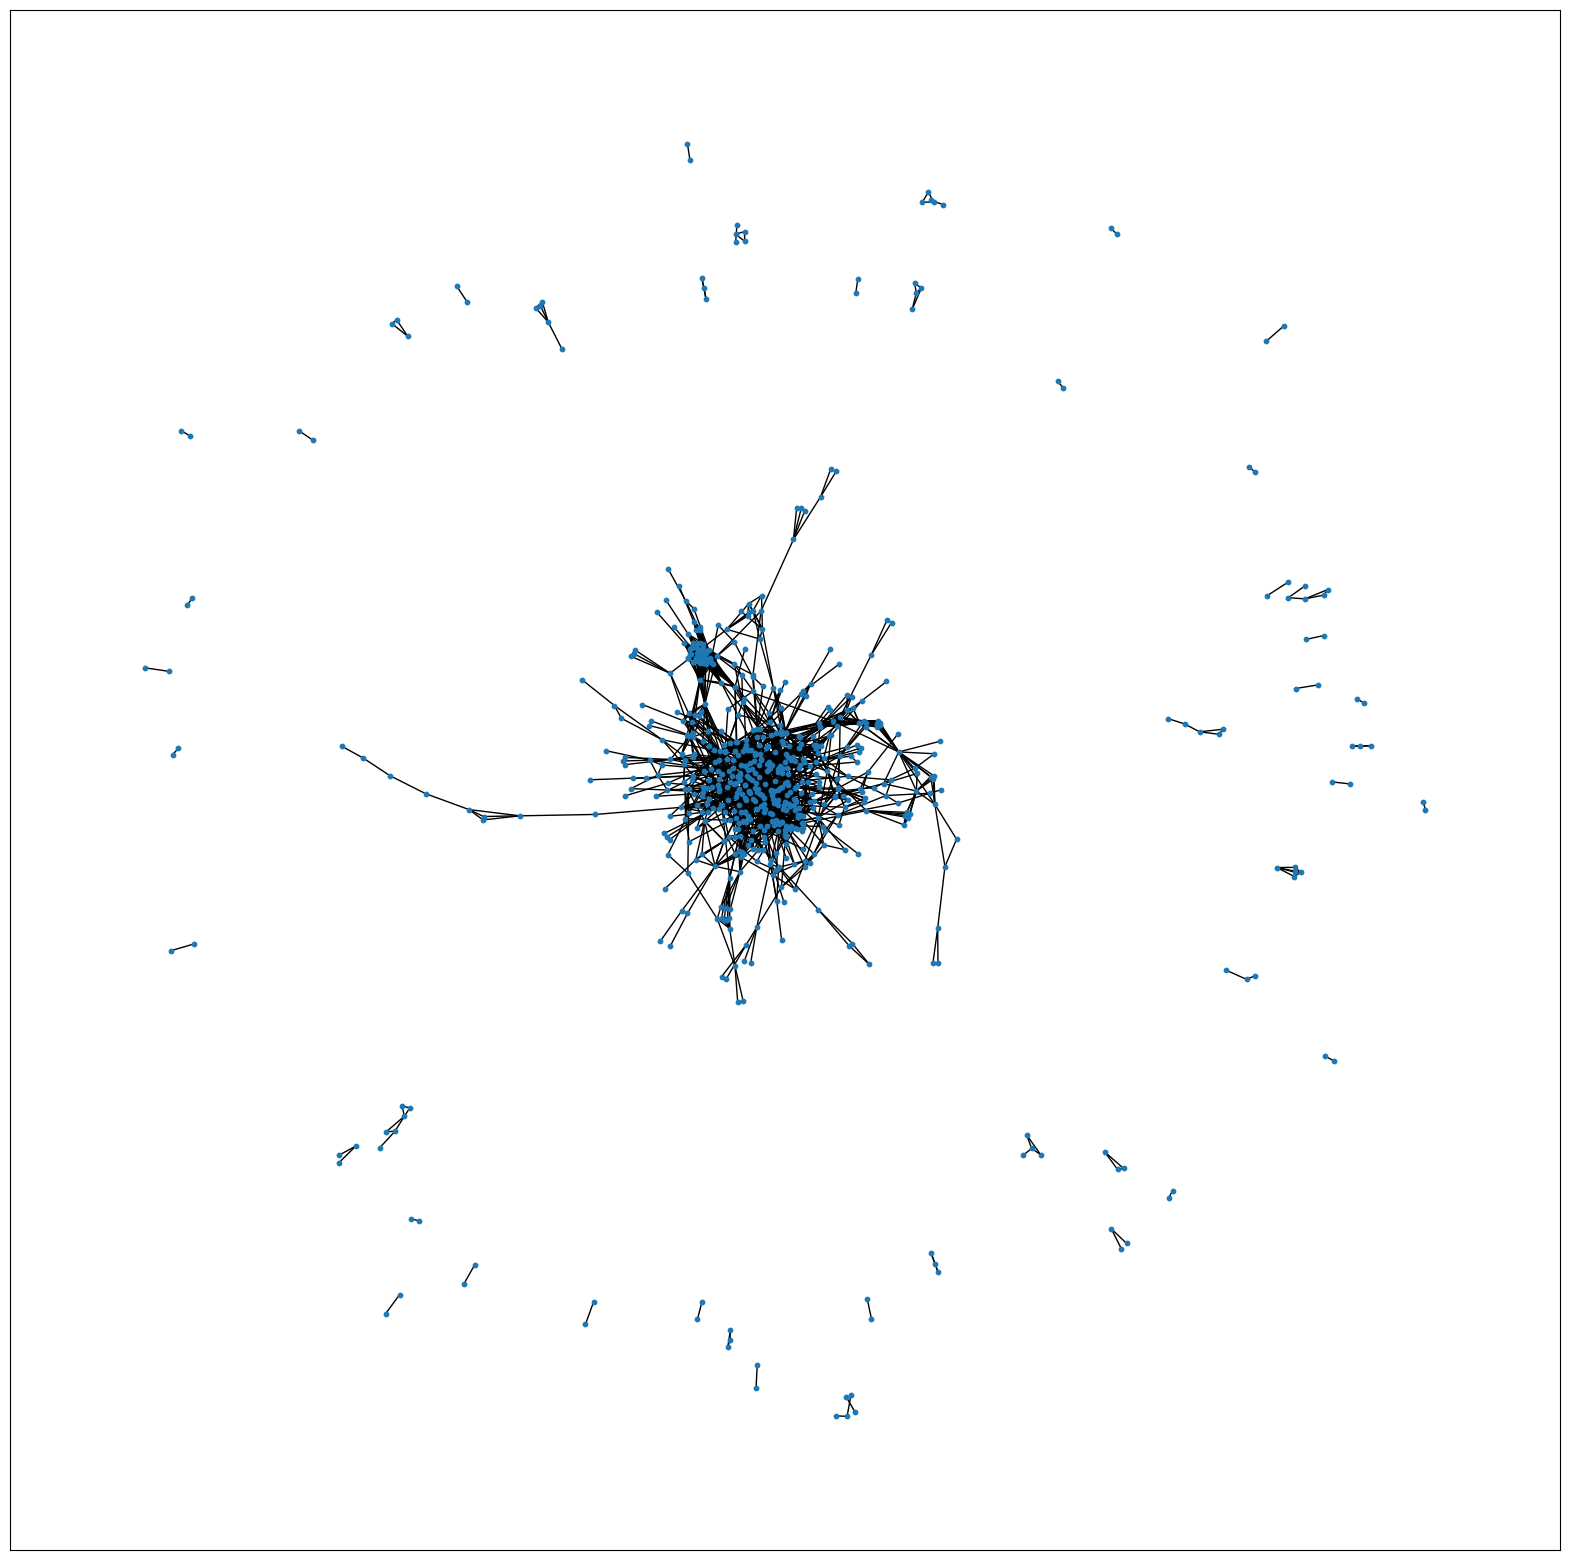

In [24]:
# Create a graph from the co_investment_counts DataFrame
#get subset where co-investments >1
# co_investment_counts = co_investment_counts[co_investment_counts['CoInvestments'] > 1]
G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
plt.savefig('graphs/co_investments_active_angels.png')
plt.show()
#save plot as png




In [25]:
import pandas as pd
from d3graph import d3graph, vec2adjmat
source = co_investment_counts['shareholder_name_mapped_x']
target = co_investment_counts['shareholder_name_mapped_y']
weight = co_investment_counts['CoInvestments']


adjmat = vec2adjmat(source, target, weight=weight)

# Initialize
d3 = d3graph()

d3.graph(adjmat)
# save as graph.html in dataframes
d3.show('dataframes/graph.html')
# Additional customization for interactivity


# Convert to html and open in the browser
d3.show(filepath='output/graphs/graph_active_angels_mor_than_one_SH.html')


[d3graph] INFO> Set directed=True to see the markers!
[d3graph] INFO> Keep only edges with weight>0
[d3graph] INFO> Converting source-target into adjacency matrix..
[d3graph] INFO> Making the matrix symmetric..
[d3graph] INFO> Converting adjacency matrix into source-target..
[d3graph] WARNING> Colormap [Set2] can not create [67] unique colors! Available unique colors: [8].
[d3graph] INFO> Number of unique nodes: 709
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmppiw77y2l/d3graph.html]
[d3graph] INFO> File already exists and will be overwritten: [/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/tmppiw77y2l/d3graph.html]
[d3graph] INFO> Slider range is set to [0, 6]
[d3graph] INFO> Write to path: [/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/output/graphs/graph_active_angels_mor_than_one_SH.html]
[d3graph] INFO> File already exists and will be overwritten: [/Users/annabellschafer/Desktop/

In [26]:
#save df_angels_active to csv
df_angels_active.to_csv('output/df_angels_active_check.csv', index=False)

## **Descriptive Statistics** - 2

In [27]:
#add column full name where you concatenate firstname and lastname
df_angels_active['full_name'] = df_angels_active['firstname'] + ' ' + df_angels_active['lastname']
df_angels_active

#now save a subset of the first 500 rows
df_angels_active_subset = df_angels_active.head(500)

#now save a subset of the bottom 403 rows
df_angels_active_subset2 = df_angels_active.tail(403)

#save both as csv
df_angels_active_subset.to_csv('df_angels_active_subset.csv', index=False)
df_angels_active_subset2.to_csv('df_angels_active_subset2.csv', index=False)


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/1838792202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['full_name'] = df_angels_active['firstname'] + ' ' + df_angels_active['lastname']


In [28]:
#read in 2 csvs and concatenate them
df_angels_active_subset = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/namsor_full-name-country_df_angels_active_subset (2).csv')
df_angels_active_subset2 = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/namsor_full-name-country_df_angels_active_subset2.csv')
df_angels_active_subset = pd.concat([df_angels_active_subset, df_angels_active_subset2])
df_angels_active_subset
df_angels_active =df_angels_active_subset

In [29]:
df_angels_active['region_mapping']
#fill Nan with other
df_angels_active['region_mapping'] = df_angels_active['region_mapping'].fillna('other')

Descriptive Statistics on Angels

In [30]:

# And 'gender', 'firstname', 'lastname', and 'country' are columns in df_angels_active_subset
df_angels_active = df_angels[df_angels['status'] == 'active']
df_angels_active['country']=""
#in df_angels_active replace all spaces with _
df_angels_active['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(' ', '_')

# Assuming 'df_angels_active' and 'df_angels_active_subset' are already defined and correct
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    subset_row = df_angels_active_subset[df_angels_active_subset['shareholder_name'] == angel]
    
    if not subset_row.empty:
        df_angels_active.at[index, 'firstname'] = subset_row['firstname'].values[0]
        df_angels_active.at[index, 'lastname'] = subset_row['lastname'].values[0]
        df_angels_active.at[index, 'gender'] = subset_row['gender'].values[0]
        df_angels_active.at[index, 'country'] = subset_row['country'].values[0]
    else:
        # Handle cases where the angel is not found in the subset
        # You might want to set default values or perform some other action
        pass


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/3090683523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['country']=""
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/3090683523.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(' ', '_')


In [31]:
df_angels_descriptive_active = pd.DataFrame(columns=("variable","value"))
i=0
#only consider active angels
# df_angels_active = df_angels[df_angels['status'] == 'active']

# Calculate number of angels investing through a holding and add to df_angels_descriptive_active with variable name "number_of_angels_investing_through_a_holding"
number_of_angels_investing_through_a_holding = len(df_angels_active[df_angels_active['investment_type'] == 'holding'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_through_a_holding", number_of_angels_investing_through_a_holding]
i=i+1
#Calculate number of angels investing as a person and add to df_angels_descriptive_active with variable name "number_of_angels_investing_as_a_person"
number_of_angels_investing_as_a_person = len(df_angels_active[df_angels_active['investment_type'] == 'person'])
# add them to df
df_angels_descriptive_active.loc[i] = ["number_of_active_angels_investing_as_a_person", number_of_angels_investing_as_a_person]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_through_holding = number_of_angels_investing_through_a_holding/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_through_holding", share_of_investments_through_holding]
i=i+1
# #share of investments through holding and add to df_angels_descriptive_active with variable name "share_of_investments_through_holding"
share_of_investments_as_person = number_of_angels_investing_as_a_person/(number_of_angels_investing_through_a_holding+number_of_angels_investing_as_a_person)
# add them to df
df_angels_descriptive_active.loc[i] = ["share_of_investments_as_person", share_of_investments_as_person]
i=i+1
# calculate age based on birthdate and add to df_angel

#cast column number of age to integer
df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)

#calculate mean age of angels and add to df_angels_descriptive_active with variable name "mean_age_of_angels"
mean_age_of_angels = df_angels_active['age'].mean()

# add them to df
df_angels_descriptive_active.loc[i] = ["mean_age_of_active_angels", mean_age_of_angels]
i=i+1
#Calculate the amount of males among the active angels
number_of_male_angels_active = len(df_angels_active[df_angels_active['gender'] == 'male'])
df_angels_descriptive_active.loc[i] = ["number_of_male_angels_active", number_of_male_angels_active]
i=i+1
#Calculate the amount of females among the active angels
number_of_female_angels_active = len(df_angels_active[df_angels_active['gender'] == 'female'])
df_angels_descriptive_active.loc[i] = ["number_of_female_angels_active", number_of_female_angels_active]
i=i+1

#calculate share of female angels
share_of_female_angels_active = number_of_female_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels female", share_of_female_angels_active]
i=i+1
#calculate share of male angels
share_of_male_angels_active = number_of_male_angels_active/(number_of_female_angels_active+number_of_male_angels_active)
df_angels_descriptive_active.loc[i] = ["share of active angels male", share_of_male_angels_active]
i=i+1
#Calculate average number of investment per active angel and add to df_angels_descriptive_active with variable name "average_number_of_investments_per_active_angel"
average_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].mean()
# add them to df
df_angels_descriptive_active.loc[i] = ["average_number_of_investments_per_active_angel", average_number_of_investments_per_active_angel]
i=i+1
#Calculate median number of investment per active angel and add to df_angels_descriptive_active with variable name "median_number_of_investments_per_active_angel"
median_number_of_investments_per_active_angel = df_angels_active['number_of_investments'].median()
# add them to df
df_angels_descriptive_active.loc[i] = ["median_number_of_investments_per_active_angel", median_number_of_investments_per_active_angel]
i=i+1
#calculate number of angels where academic titke is not nan
number_of_angels_with_academic_title = len(df_angels_active[df_angels_active['title'].notnull()])

#calculate ratio of angels with academic title and add to df
ratio_of_angels_with_academic_title = number_of_angels_with_academic_title / number_of_angels_investing_as_a_person
df_angels_descriptive_active.loc[i] = ["ratio_of_angels_with_academic_title", ratio_of_angels_with_academic_title]

#calculate ratio of non-Dach names, meaning country is not DE, AT or CH
non_dach = df_angels_active[~df_angels_active['country'].isin(['DE', 'AT', 'CH'])]
number_of_non_dach = len(non_dach)
ratio_of_non_dach = number_of_non_dach / total_number_of_active_angels
df_angels_descriptive_active.loc[i] = ["ratio_of_non_dach", ratio_of_non_dach]

# #Calculate average inustry_HHI per active angel and add to df_angels_descriptive_active with variable name "average_inustry_HHI_per_active_angel"
# average_inustry_HHI = df_angels_active['industry_HHI'].mean()
# # add them to df
# df_angels_descriptive_active.loc[12] = ["average_industry_HHI", average_inustry_HHI]

# #Calculate average industry HHI across angels and add to df_angels_descriptive_active with variable name "average_industry_HHI_across_angels"
# average_industry_HHI_across_angels = df_angels_active['industry_HHI_angel'].mean()
# # add them to df
# df_angels_descriptive_active.loc[13] = ["average_industry_HHI_across_angels", average_industry_HHI_across_angels]

# #Calculate average eigenvector centrality across angels and add to df_angels_descriptive_active with variable name "average_eigenvector_centrality_across_angels"
# average_eigenvector_centrality_across_angels = df_angels_active['eigenvector_centrality'].mean()
# # add them to df
# df_angels_descriptive_active.loc[14] = ["average_eigenvector_centrality_across_angels", average_eigenvector_centrality_across_angels]

df_angels_descriptive_active

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/2683556046.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['age'] = pd.to_numeric(df_angels_active['age'], errors='coerce').fillna(1).astype(int)


variable       value
0   number_of_active_angels_investing_through_a_ho...  645.000000
1       number_of_active_angels_investing_as_a_person  300.000000
2                share_of_investments_through_holding    0.682540
3                      share_of_investments_as_person    0.317460
4                           mean_age_of_active_angels   46.349206
5                        number_of_male_angels_active  869.000000
6                      number_of_female_angels_active   74.000000
7                       share of active angels female    0.078473
8                         share of active angels male    0.921527
9      average_number_of_investments_per_active_angel    2.583069
10      median_number_of_investments_per_active_angel    2.000000
11                                  ratio_of_non_dach    0.338624

In [32]:
#calculate sd age active angels
sd_age_active_angels = df_angels_active['age'].std()
sd_age_active_angels

11.30915529750918

In [33]:
#number of angels with region_mapping international
number_of_international = len(df_angels_active[df_angels_active['region_mapping'] == 'international'])
number_of_international

60

In [34]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi
english_industries = [
    'mobility', 'software', 'food', 'industry', 'staffing', 'energy', 'media', 'service', 'construction', 'hardware', 'blockchain_crypto', 'gaming', 'medicine_biotech', 'agriculture', 'real_estate', 'environmental_technology', 'sports', 'education', 
    'ecommerce', 'finance', 'tourism', 'advertising', 'logistics', 
    'legal_consulting', 'insurance'
]

for column in english_industries:
    df_angels_active[column] = pd.to_numeric(df_angels_active[column], errors='coerce').fillna(0)
#calculate the industry_HHI for each angel based on the industry columns in english_industries
df_angels_active['industry_HHI'] = df_angels_active[english_industries].apply(calculate_hhi, axis=1)


#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)

df_angels_active


/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/1536977766.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active[column] = pd.to_numeric(df_angels_active[column], errors='coerce').fillna(0)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/1536977766.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['industry_HHI'] = df_angels_active[english_industries].apply(calculate_hhi, axis=1)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_11

Unnamed: 0                               shareholder_name_old  \
0           8184                                 Jacobo Invest GmbH   
1          10831                       CG Ventures GmbH Baiersbronn   
2           2503                      Charles Maxim Rolfe Songhurst   
3           3262       Blue Impact Ventures UG (haftungsbeschränkt)   
4           5815                              Liberty Ventures GmbH   
...          ...                                                ...   
1222       25500  Happy & Fresh Beratungs- und Beteiligungsgesel...   
1223       25512               Miyamax Beteiligungsgesellschaft mbH   
1224       25522                                        ALLUTI GmbH   
1225       25573                                 MM Investment GmbH   
1226       25576         F. Friede Ventures UG (haftungsbeschränkt)   

      shareholder_id                     created_at  number_of_investments  \
0              768.0  2024-03-10 17:37:19.751917+00                   16.0   
1             1941.0  2024-03-10 17:37:20.561047+00                   14.0   
2             2792.0  2024-03-10 17:37:20.561047+00                   14.0   
3             3152.0  2024-03-10 17:37:21.332579+00                   11.0   
4             3959.0  2024-03-10 17:37:21.332579+00                   10.0   
...              ...                            ...                    ...   
1222          1847.0  2024-03-10 17:37:20.561047+00                    2.0   
1223         20616.0  2024-03-10 17:37:30.929372+00                    2.0   
1224          9421.0  2024-03-10 17:37:24.528696+00                    2.0   
1225          6459.0  2024-03-10 17:37:22.963246+00                    2.0   
1226         11210.0  2024-03-10 17:37:25.834675+00                    2.0   

     shareholder_type   register_id  register_court  total_participation  \
0               angel    HRB 737155             Ulm            16.224912   
1               angel    HRB 726408       Stuttgart             7.089747   
2               angel           NaN             NaN             1.004879   
3               angel    HRB 159992  Charlottenburg             0.468650   
4               angel  HRB 158031 B  Charlottenburg            32.057400   
...               ...           ...             ...                  ...   
1222            angel     HRB 39000         Dresden             8.500000   
1223            angel    HRB 771450       Stuttgart            18.681650   
1224            angel        210537    M\u00fcnchen             2.636859   
1225            angel    HRB 216984  Charlottenburg            17.017700   
1226            angel  HRB 151510 B  Charlottenburg             1.226000   

      register_mapping  ... 2017 2018 2019 2020 2021  status  \
0                109.0  ...  5.0  3.0  5.0  3.0  0.0  active   
1                 95.0  ...  2.0  3.0  5.0  3.0  2.0  active   
2                  NaN  ...  2.0  4.0  4.0  3.0  1.0  active   
3                217.0  ...  2.0  0.0  3.0  5.0  2.0  active   
4                217.0  ...  0.0  2.0  4.0  4.0  0.0  active   
...                ...  ...  ...  ...  ...  ...  ...     ...   
1222             621.0  ...  0.0  0.0  0.0  0.0  2.0  active   
1223              95.0  ...  1.0  0.0  0.0  1.0  0.0  active   
1224             136.0  ...  2.0  0.0  0.0  0.0  0.0  active   
1225             217.0  ...  0.0  0.0  0.0  0.0  2.0  active   
1226             217.0  ...  0.0  0.0  0.0  1.0  1.0  active   

     number_of_investments_2 country industry_HHI region_HHI  
0                         16      DE     0.671875   0.257812  
1                         14      AT     0.155556   0.404444  
2                         14      GB     0.173469   0.469388  
3                         11      US     0.125000   0.847222  
4                         10      AT     0.200000   0.660000  
...                      ...     ...          ...        ...  
1222                       2      AT     0.500000   1.000000  
1223                       2  

In [35]:
#create df with columns variable and value
df_active_angels_descriptive_hhi = pd.DataFrame(columns=("variable","value"))
#calculate the average industry HHI for all active angels and put it into a df
average_industry_HHI = df_angels_active['industry_HHI'].mean()
average_industry_HHI
df_active_angels_descriptive_hhi.loc[0] = ["average_industry_HHI", average_industry_HHI]
#calculate the average region HHI for all active angels and put it into a df
average_region_HHI = df_angels_active['region_HHI'].mean()
average_region_HHI
df_active_angels_descriptive_hhi.loc[1] = ["average_region_HHI", average_region_HHI]

df_active_angels_descriptive_hhi    




variable     value
0  average_industry_HHI  0.526595
1    average_region_HHI  0.699747

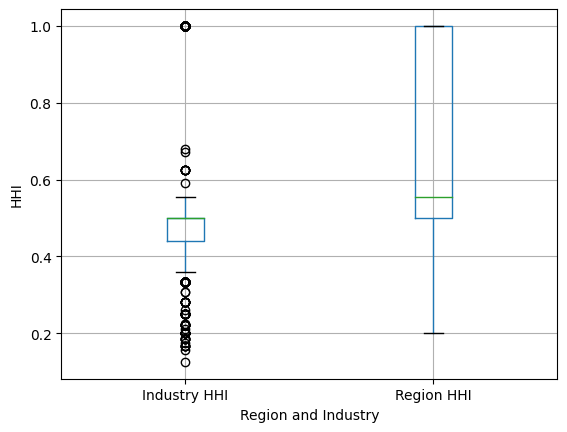

In [36]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
df_angels_active.boxplot(column=['industry_HHI', 'region_HHI'], ax=ax)

# Capitalize the column names for x-axis labels
ax.set_xticklabels(['Industry HHI', 'Region HHI'])

# Set the labels
ax.set_ylabel('HHI')
ax.set_xlabel('Region and Industry')

# Save the plot
plt.savefig('output/graphs/boxplot_regional_industry_HHI.png')

# Show the plot
plt.show()

In [37]:
#calculate average industry_HHI and sd industry HHI
average_industry_HHI = df_angels_active['industry_HHI'].mean()
sd_industry_HHI = df_angels_active['industry_HHI'].std()
average_industry_HHI, sd_industry_HHI

(0.5265946960304796, 0.21409421384703212)

In [38]:
#calculate average region_HHI and sd region HHI
average_region_HHI = df_angels_active['region_HHI'].mean()
sd_region_HHI = df_angels_active['region_HHI'].std()
average_region_HHI, sd_region_HHI

(0.6997466693761574, 0.2570668050443016)

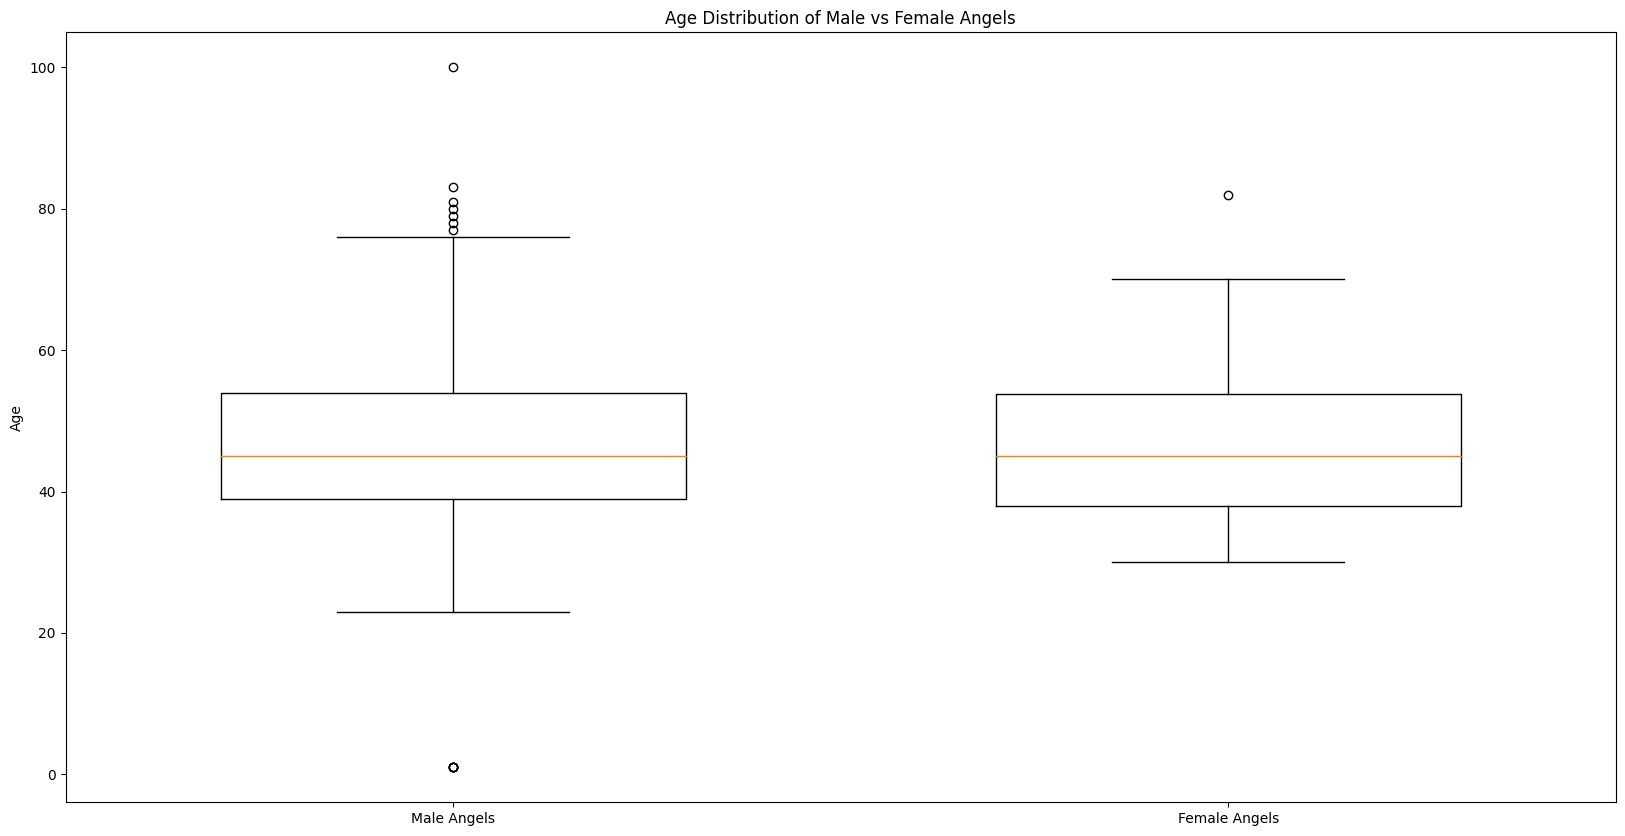

In [39]:
import matplotlib.pyplot as plt

df_angels_male = df_angels_active[df_angels_active["gender"]=='male']

df_angels_female = df_angels_active[df_angels_active['gender']=='female']

# Assuming df_angels_male and df_angels_female are your dataframes and they both have an 'age' column

# Combine the data into a list where each element is a Series/DataFrame of ages
data_to_plot = [df_angels_male['age'], df_angels_female['age']]

plt.figure(figsize=(20,10))

# Create boxplot with the combined data
# The positions parameter is optional, it sets the positions of the boxes in the plot
plt.boxplot(data_to_plot, positions=[1, 2], widths=0.6)

# Set the x-tick labels to correspond to your two categories
plt.xticks([1, 2], ['Male Angels', 'Female Angels'])

plt.title('Age Distribution of Male vs Female Angels')
plt.ylabel('Age')

# Save the figure
plt.savefig('output/boxplot_age_gender_comparison.png')

plt.show()

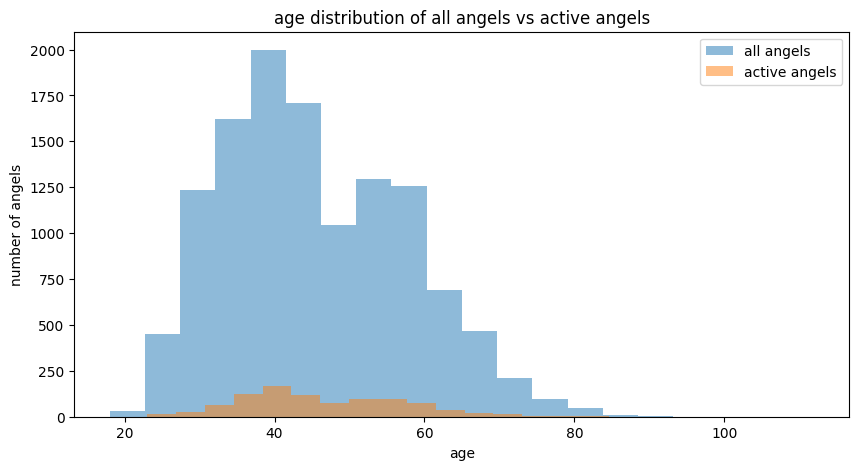

In [40]:
#plot age distribution of all angels
plt.figure(figsize=(10,5))
#drop angels with age 0
df_angels_mf = df_angels[df_angels['age'] !=1]
df_angels_active_mf = df_angels_active[df_angels_active['age'] !=1]

plt.hist(df_angels_mf['age'], bins=20, alpha=0.5, label='all angels')
plt.hist(df_angels_active_mf['age'], bins=20, alpha=0.5, label='active angels')
plt.xlabel('age')
plt.ylabel('number of angels')
plt.legend(loc='upper right')
plt.title('age distribution of all angels vs active angels')
plt.savefig('output/graphs/age_distribution_all_vs_active_angels.png')
plt.show()

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/49955105.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['number_of_investments'] = df_angels_active['number_of_investments'].replace(0, np.nan).dropna().astype(int)


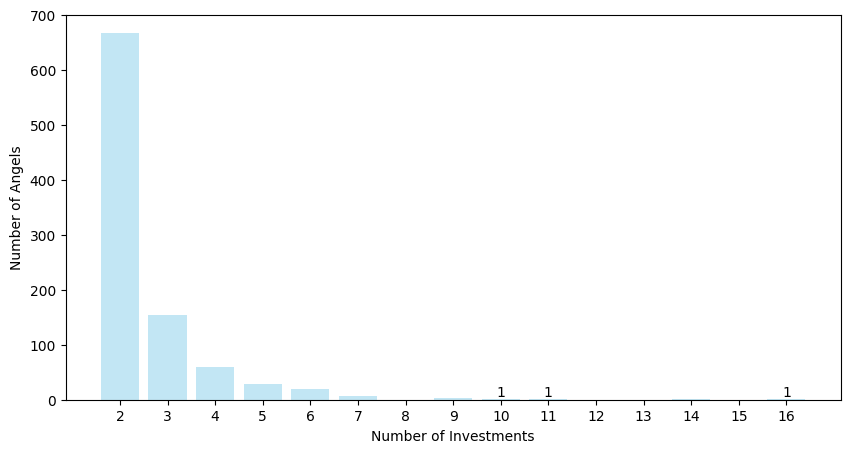

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure 'number_of_investments' contains only whole numbers and drop zeros if necessary
df_angels_active['number_of_investments'] = df_angels_active['number_of_investments'].replace(0, np.nan).dropna().astype(int)

# Determine the bin edges so that each bin represents an integer value
bin_edges = np.arange(df_angels_active['number_of_investments'].min() - 0.5, 
                      df_angels_active['number_of_investments'].max() + 1.5, 1)

plt.figure(figsize=(10,5))
# Plot the histogram with bins aligned with the unique investment counts, set the bar width to 0.8, and color to skyblue
n, bins, patches = plt.hist(df_angels_active['number_of_investments'], bins=bin_edges, alpha=0.5, label='active angels', rwidth=0.8, color='skyblue')

# Set the x-axis labels to be the unique values of 'number_of_investments'
xticks = np.arange(df_angels_active['number_of_investments'].min(), 
                   df_angels_active['number_of_investments'].max() + 1, 1)
plt.xticks(xticks)

plt.xlabel('Number of Investments')
plt.ylabel('Number of Angels')

# Annotate bars with height equal to 1
for count, value in zip(n, xticks):
    if count == 1:
        plt.text(value, count, str(int(count)), ha='center', va='bottom')

plt.savefig('output/graphs/number_of_investments_active_angels.png')
plt.show()

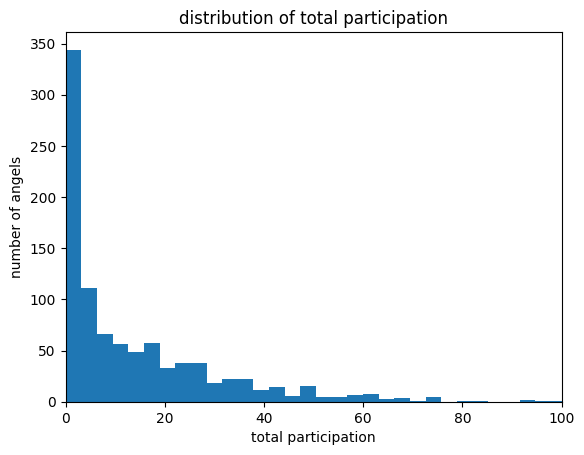

In [42]:
#plot distribution of average shares in their investments including decimals

#put it into bins
plt.hist(df_angels_active['total_participation'], bins=100)
#make x axis from 0 to 100
plt.xlim(0,100)
plt.xlabel('total participation')
plt.ylabel('number of angels')
plt.title('distribution of total participation')
plt.savefig('graphs/distribution_total_participation.png')
plt.show()


In [43]:
#give back the angel with total participation >50
df_angels_active[df_angels_active['total_participation'] > 1]


Unnamed: 0                               shareholder_name_old  \
0           8184                                 Jacobo Invest GmbH   
1          10831                       CG Ventures GmbH Baiersbronn   
2           2503                      Charles Maxim Rolfe Songhurst   
4           5815                              Liberty Ventures GmbH   
5           4722              Reber Capital UG (haftungsbeschränkt)   
...          ...                                                ...   
1222       25500  Happy & Fresh Beratungs- und Beteiligungsgesel...   
1223       25512               Miyamax Beteiligungsgesellschaft mbH   
1224       25522                                        ALLUTI GmbH   
1225       25573                                 MM Investment GmbH   
1226       25576         F. Friede Ventures UG (haftungsbeschränkt)   

      shareholder_id                     created_at  number_of_investments  \
0              768.0  2024-03-10 17:37:19.751917+00                     16   
1             1941.0  2024-03-10 17:37:20.561047+00                     14   
2             2792.0  2024-03-10 17:37:20.561047+00                     14   
4             3959.0  2024-03-10 17:37:21.332579+00                     10   
5             9495.0  2024-03-10 17:37:24.528696+00                      9   
...              ...                            ...                    ...   
1222          1847.0  2024-03-10 17:37:20.561047+00                      2   
1223         20616.0  2024-03-10 17:37:30.929372+00                      2   
1224          9421.0  2024-03-10 17:37:24.528696+00                      2   
1225          6459.0  2024-03-10 17:37:22.963246+00                      2   
1226         11210.0  2024-03-10 17:37:25.834675+00                      2   

     shareholder_type   register_id  register_court  total_participation  \
0               angel    HRB 737155             Ulm            16.224912   
1               angel    HRB 726408       Stuttgart             7.089747   
2               angel           NaN             NaN             1.004879   
4               angel  HRB 158031 B  Charlottenburg            32.057400   
5               angel  HRB 158048 B  Charlottenburg             5.334811   
...               ...           ...             ...                  ...   
1222            angel     HRB 39000         Dresden             8.500000   
1223            angel    HRB 771450       Stuttgart            18.681650   
1224            angel        210537    M\u00fcnchen             2.636859   
1225            angel    HRB 216984  Charlottenburg            17.017700   
1226            angel  HRB 151510 B  Charlottenburg             1.226000   

      register_mapping  ... 2017 2018 2019 2020 2021  status  \
0                109.0  ...  5.0  3.0  5.0  3.0  0.0  active   
1                 95.0  ...  2.0  3.0  5.0  3.0  2.0  active   
2                  NaN  ...  2.0  4.0  4.0  3.0  1.0  active   
4                217.0  ...  0.0  2.0  4.0  4.0  0.0  active   
5                217.0  ...  1.0  2.0  3.0  2.0  1.0  active   
...                ...  ...  ...  ...  ...  ...  ...     ...   
1222             621.0  ...  0.0  0.0  0.0  0.0  2.0  active   
1223              95.0  ...  1.0  0.0  0.0  1.0  0.0  active   
1224             136.0  ...  2.0  0.0  0.0  0.0  0.0  active   
1225             217.0  ...  0.0  0.0  0.0  0.0  2.0  active   
1226             217.0  ...  0.0  0.0  0.0  1.0  1.0  active   

     number_of_investments_2 country industry_HHI region_HHI  
0                         16      DE     0.671875   0.257812  
1                         14      AT     0.155556   0.404444  
2                         14      GB     0.173469   0.469388  
4                         10      AT     0.200000   0.660000  
5                          9      DE     0.185185   0.358025  
...                      ...     ...          ...        ...  
1222                       2      AT     0.500000   1.000000  
1223                       2  

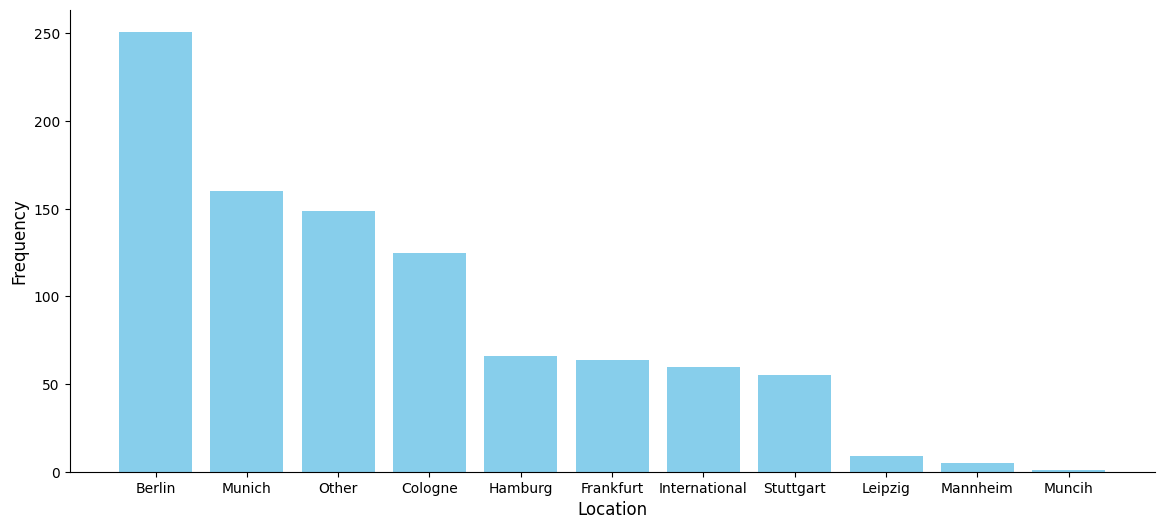

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop NaN values
data = df_angels_active['region_mapping'].dropna()

# Calculate the frequency of each unique value and sort by this frequency
value_counts = data.value_counts().sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(14,6))

# Plot the histogram with the sorted data
plt.bar(value_counts.index, value_counts, color='skyblue', edgecolor='none')

# Set the labels with specified font sizes
plt.xlabel('Location', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Rotate x-axis labels to horizontal and capitalize the first letter of each label
labels = [label.capitalize() for label in value_counts.index]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

# Remove top and right spines for aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Export graph as image called "Number of angels per region.png"
plt.savefig('graphs/Number of angels per region.png', bbox_inches='tight')

# Show the plot
plt.show()

## Descriptive Statistics on Startups

In [45]:
#save df_Startups to csv with name "startups_filtered.csv" and seperator ";"
df_startups.to_csv('dataframes/startups_filtered.csv', sep=";")

In [46]:
#get startups with startup_name Bluu GmbH
df_startups_bluu = df_startups[df_startups['startup_name'] == 'Bluu GmbH']
df_startups_bluu

startup_id                    created_at startup_name  \
1683        5064  2024-01-17 10:12:54.79246+00    Bluu GmbH   

                                       shareholder_json  \
1683  {\n        "shareholders": [\n            {\n ...   

                                               list_mds  number_angels  \
1683  {"name":{"0":5064,"1":5064},"aktenzeichen":{"0...              1   

     startup_industry                                    startup_purpose  \
1683             food  {"gegenstand": "Die Entwicklung von Konzepten ...   

                             link_shareholder_file_2021  \
1683  Bluu GmbH_Berlin Charlottenburg_HRB 218096/Lis...   

                                   link_si_file_current  ... startup_region  \
1683  Bluu GmbH_Berlin Charlottenburg_HRB 218096/Lis...  ...         berlin   

     changed_shareholder_structure region_mapping  number_of_shareholders  \
1683                           yes         berlin                     1.0   

     year_of_incorporation number_shareholders number_external_shareholders  \
1683                  2020                   1                            1   

     number_institutional_shareholders number_active_angels funding_round_type  
1683                                 0                    1              angel  

[1 rows x 33 columns]

In [47]:
#calculate for each startup number_angels per startup as variable number_angels from how often shareholder_type in df_investment_rel_angel_startup is "angel"
#for each row in df_startups, count how often the startup_name occurs in df_investment_rel_angel_startup where shareholder_type is "angel"
print(len(df_investment_rel_angel_startup))
df_startups['number_angels'] = df_startups['startup_name'].map(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'].value_counts())
#get df_investment_rel_angel_startup where shareholder_type is "angel"


#get sum of all number of angels
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels



2441


2441

In [48]:
#remove rows from df_investment_rel_angel_startup that are not in df_startups
print(f"before dropping startups not in investment relations:{len(df_investment_rel_angel_startup)}")
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]
print(f"after dropping startups not in investment relations:{len(df_investment_rel_angel_startup)}")


before dropping startups not in investment relations:2441
after dropping startups not in investment relations:2441


In [49]:
# Calculate descriptive statistics for strtups from df_startups, add to df_startup_descriptive
# we want to calculate the following variables:
# total_number_of_startups
#average number of angel investors
#median number of angel investors
#average number of active angels
#median number of active angels
#get subset of df_startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
i=0
df_startup_descriptive = pd.DataFrame(columns=("variable","value"))

# total_number_of_startups = len(df_startups)
# df_startup_descriptive.loc[i] = ["total_number_of_companies", total_number_of_startups]
i=i+1

# # get subset of startups that are in df_investment_rel_angel_startup where shareholder_type is angel and active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] == 'angel']['startup_name'])]

# # get subset where angel is active
# df_startups = df_startups[df_startups['startup_name'].isin(df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']['startup_name'])]

#Calulate total number of startups and add to df_startup_descriptive with variable name "total_number_of_startups"
total_number_of_startups = len(df_startups)
df_startup_descriptive.loc[i] = ["total_number_of_startups", total_number_of_startups]
i=i+1
#Calulate average number of angel investors and add to df_startup_descriptive with variable name "average_number_of_angel_investors"
average_number_of_angel_investors = df_startups['number_external_shareholders'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_shareholders", average_number_of_angel_investors]
i=i+1
#calculate sd of number of sh
sd_number_of_angel_investors = df_startups['number_external_shareholders'].std()
df_startup_descriptive.loc[i] = ["sd_number_of_shareholders", sd_number_of_angel_investors]
i=i+1

#Calulate median number of angel investors and add to df_startup_descriptive with variable name "median_number_of_angel_investors"
median_number_of_angel_investors = df_startups['number_external_shareholders'].median()
df_startup_descriptive.loc[i] = ["median_number_of_shareholders", median_number_of_angel_investors]
i=i+1
#Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
average_number_of_angels = df_startups['number_active_angels'].mean()
df_startup_descriptive.loc[i] = ["average_number_of_angels", average_number_of_angels]
i=i+1
#calculate sd
sd_number_of_angels = df_startups['number_active_angels'].std()
df_startup_descriptive.loc[i] = ["sd_number_of_angels", sd_number_of_angels]
i=i+1

#Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
median_number_of_angels = df_startups['number_active_angels'].median()
df_startup_descriptive.loc[i] = ["median_number_of_angels", median_number_of_angels]
i=i+1
# #Calulate average number of active angels and add to df_startup_descriptive with variable name "average_number_of_active_angels"
# average_number_of_active_angels = df_startups['number_of_active_angels'].mean()
# df_startup_descriptive.loc[5] = ["average_number_of_active_angels", average_number_of_active_angels]

# #Calulate median number of active angels and add to df_startup_descriptive with variable name "median_number_of_active_angels"
# median_number_of_active_angels = df_startups['number_of_active_angels'].median()
# df_startup_descriptive.loc[6] = ["median_number_of_active_angels", median_number_of_active_angels]
#calculate number of startups with minimum 1 active angel
number_startups_with_active_angels = len(df_startups[df_startups['number_active_angels'] > 1])
df_startup_descriptive.loc[i] = ["number_startups_with_active_angels_syndicate", number_startups_with_active_angels]



df_startup_descriptive



variable        value
1                      total_number_of_startups  1326.000000
2                average_number_of_shareholders     5.883107
3                     sd_number_of_shareholders     5.625741
4                 median_number_of_shareholders     4.000000
5                      average_number_of_angels     1.840875
6                           sd_number_of_angels     1.863133
7                       median_number_of_angels     1.000000
8  number_startups_with_active_angels_syndicate   436.000000

In [50]:
df_startups_active_angels =df_startups

# df_startups = df_startups[df_startups['number_active_angels']>1]

#get subset of df_investment_rel_angel_startup that is in df_startups
# print(len(df_investment_rel_angel_startup)) 
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]
# print(len(df_investment_rel_angel_startup)) 

In [51]:
#add column co-invested to df_angels_active and write 
df_angels_active['co_invested'] =""
#write a 1 if angel is in df_investment_rel_angel_startup else 0
for index,row in df_angels_active.iterrows():
    if row['shareholder_name'] in df_investment_rel_angel_startup['shareholder_name_mapped'].unique():
        df_angels_active.at[index, 'co_invested'] = 1
    else:
        df_angels_active.at[index, 'co_invested'] = 0



/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/4032780973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['co_invested'] =""


In [52]:
#count number of in co-invested
df_angels_active['co_invested'].value_counts()

1    945
Name: co_invested, dtype: int64

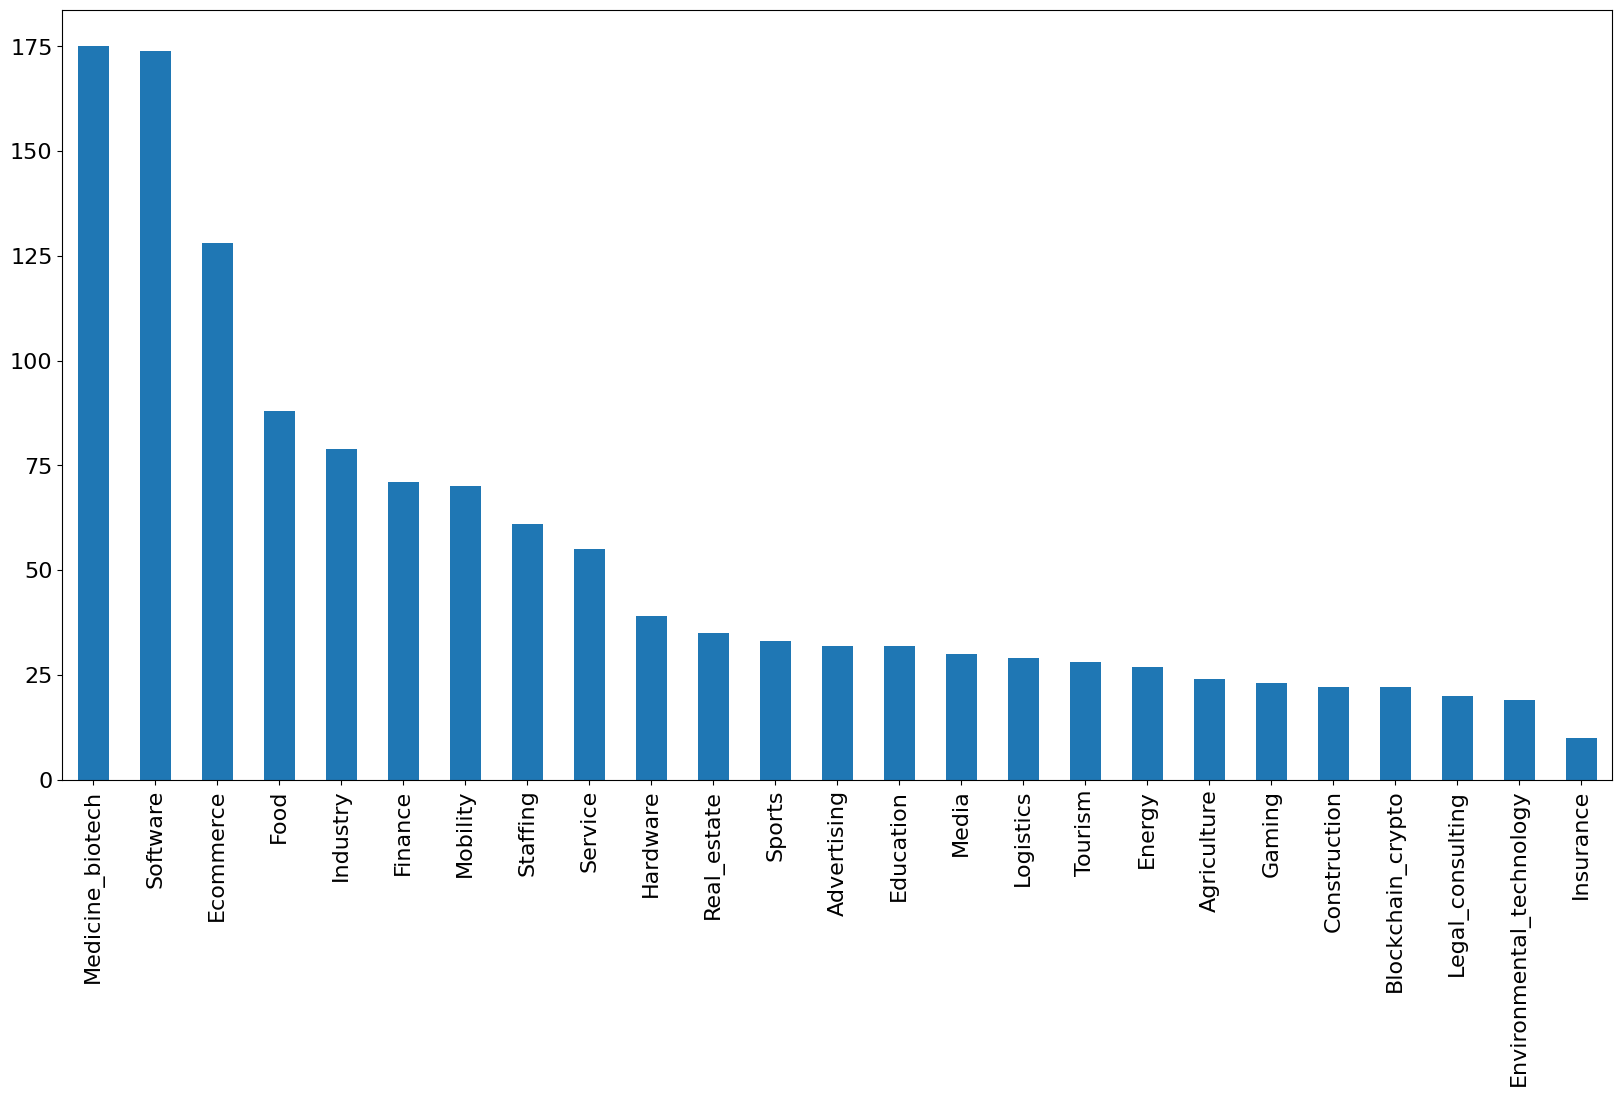

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# Plot the number of startups per industry
df_startups['startup_industry'].value_counts().plot(kind='bar', fontsize=16)  # Set larger font size here

# Capitalize the first letter of each x-tick label
labels = [label.get_text().capitalize() for label in plt.gca().get_xticklabels()]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=90)  # Apply the new labels with rotation

# Adjust y-axis font size
plt.yticks(fontsize=16)

# Export graph as image called "Number of Startups per Industry.png"
plt.savefig('graphs/Number of Startups per Industry.png', bbox_inches='tight')
plt.show()

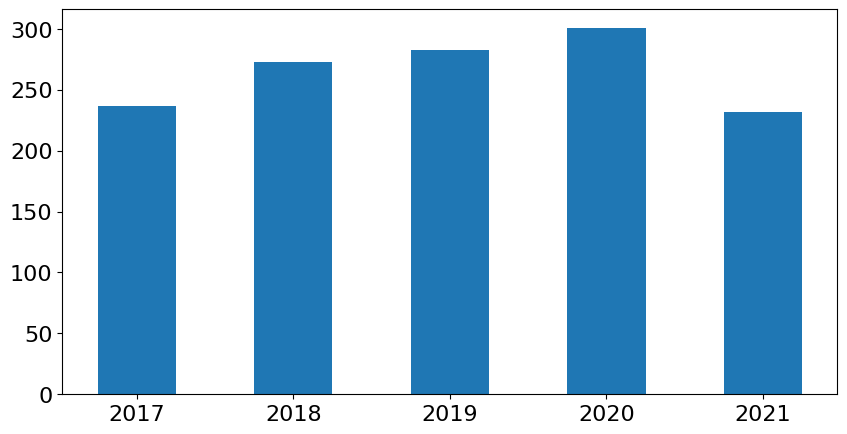

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming df_startups and 'date_incorporated' are already defined
df_startups['year_of_incorporation'] = pd.to_datetime(df_startups['date_incorporated']).dt.year

# Plot startups per year of incorporation
# Calculate the number of bins needed for each year
bins = np.arange(df_startups['year_of_incorporation'].min(), df_startups['year_of_incorporation'].max() + 2) - 0.5  # Shift by 0.5 to center the bars

plt.figure(figsize=(10, 5))
plt.hist(df_startups['year_of_incorporation'], bins=bins, rwidth=0.5)  # rwidth < 1 makes bars thicker

# Set x-ticks to be every year and ensure they are integers, flip the labels, and set font size
tick_locs = np.arange(df_startups['year_of_incorporation'].min(), df_startups['year_of_incorporation'].max() + 1)  # Locations of ticks
tick_lbls = [str(year) for year in tick_locs]  # Labels for ticks as strings

plt.xticks(ticks=tick_locs, labels=tick_lbls, rotation='horizontal', fontsize=16)  # Set ticks positions and labels with vertical rotation and font size 16
plt.yticks(fontsize=16)  # Set font size for y-axis ticks

# Export graph as image called "Number of Startups per Year of Incorporation.png"
plt.savefig('graphs/Number of Startups per Year of Incorporation.png', bbox_inches='tight')
plt.show()

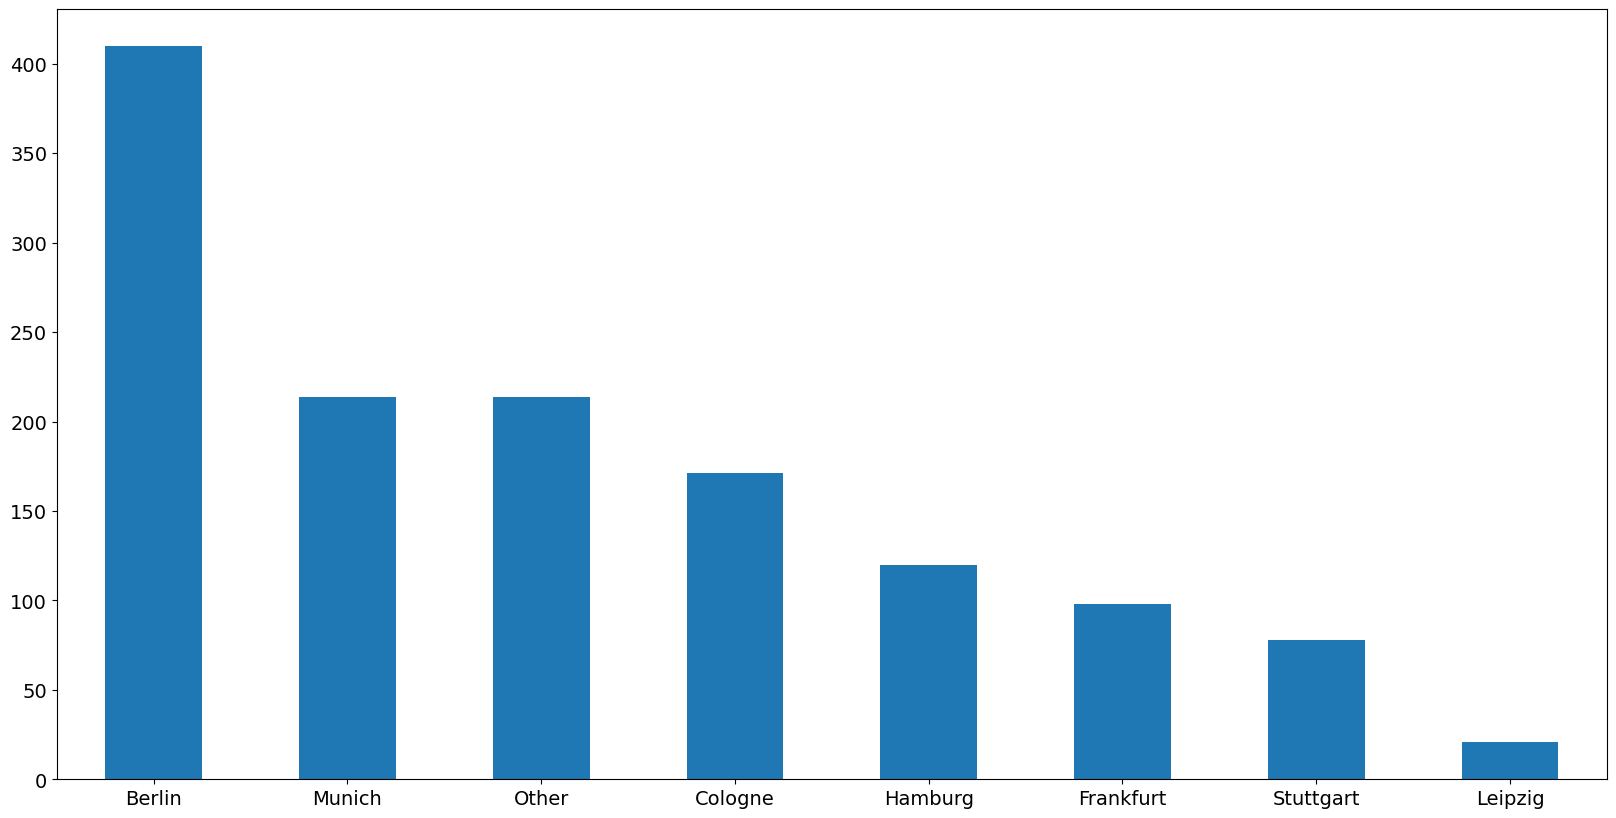

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
# Plot the number of startups per region
df_startups['region_mapping'].value_counts().plot(kind='bar', fontsize=14)

# Get current x-tick labels and capitalize the first letter
labels = [label.get_text().capitalize() for label in plt.gca().get_xticklabels()]

# Set new labels with the first letter capitalized
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)  # rotation set to 0 for horizontal labels

# Export graph as image called "Number of Startups per Region.png"
plt.savefig('graphs/Number of Startups per Region.png', bbox_inches='tight')
plt.show()

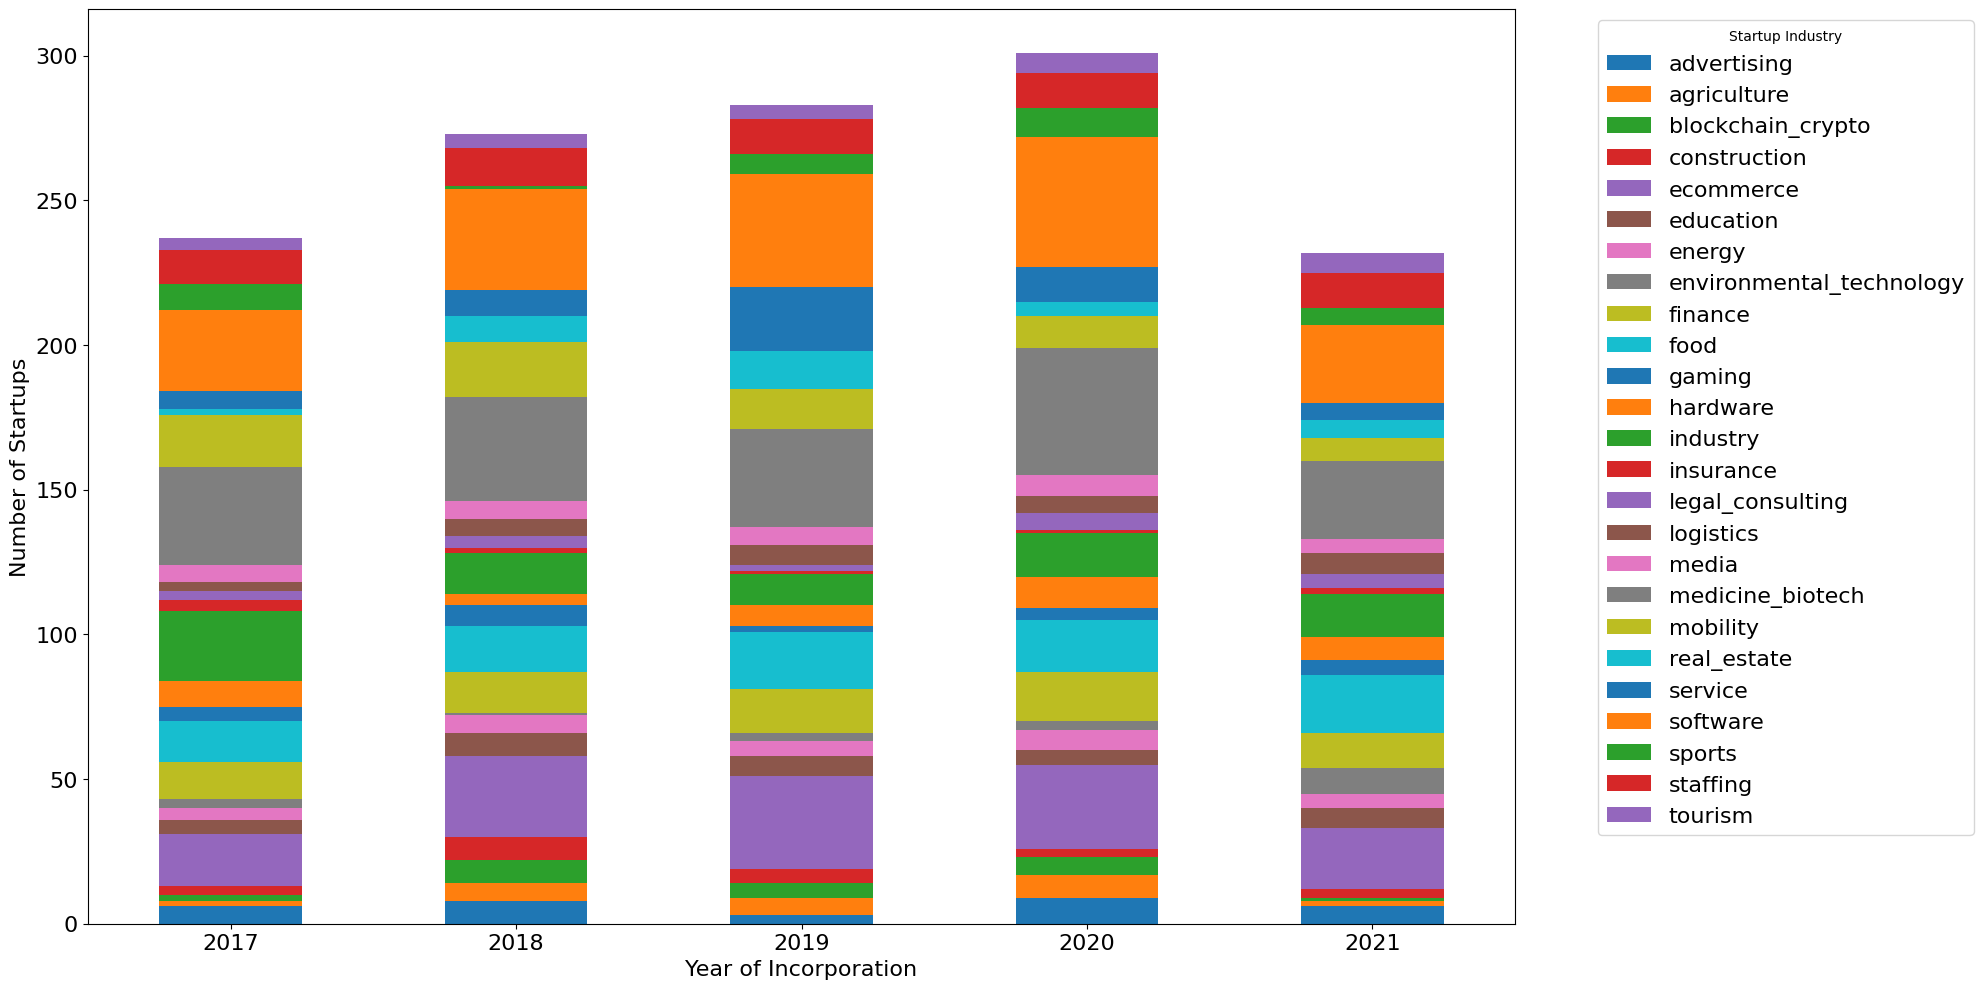

In [56]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
df_startups.groupby(['year_of_incorporation', 'startup_industry']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title with capitalized text and font size 16
ax.set_ylabel('Number of Startups', fontsize=16)
ax.set_xlabel('Year of Incorporation', fontsize=16)


# Ensure the x-axis labels are horizontal (which is the default, so no rotation is needed)
plt.xticks(fontsize=16, rotation ='horizontal')
plt.yticks(fontsize=16)

# Place the legend to the side of the plot with font size 16
ax.legend(title='Startup Industry', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Tweak the figure to prevent the legend from being cut off
fig.tight_layout()

# Save the plot
plt.savefig('output/Number of Startups per Year per Industry.png', bbox_inches='tight')

# Show the plot
plt.show()

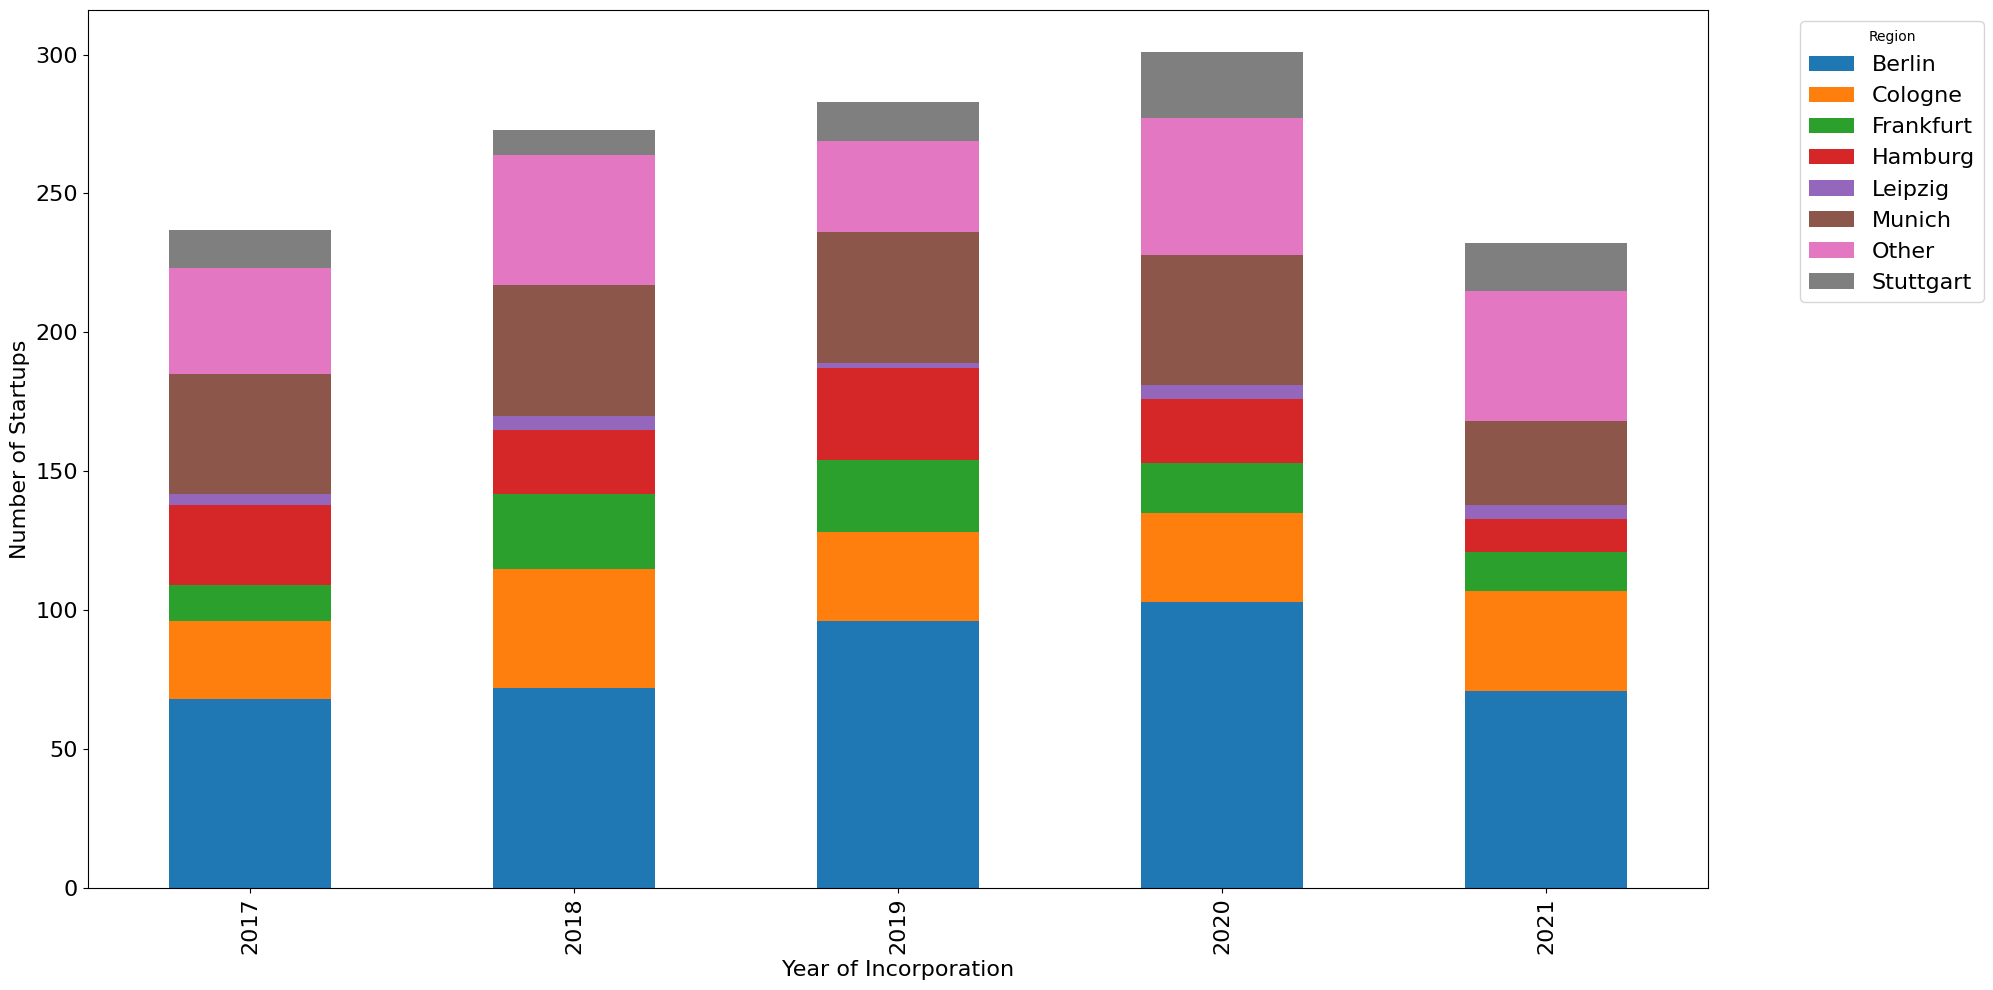

In [57]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,10))

# Plot the data
df_startups.groupby(['year_of_incorporation', 'region_mapping']).size().unstack().plot(kind='bar', stacked=True, ax=ax)

# Set the labels and title with capitalized text and font size 16
ax.set_ylabel('Number of Startups', fontsize=16)
ax.set_xlabel('Year of Incorporation', fontsize=16)


# Ensure the x-axis labels are horizontal and set font size to 16
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Place the legend to the side of the plot with font size 16
legend = ax.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Capitalize the legend labels
for text in legend.get_texts():
    text.set_text(text.get_text().capitalize())

# Tweak the figure to prevent the legend from being cut off
fig.tight_layout()

# Save the plot
plt.savefig('output/Number of Startups per Year per Region.png', bbox_inches='tight')

# Show the plot
plt.show()

In [58]:
#Calculate average number of sahreholders and sd shareholders
average_number_of_shareholders = df_startups['number_external_shareholders'].mean()
sd_number_of_shareholders = df_startups['number_external_shareholders'].std()
average_number_of_shareholders, sd_number_of_shareholders

(5.883107088989442, 5.625741483962123)

In [59]:
#calculate average number of angels and sd angels
average_number_of_angels = df_startups['number_angels'].mean()
sd_number_of_angels = df_startups['number_angels'].std()
average_number_of_angels, sd_number_of_angels


(1.8408748114630467, 1.8631328020033644)

In [60]:
#calculate average number of angels and sd angels
average_number_of_angels = df_startups['number_active_angels'].mean()
sd_number_of_angels = df_startups['number_active_angels'].std()
average_number_of_angels, sd_number_of_angels


(1.8408748114630467, 1.8631328020033644)

## Network metrics



In [61]:
#Cosntruct a network graph of only the active angels
# get a list of co-investments
#replace all spaces with _ in shareholder_name_mapped in df_investment_relations_angel_startup
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#get subset of only active angels
df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active['shareholder_name'])]

# #get subset of df_investment_rel_angel_startup where startup_name is part of df_startups
# df_investment_rel_angel_startup = df_investment_rel_angel_startup[df_investment_rel_angel_startup['startup_name'].isin(df_startups['startup_name'])]


# Create a new DataFrame where each row represents a co-investment
co_investments = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments = co_investments[co_investments['shareholder_name_mapped_x'] != co_investments['shareholder_name_mapped_y']]

# # Create a table with the number of co-investments for each pair of investors
co_investment_counts = co_investments.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts['shareholder_name_mapped_x'] = co_investment_counts['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts['shareholder_name_mapped_y'] = co_investment_counts['shareholder_name_mapped_y'].str.replace(' ', '_')

#co_investment_counts.to_csv('co_investment_counts.csv', index=False)

#sort by number of co-investments
co_investment_counts = co_investment_counts.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts)


                            shareholder_name_mapped_x  \
4047                                ROMM_Holding_GmbH   
4053                                ROMM_Holding_GmbH   
4387                     Roskopf_Ventures_GmbH_Berlin   
5544                                   whiletrue_GmbH   
5546                                   whiletrue_GmbH   
...                                               ...   
1975                                GPS_Ventures_GmbH   
1974                                GPS_Ventures_GmbH   
1973  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
1972  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
5567                  wrapall_UG_(haftungsbeschränkt)   

               shareholder_name_mapped_y  CoInvestments  
4047        Roskopf_Ventures_GmbH_Berlin              6  
4053                      whiletrue_GmbH              6  
4387                   ROMM_Holding_GmbH              6  
5544                   ROMM_Holding_GmbH              6  
5546        Roskopf_Ventu

In [62]:
#sum up CoInvestments
sum_co_investments = co_investment_counts['CoInvestments'].sum()
sum_co_investments

6652

In [63]:
#save df_investment_rel_angel_startup as csv
df_investment_rel_angel_startup.to_csv('dataframes/df_investment_rel_angel_startup.csv', index=False)


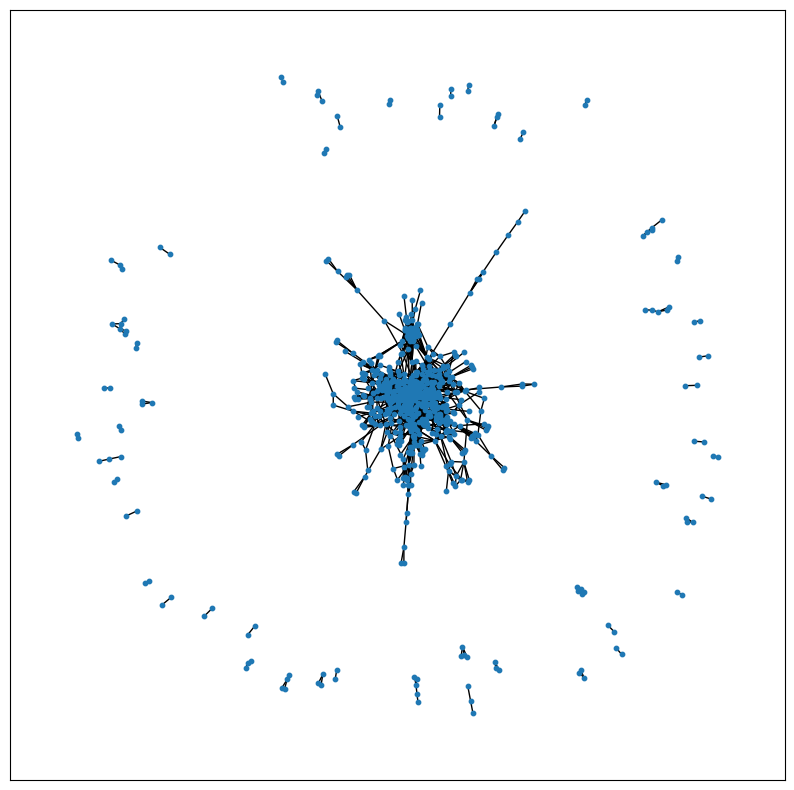

In [64]:
# Create a graph from the co_investment_counts DataFrame

G = nx.from_pandas_edgelist(co_investment_counts, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=10, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])

plt.show()


In [65]:
#get unique shareholder_ids in df_investment_rel_angel_startup
unique_shareholder_ids = df_investment_rel_angel_startup['shareholder_name_mapped'].unique()
len(unique_shareholder_ids)

945

In [66]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(G.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(G.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([G.degree(n) for n in G.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(G)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"

#Calculate eigenvector centrality per angel
eigenvector_centrality = nx.eigenvector_centrality(G)
#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(G).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

# #Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
# average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

# #Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
# median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(G).items()])
# df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

# #Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
# average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

# #Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
# median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(G).items()])
# df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

# #Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
# average_pagerank = np.mean([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

# #Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
# median_pagerank = np.median([v for k,v in nx.pagerank(G).items()])
# df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]


#sum up co-investments where shareholder_name_mapped_x = shareholder_name in df_angels_active
df_angels_active['number_of_co_investments'] = df_angels_active['shareholder_name'].map(co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum())
#calculate mean
average_number_of_co_investments = df_angels_active['number_of_co_investments'].mean()
#add to df
df_network_descriptive.loc[16] = ["average_number_of_co_investors", average_number_of_co_investments]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = df_angels_active['number_of_co_investments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments_with_one_other_shareholder", maximum_number_of_co_investments]


df_network_descriptive

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/4214249088.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)
/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/4214249088.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['number_of_co_investments'] = df_angels_active['shareholder_name'].map(co_investment_counts.groupby('shareholder_name_mapped_x')[

variable        value
0                               total_number_of_nodes   709.000000
1                               total_number_of_edges  2784.000000
2                                      average_degree     7.853315
3                                       median_degree     5.000000
4                      average_clustering_coefficient     0.554776
8                      average_eigenvector_centrality     0.009527
9                       median_eigenvector_centrality     0.000023
16                     average_number_of_co_investors     9.382228
17          median_number_of_co_investments_per_angel     5.000000
18  maximum_number_of_co_investments_with_one_othe...     6.000000

In [67]:
co_investment_counts.groupby('shareholder_name_mapped_x')['CoInvestments'].sum()

shareholder_name_mapped_x
5W_Tech_Ventures_UG_(haftungsbeschränkt)     3
7gen_Holdings_GmbH                           9
8eyes_GmbH                                  13
A06_Ventures_UG_(haftungsbeschränkt)        10
ADVINOS_GmbH                                 4
                                            ..
tbd.investments_GmbH                        15
transloid_GmbH                               3
ueGei_Capital_UG_(haftungsbeschränkt)        2
whiletrue_GmbH                              60
wrapall_UG_(haftungsbeschränkt)             17
Name: CoInvestments, Length: 709, dtype: int64

Average shortest path length: 4.481585788561525
Average clustering coefficient: 0.6011030478317149
Is the original graph a small-world graph? True


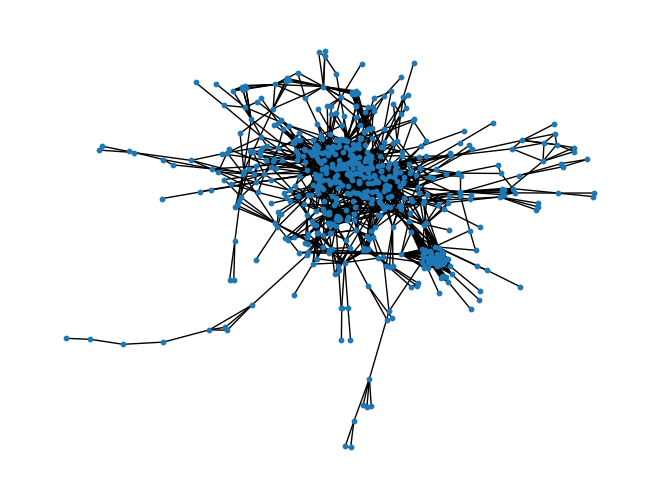

In [68]:
#check network for largest connected component
largest_cc = max(nx.connected_components(G), key=len)
import networkx as nx
#show largest connected component
largest_cc_subgraph = G.subgraph(largest_cc)
#plot largest connected component
nx.draw(largest_cc_subgraph, with_labels=False, node_size=10, edge_color='black')


# # Calculate average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(largest_cc_subgraph)
print(f"Average shortest path length: {avg_shortest_path_length}")

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(largest_cc_subgraph)
print(f"Average clustering coefficient: {avg_clustering_coeff}")

import numpy as np
# Create a random graph with the same number of nodes and similar number of edges, force connectedness
random_graph = nx.connected_watts_strogatz_graph(n=total_number_of_nodes, k=4, p=0.5)

# Calculate metrics for the random graph
random_avg_shortest_path_length = nx.average_shortest_path_length(random_graph)
random_avg_clustering_coeff = nx.average_clustering(random_graph)

# Compare metrics
print(f"Is the original graph a small-world graph? {np.all([(avg_clustering_coeff > random_avg_clustering_coeff), (avg_shortest_path_length <= random_avg_shortest_path_length)])}")

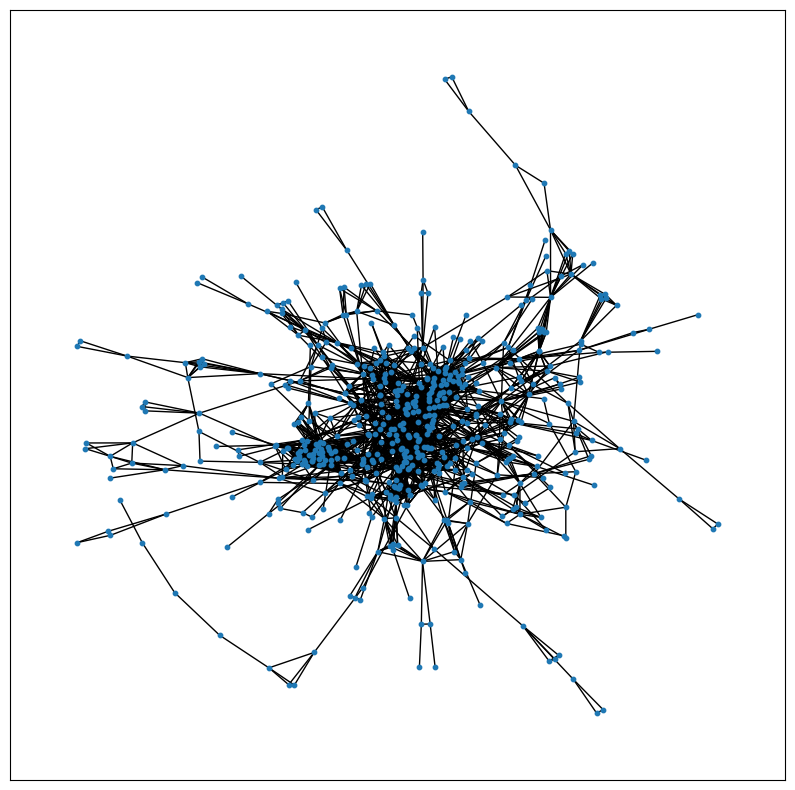

In [69]:
#plot largest subgraph
# Create a subgraph of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc)

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black')
#save as png
plt.savefig('graphs/largest_connected_component.png')
plt.show()


In [70]:
#Create a df_network_descrpiptive with the following variables:
#total_number_of_nodes
#total_number_of_edges
#average_degree
#median_degree
#average_clustering_coefficient
#median_clustering_coefficient
#average_shortest_path_length
#median_shortest_path_length
#average_eigenvector_centrality
#median_eigenvector_centrality
#average_betweenness_centrality
#median_betweenness_centrality
#average_closeness_centrality
#median_closeness_centrality
#average_pagerank
#median_pagerank

df_network_descriptive = pd.DataFrame(columns=("variable","value"))

#Calulate total number of nodes and add to df_network_descriptive with variable name "total_number_of_nodes"
total_number_of_nodes = len(subgraph.nodes)
df_network_descriptive.loc[0] = ["total_number_of_nodes", total_number_of_nodes]

#Calulate total number of edges and add to df_network_descriptive with variable name "total_number_of_edges"
total_number_of_edges = len(subgraph.edges)
df_network_descriptive.loc[1] = ["total_number_of_edges", total_number_of_edges]

#Calulate average degree and add to df_network_descriptive with variable name "average_degree"
average_degree = np.mean([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[2] = ["average_degree", average_degree]

#Calulate median degree and add to df_network_descriptive with variable name "median_degree"
median_degree = np.median([subgraph.degree(n) for n in subgraph.nodes])
df_network_descriptive.loc[3] = ["median_degree", median_degree]

#Calulate average clustering coefficient and add to df_network_descriptive with variable name "average_clustering_coefficient"
average_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[4] = ["average_clustering_coefficient", average_clustering_coefficient]

#Calulate median clustering coefficient and add to df_network_descriptive with variable name "median_clustering_coefficient"
median_clustering_coefficient = nx.average_clustering(subgraph)
df_network_descriptive.loc[5] = ["median_clustering_coefficient", median_clustering_coefficient]


#Calulate average eigenvector centrality and add to df_network_descriptive with variable name "average_eigenvector_centrality"
average_eigenvector_centrality = np.mean([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[8] = ["average_eigenvector_centrality", average_eigenvector_centrality]

#Calulate median eigenvector centrality and add to df_network_descriptive with variable name "median_eigenvector_centrality"
median_eigenvector_centrality = np.median([v for k,v in nx.eigenvector_centrality(subgraph).items()])
df_network_descriptive.loc[9] = ["median_eigenvector_centrality", median_eigenvector_centrality]

#Calulate average betweenness centrality and add to df_network_descriptive with variable name "average_betweenness_centrality"
average_betweenness_centrality = np.mean([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[10] = ["average_betweenness_centrality", average_betweenness_centrality]

#Calulate median betweenness centrality and add to df_network_descriptive with variable name "median_betweenness_centrality"
median_betweenness_centrality = np.median([v for k,v in nx.betweenness_centrality(subgraph).items()])
df_network_descriptive.loc[11] = ["median_betweenness_centrality", median_betweenness_centrality]

#Calulate average closeness centrality and add to df_network_descriptive with variable name "average_closeness_centrality"
average_closeness_centrality = np.mean([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[12] = ["average_closeness_centrality", average_closeness_centrality]

#Calulate median closeness centrality and add to df_network_descriptive with variable name "median_closeness_centrality"
median_closeness_centrality = np.median([v for k,v in nx.closeness_centrality(subgraph).items()])
df_network_descriptive.loc[13] = ["median_closeness_centrality", median_closeness_centrality]

#Calulate average pagerank and add to df_network_descriptive with variable name "average_pagerank"
average_pagerank = np.mean([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[14] = ["average_pagerank", average_pagerank]

#Calulate median pagerank and add to df_network_descriptive with variable name "median_pagerank"
median_pagerank = np.median([v for k,v in nx.pagerank(subgraph).items()])
df_network_descriptive.loc[15] = ["median_pagerank", median_pagerank]

#Calculate average number of co-investments per angel and add to df_network_descriptive with variable name "average_number_of_co_investments_per_angel"
average_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].mean()
df_network_descriptive.loc[16] = ["average_number_of_co_investments_per_angel", average_number_of_co_investments_per_angel]


#Calculate median number of co-investments per angel and add to df_network_descriptive with variable name "median_number_of_co_investments_per_angel"
median_number_of_co_investments_per_angel = co_investment_counts['CoInvestments'].median()
df_network_descriptive.loc[17] = ["median_number_of_co_investments_per_angel", median_number_of_co_investments_per_angel]
#Calculate maximum number of co-investments
maximum_number_of_co_investments = co_investment_counts['CoInvestments'].max()
df_network_descriptive.loc[18] = ["maximum_number_of_co_investments", maximum_number_of_co_investments]


df_network_descriptive

variable        value
0                        total_number_of_nodes   577.000000
1                        total_number_of_edges  2678.000000
2                               average_degree     9.282496
3                                median_degree     7.000000
4               average_clustering_coefficient     0.601103
5                median_clustering_coefficient     0.601103
8               average_eigenvector_centrality     0.011706
9                median_eigenvector_centrality     0.000053
10              average_betweenness_centrality     0.006055
11               median_betweenness_centrality     0.001921
12                average_closeness_centrality     0.232001
13                 median_closeness_centrality     0.235776
14                            average_pagerank     0.001733
15                             median_pagerank     0.001609
16  average_number_of_co_investments_per_angel     1.194684
17   median_number_of_co_investments_per_angel     1.000000
18            maximum_number_of_co_investments     6.000000

/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/3942108049.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))


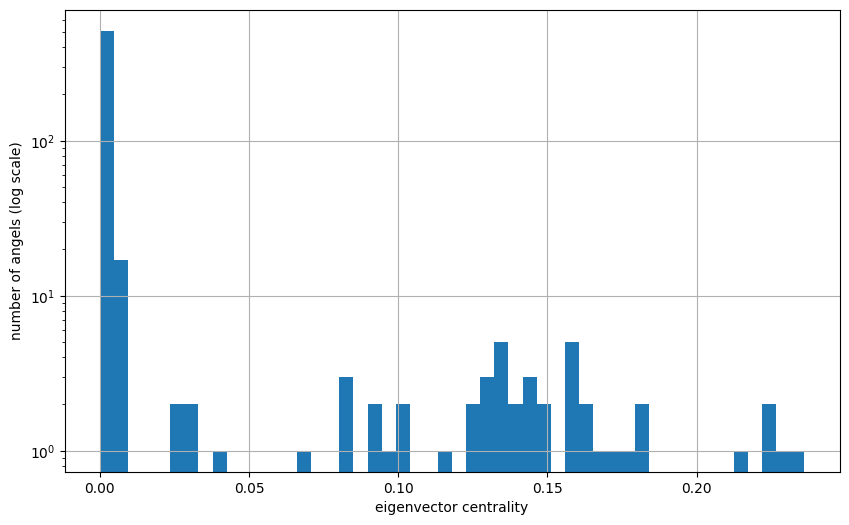

In [71]:
#plot distribution of eigenvector centrality values, start plot with 0.1 and end with 0.2
eigenvector_cebtrality_values= [v for k,v in nx.eigenvector_centrality(subgraph).items()]



#add to df_angels active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(subgraph))
plt.figure(figsize=(10, 6))
plt.hist(eigenvector_cebtrality_values, bins=50, log=True, range=(0, max(eigenvector_cebtrality_values)))

plt.xlabel('eigenvector centrality')
plt.ylabel('number of angels (log scale)')
plt.grid(True)

# plt.xticks(np.arange(0.2, 0.1))
# #Swap x and y axis

# #add title
# plt.title('Distribution of eigenvector centrality values')
# #add x label
# plt.xlabel('eigenvector centrality')
# #add y label
# plt.ylabel('number of angels')
# #add labels on x axis
# plt.xticks(rotation=90)
# #remove top and right spines
# plt.gca().spines['top'].set_visible(False)

# #export graph as image called "Distribution of eigenvector centrality values.png"
plt.savefig('graphs/Distribution of eigenvector centrality values.png')
plt.show()

In [72]:
#return names of the five angels with the highest eigenvector centrality

#calculate degree centrality for each angel
degree_centrality = nx.degree_centrality(G)

#add to df_angels active
df_angels_active['degree_centrality'] = df_angels_active['shareholder_name'].map(degree_centrality)

#sort df_angels_active by eigenvector centrality
df_angels_active = df_angels_active.sort_values(by='degree_centrality', ascending=False)
#find ranking of Sebastian Schuon Investments GmbH
df_angels_active.head(15)



/var/folders/nw/rzxfctl55nj95y0twwbqxrm40000gn/T/ipykernel_1139/3917498870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_angels_active['degree_centrality'] = df_angels_active['shareholder_name'].map(degree_centrality)


Unnamed: 0                          shareholder_name_old  shareholder_id  \
3          3262  Blue Impact Ventures UG (haftungsbeschränkt)          3152.0   
33        13898                               Oliver Diezmann          5164.0   
32        13535                            JAN ARNE TEGTMEIER          4673.0   
62        14067                                DIRK BREITBACH          5402.0   
2          2503                 Charles Maxim Rolfe Songhurst          2792.0   
131       13543                             DR. MARTIN HECKER          4675.0   
132       13548                                STEFAN SCHMÖLZ          4678.0   
61        13905                              Matthias Urlichs          5166.0   
1         10831                  CG Ventures GmbH Baiersbronn          1941.0   
15        12836                          Eyser GmbH Stuttgart         19572.0   
8         25475                             ROMM Holding GmbH          4379.0   
17        25446                 Felix Jahn Beteiligungen GmbH          2889.0   
18         1137                              Dr. Ralph Müller           782.0   
134       13894                              Dr. Joachim Maus          5163.0   
16        25254                                whiletrue GmbH          4405.0   

                        created_at  number_of_investments shareholder_type  \
3    2024-03-10 17:37:21.332579+00                     11            angel   
33   2024-03-10 17:37:22.160384+00                      6            angel   
32   2024-03-10 17:37:22.160384+00                      6            angel   
62   2024-03-10 17:37:22.160384+00                      5            angel   
2    2024-03-10 17:37:20.561047+00                     14            angel   
131  2024-03-10 17:37:22.160384+00                      4            angel   
132  2024-03-10 17:37:22.160384+00                      4            angel   
61   2024-03-10 17:37:22.160384+00                      5            angel   
1    2024-03-10 17:37:20.561047+00                     14            angel   
15   2024-03-10 17:37:30.209471+00                      7            angel   
8    2024-03-10 17:37:21.332579+00                      9            angel   
17   2024-03-10 17:37:20.561047+00                      7            angel   
18   2024-03-10 17:37:19.751917+00                      6            angel   
134  2024-03-10 17:37:22.160384+00                      4            angel   
16   2024-03-10 17:37:21.332579+00                      7            angel   

      register_id  register_court  total_participation  register_mapping  ...  \
3      HRB 159992  Charlottenburg             0.468650             217.0  ...   
33            NaN             NaN             0.675000               NaN  ...   
32            NaN             NaN             0.868333               NaN  ...   
62            NaN             NaN             0.492000               NaN  ...   
2             NaN             NaN             1.004879               NaN  ...   
131           NaN             NaN             0.670000               NaN  ...   
132           NaN             NaN             0.620000               NaN  ...   
61            NaN             NaN             0.628000               NaN  ...   
1      HRB 726408       Stuttgart             7.089747              95.0  ...   
15     HRB 733064       Stuttgart             1.421529              95.0  ...   
8       HRB 27795            Bonn             0.721711             557.0  ...   
17     HRB 287665         München             2.404629             136.0  ...   
18            NaN             NaN             2.009467               NaN  ...   
134           NaN             NaN             0.272500               NaN  ...   
16   HRB 191921 B  Charlottenburg             0.416914             217.0  ...   

    2021  status number_of_investments_2 country industry_HHI  region_HHI  \
3    2.0  active                      11      US     0.125000    0.847222   
33   0.0

In [73]:
#return names of the five angels with the highest eigenvector centrality


#sort df_angels_active by eigenvector centrality
df_angels_active = df_angels_active.sort_values(by='eigenvector_centrality', ascending=False)
#find ranking of Sebastian Schuon Investments GmbH
df_angels_active.head(15)



Unnamed: 0                shareholder_name_old  shareholder_id  \
33        13898                     Oliver Diezmann          5164.0   
32        13535                  JAN ARNE TEGTMEIER          4673.0   
62        14067                      DIRK BREITBACH          5402.0   
131       13543                   DR. MARTIN HECKER          4675.0   
132       13548                      STEFAN SCHMÖLZ          4678.0   
134       13894                    Dr. Joachim Maus          5163.0   
61        13905                    Matthias Urlichs          5166.0   
298       13519              RONALD STEFAN HOPPMANN          4657.0   
18         1137                    Dr. Ralph Müller           782.0   
244        8048  ULRICH CHRISTOPH HEINRICH HELLBERG          3732.0   
91         4577                          Sidus GmbH         14058.0   
41         1802                AMT Investments GmbH         20610.0   
300       13890                    WOLFGANG SCHMIDT          5161.0   
243        7882                          GUIDO LANG          3723.0   
110        7898                  Christian Orsinger          3724.0   

                        created_at  number_of_investments shareholder_type  \
33   2024-03-10 17:37:22.160384+00                      6            angel   
32   2024-03-10 17:37:22.160384+00                      6            angel   
62   2024-03-10 17:37:22.160384+00                      5            angel   
131  2024-03-10 17:37:22.160384+00                      4            angel   
132  2024-03-10 17:37:22.160384+00                      4            angel   
134  2024-03-10 17:37:22.160384+00                      4            angel   
61   2024-03-10 17:37:22.160384+00                      5            angel   
298  2024-03-10 17:37:22.160384+00                      3            angel   
18   2024-03-10 17:37:19.751917+00                      6            angel   
244  2024-03-10 17:37:21.332579+00                      3            angel   
91   2024-03-10 17:37:27.447081+00                      4            angel   
41   2024-03-10 17:37:30.929372+00                      5            angel   
300  2024-03-10 17:37:22.160384+00                      3            angel   
243  2024-03-10 17:37:21.332579+00                      3            angel   
110  2024-03-10 17:37:21.332579+00                      4            angel   

    register_id register_court  total_participation  register_mapping  ...  \
33          NaN            NaN             0.675000               NaN  ...   
32          NaN            NaN             0.868333               NaN  ...   
62          NaN            NaN             0.492000               NaN  ...   
131         NaN            NaN             0.670000               NaN  ...   
132         NaN            NaN             0.620000               NaN  ...   
134         NaN            NaN             0.272500               NaN  ...   
61          NaN            NaN             0.628000               NaN  ...   
298         NaN            NaN             0.670000               NaN  ...   
18          NaN            NaN             2.009467               NaN  ...   
244         NaN            NaN             0.620000               NaN  ...   
91   HRB 147127        Hamburg             0.735000             261.0  ...   
41   HRB 730506       Mannheim             5.430000              33.0  ...   
300         NaN            NaN             0.753333               NaN  ...   
243         NaN            NaN             0.553333               NaN  ...   
110         NaN            NaN             2.940000               NaN  ...   

    2021  status number_of_investments_2 country industry_HHI  region_HHI  \
33   0.0  active                       6      DE     0.166667    0.388889   
32   1.0  active                       6      DE     0.222222    0.333333   
62   0.0  active                       5      DE     0.200000    0.360000   
131  1.0  active                       4      DE     0.250000 

In [74]:
#sum up occurences of each firstname
firstname_counts = df_angels_active['firstname'].value_counts()
firstname_counts.head(25)

Christian    27
Michael      26
Thomas       21
Alexander    16
Andreas      15
Christoph    15
Florian      15
Stefan       14
Philipp      13
Markus       12
Martin       12
Tobias       11
Sebastian    11
Daniel       11
Marco        10
Oliver       10
Peter        10
Sven          9
Frank         9
Stephan       9
Jan           8
Felix         8
Johannes      8
Matthias      8
Jörg          7
Name: firstname, dtype: int64

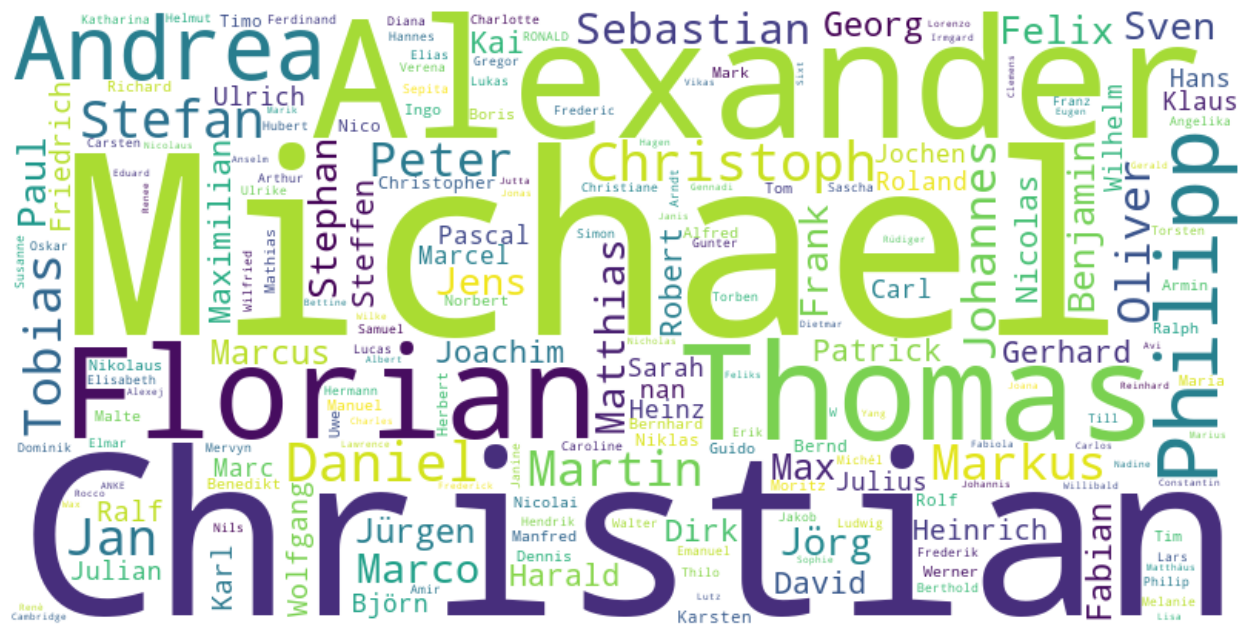

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#convert table colmun inro strinf
# Select the column - replace 'your_column' with your actual column name
column_text = df_angels_active['firstname'].astype(str)

# Concatenate the text of the column into a single string
text = ' '.join(column_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud image
plt.figure(figsize=(16, 8))  # Increase the size of the matplotlib figure
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#save image
plt.savefig('graphs/wordcloud_firstname.png')
plt.show()

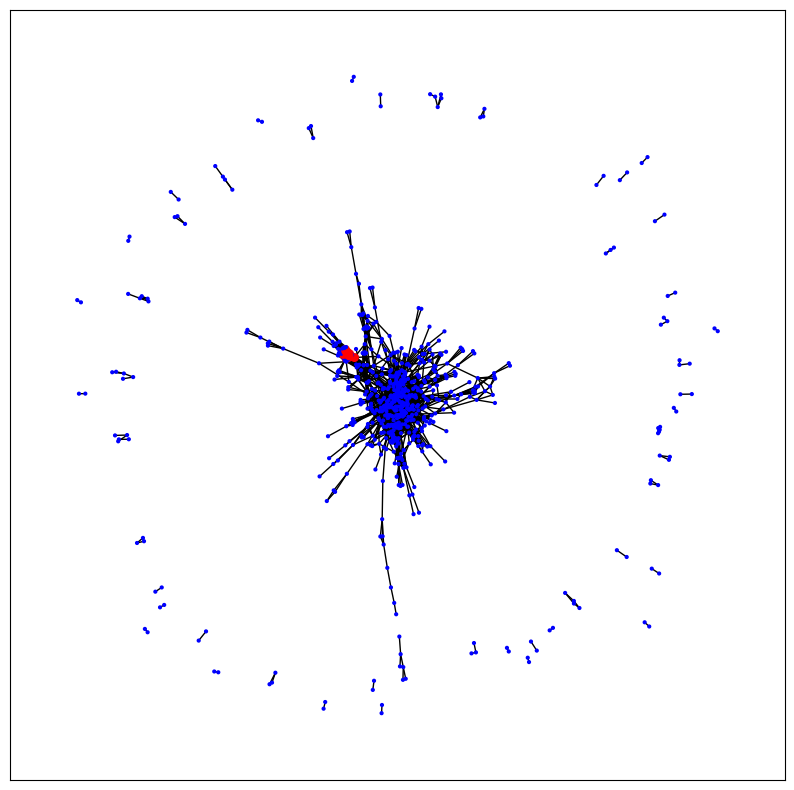

In [76]:
#color the 10 nodes with the highest eigenvector centrality in red, rest blue
highest_eigenvector_centrality = set(df_angels_active.head(20)['shareholder_name'])
node_colors = ['red' if node in highest_eigenvector_centrality else 'blue' for node in G.nodes]
# Draw the graph
node_sizes = [30 if node in highest_eigenvector_centrality else 4 for node in G.nodes]
pos = nx.spring_layout(G)
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos, with_labels=False, node_size=node_sizes,edge_color='black', node_color=node_colors)
#save as png

plt.show()

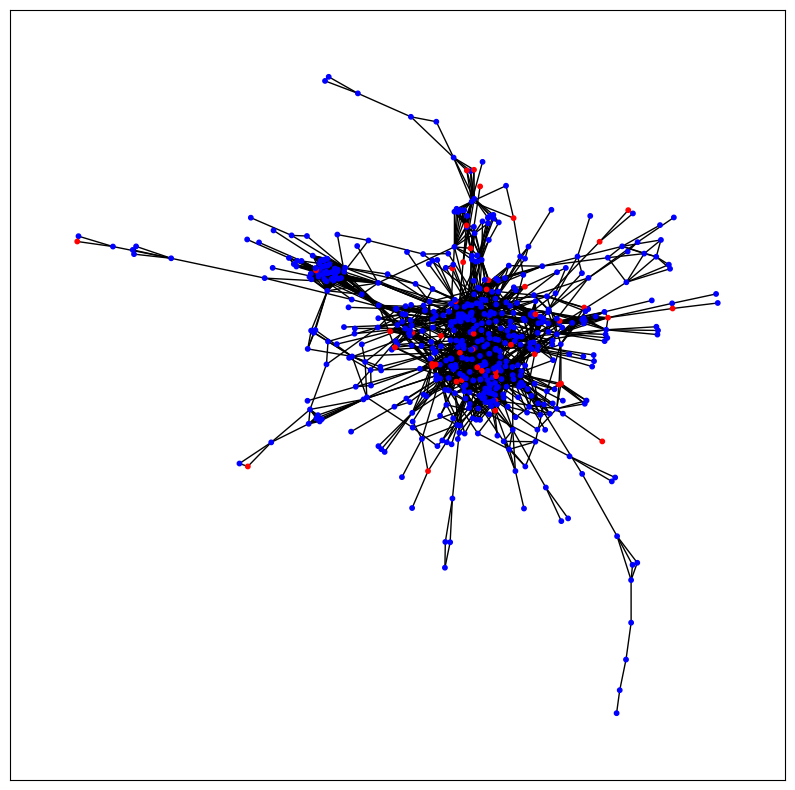

In [77]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


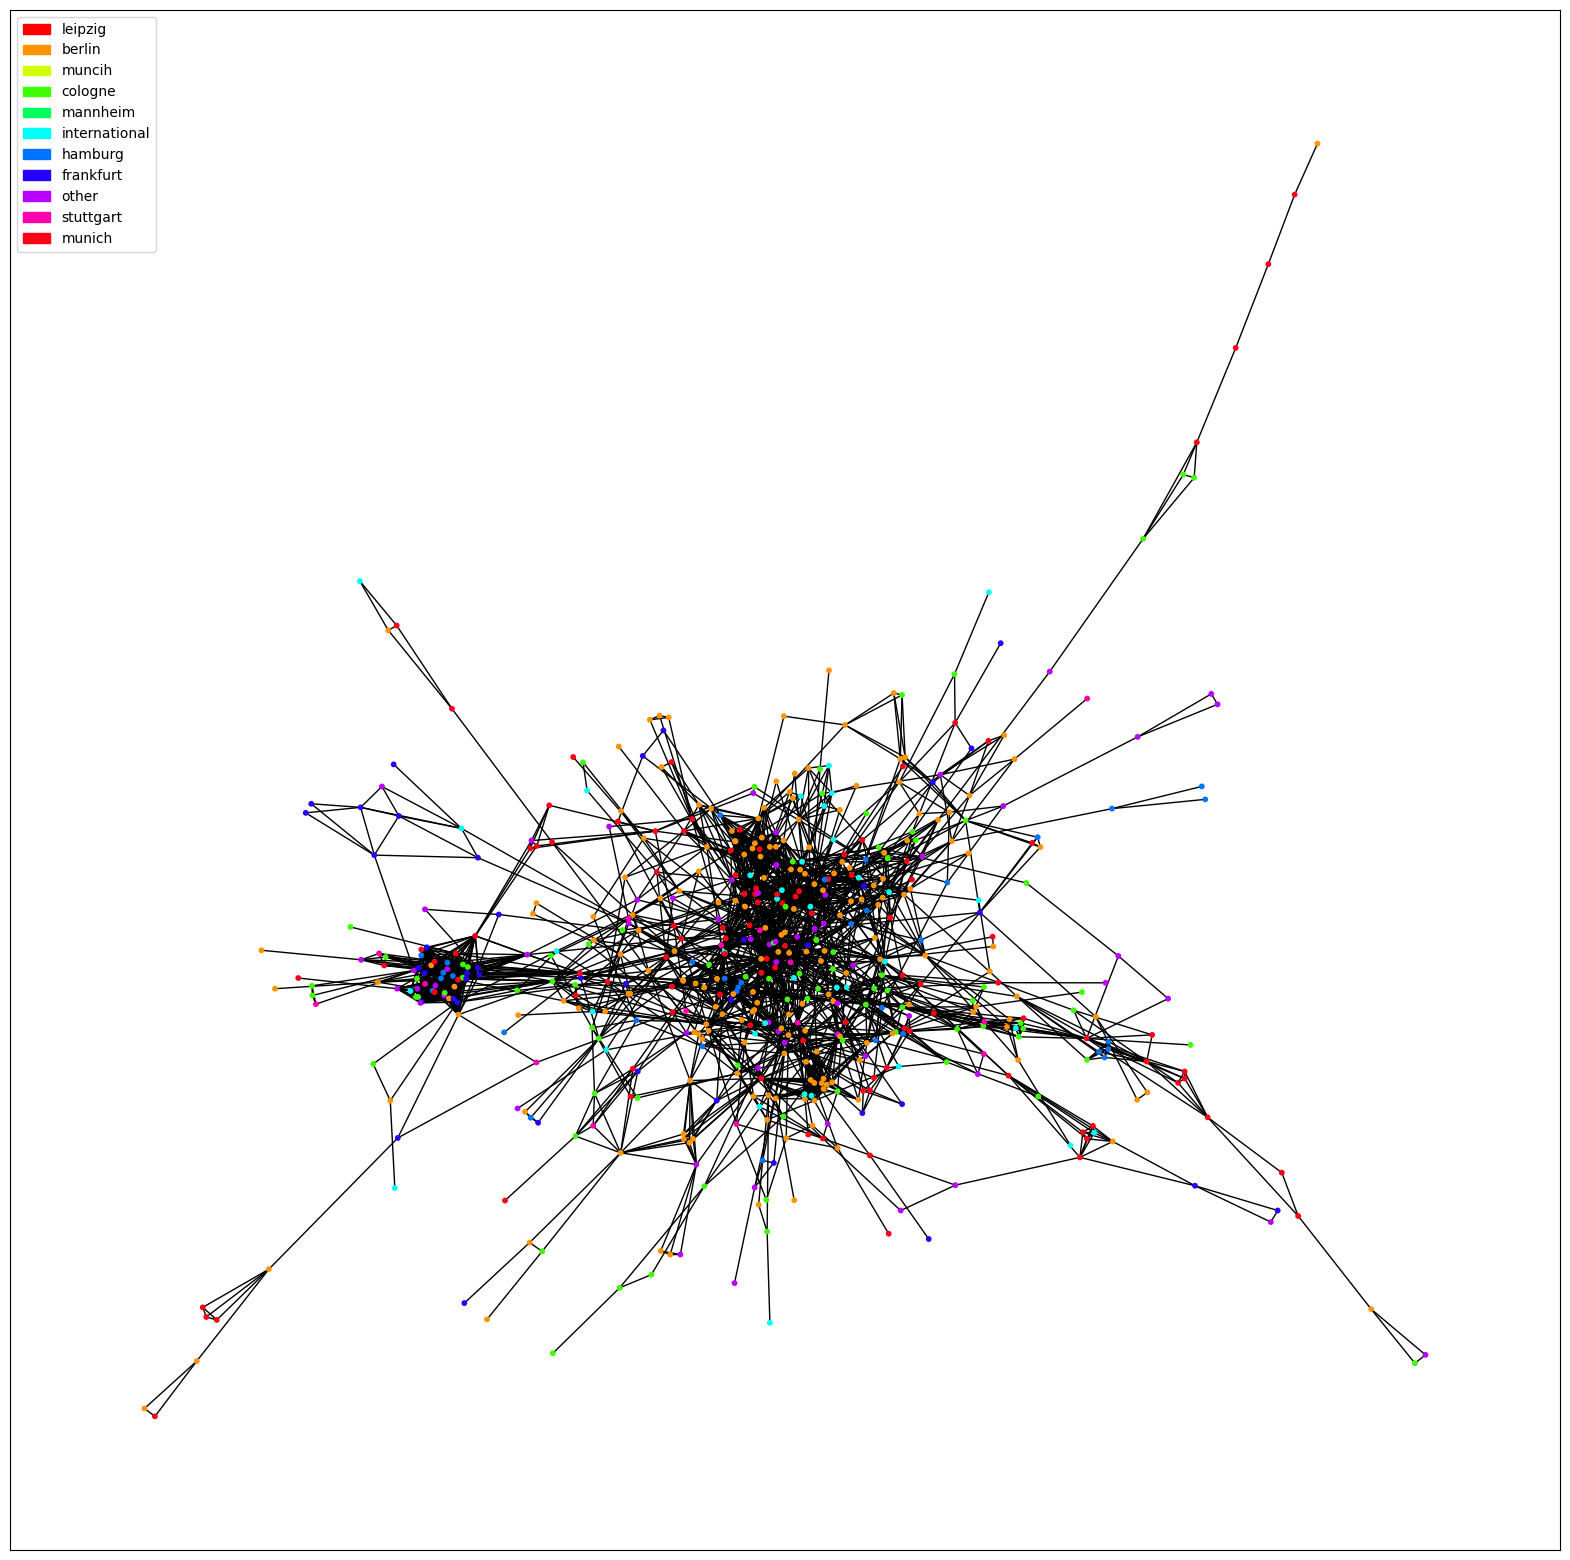

In [78]:
from matplotlib import patches


df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


In [79]:
# get subset of startups where link_si_file_current is ""
df_startups_no_link_si_file = df_startups[df_startups['link_si_file_current'].isnull()]
df_startups_no_link_si_file
#save as CSV
df_startups_no_link_si_file.to_csv('dataframes/startups_no_link_si_file.csv', sep=';')

In [80]:
#sum of number_angels of all startups
sum_number_angels = df_startups['number_angels'].sum()
sum_number_angels

2441

In [81]:
#get shareholders who are nodes in largest connected component
shareholders_in_largest_cc = set(subgraph.nodes)
#filter df_angels_active for shareholders in largest connected component
df_angels_active_largest_cc = df_angels_active[df_angels_active['shareholder_name'].isin(shareholders_in_largest_cc)]

#get subset of startup_name in df_investment_relations_angel_startup where minimum 2 angels in largest subgraph are shareholders
startups_in_largest_cc = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'].isin(df_angels_active_largest_cc['shareholder_name'])]

#get subset of startups in df_startups that are in startups_in_largest_cc
df_startups_largest_cc = df_startups[df_startups['startup_name'].isin(startups_in_largest_cc['startup_name'])]
df_startups_largest_cc

startup_id                     created_at  \
1           6259  2024-01-17 10:12:55.987461+00   
2          13422  2024-01-17 10:13:02.185889+00   
3           2404  2024-01-17 10:12:52.534717+00   
4           2186  2024-01-17 10:12:52.534717+00   
5           4741   2024-01-17 10:12:54.79246+00   
...          ...                            ...   
5699         652  2024-01-17 10:12:50.707796+00   
5723         751  2024-01-17 10:12:50.707796+00   
5759        4344   2024-01-17 10:12:54.79246+00   
5804        5272  2024-01-17 10:12:55.369656+00   
5812       12497  2024-01-17 10:13:01.504395+00   

                                startup_name  \
1                           Avi Medical GmbH   
2                                CAPTIQ GmbH   
3        ostermeier H2ydrogen Solutions GmbH   
4                  Amazing Brands Group GmbH   
5                   WorkMotion Software GmbH   
...                                      ...   
5699  Intelligent Energy Transformation GmbH   
5723              Modulhaus One Germany GmbH   
5759                  comfort lifestyle GmbH   
5804                           Trionigy GmbH   
5812                          Seasonary GmbH   

                                       shareholder_json  \
1     {"shareholders":[{"shareholder_name":"Lata Ven...   
2                                                   NaN   
3     {"shareholders":[{"shareholder_name":"Ostermei...   
4     {"shareholders":[{"shareholder_name":"Amazing ...   
5                                                   NaN   
...                                                 ...   
5699  {"shareholders":[{"shareholder_name":"GPF - Gl...   
5723  {"shareholders":[{"shareholder_name":"Messe Pr...   
5759  {\n    "shareholders": [\n        {\n         ...   
5804                                                NaN   
5812                                                NaN   

                                               list_mds  number_angels  \
1     {"name":{"0":6259},"total_MDs":{"0":1},"gegens...              9   
2     {"name":{"0":13422,"1":13422},"total_MDs":{"0"...              2   
3     {"name":{"0":2404,"1":2404},"total_MDs":{"0":2...             14   
4     {"name":{"0":2186,"1":2186},"total_MDs":{"0":2...              9   
5     {"name":{"0":4741,"1":4741,"2":4741,"3":4741},...              9   
...                                                 ...            ...   
5699  {"name":{"0":652},"total_MDs":{"0":1},"gegenst...              1   
5723  {"name":{"0":751,"1":751,"2":751},"total_MDs":...              1   
5759  {"name":{"0":4344},"aktenzeichen":{"0":"HRB 22...              1   
5804  {"name":{"0":5272},"total_MDs":{"0":1},"gegens...              1   
5812  {"name":{"0":12497},"total_MDs":{"0":1},"gegen...              1   

      startup_industry                                    startup_purpose  \
1     medicine_biotech  {"gegenstand": "Entwicklung und Vertrieb mediz...   
2              finance  {"gegenstand": "die Verwaltung eigenen Verm\u0...   
3               energy  {"gegenstand": "Entwicklung, Produktion, Vertr...   
4            ecommerce  {"gegenstand": "das Halten und Verwalten von B...   
5             staffing  {"gegenstand": "Software-Entwicklung, -Beratun...   
...                ...                                                ...   
5699            energy  {"gegenstand": "a) naturwissenschaftlich-techn...   
5723       real_estate  {"gegenstand": "Die Herstellung und der Vertri...   
5759         ecommerce  {"gegenstand": "Entwicklung, Betrieb und Verma...   
5804          hardware  {"gegenstand": "1. Die Entwicklung, die Herste...   
5812          staffing  {"gegenstand": "Vermarkten und Vermitteln von ...   

                             link_shareholder_file_2021  \
1     Avi Medical GmbH_Mnchen_HRB 254113/Liste der G...   
2     CAPTIQ GmbH_Frankfurt am Main_HRB 113460/Liste...   
3     ostermeier H2ydrogen Solutions GmbH_Ingolstadt...   
4     Amazing Brands Group GmbH_Kln_HRB 105923/Liste...  

In [82]:
df_angels_active['2017'].sum()

530.0

In [83]:
df_angels_active['region_mapping']

33        hamburg
32        hamburg
62        cologne
131       hamburg
132        munich
          ...    
1210    frankfurt
1211       munich
1213       munich
1221      hamburg
1222        other
Name: region_mapping, Length: 945, dtype: object

In [84]:
#list all df_investment_rel_angel_startup where shareholder_type is not ange;
startups_not_angel = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_type'] != 'angel']

In [521]:
df_angels_active["munich"].sum()

421

In [522]:
df_angels_active["software"].sum()

321

In [523]:
df_angels_active["2017"].sum()

530.0

## Simulating a network - 3



In [833]:
# Initialize an empty DataFrame to record the simulated investment relations
df_investment_rel_angel_startup_simulated = pd.DataFrame()

# Initialize a dictionary to keep track of the angels that have invested in each startup
angel_startup_map = {}
df_angels_active['number_of_simulated_investments'] = 0
# Loop through each startup
for _, startup in df_startups_active_angels.iterrows():
    x = 0
    
    # Initialize an empty list for each startup to keep track of its angels
    angel_startup_map[startup['startup_name']] = []
    while x < startup['number_active_angels']:
        #cast to int
        #make string from year_of_incorporation
        startup['year_of_incorporation'] = str(startup['year_of_incorporation'])
        
        df_angels_active[startup['region_mapping']] = pd.to_numeric(df_angels_active[startup['region_mapping']], errors='coerce').fillna(1).astype(int)
        # Filter angels based on the criteria: active status, minimum 1 investment in the startup's startup_industry, and same location as the startup
        
        eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (df_angels_active[startup['startup_industry']].astype(int) >= 2) &
                                    (df_angels_active[startup['region_mapping']].astype(int) >= 1)&
                                    #check if angel has invested in the year
                                    #  (
                                    #     (df_angels_active[startup['startup_industry']].astype(int) >= 2) |  # Checks if angel has invested in at least one startup industry
                                    # (df_angels_active[startup['region_mapping']].astype(int) >= 2)                       # OR angel has invested in at least one startup region
                                    # )&
                                    
                                    (df_angels_active[startup['year_of_incorporation']].astype(int) >= 1) &

                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))
                                    #check if number of investments is less than number of simulated investments for the respective shareholder_name
                                    & (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]
                                                        
        
        # If there are eligible angels
        if not eligible_angels.empty:
            # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
            # Calculate the probability of drawing each angel but have a randomness factor in it
            #increase investment probability for angels in df_angels_active
            
            # investment_probability_factor = 0.2  # Lower this factor to make the network sparser
            # eligible_angels['investment_probability'] = (eligible_angels['number_of_investments'].pow(investment_probability_factor) /
            #     
            #                                         eligible_angels['number_of_investments'].pow(investment_probability_factor).sum())
            print("first round match")
            # # Sample an angel based on the probability
            # sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')

            eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
            # Introduce a random factor
            eligible_angels['random_factor'] = np.random.rand(len(eligible_angels))

            # Combine the random factor with the weighted investment probabilities
            eligible_angels['combined_probability'] = (eligible_angels['random_factor'] + eligible_angels['investment_probability']) / 2

            # Normalize the combined probability
            eligible_angels['combined_probability'] /= eligible_angels['combined_probability'].sum()

            # Sample an angel based on the combined probability
            sampled_angel = eligible_angels.sample(n=1, weights='combined_probability')
            # #increase probability to be selected of angels who have a simulated investment already
            # eligible_angels.loc[eligible_angels['number_of_simulated_investments'] > 0, 'investment_probability'] +0.05
            #give higher probability to those where number of simulated investments in small
            # eligible_angels['investment_probability'] = 1/(eligible_angels['number_of_simulated_investments']+1)

            # Sample an angel based on the probability
            # sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
            # sampled_angel = eligible_angels.sample(n=1) 
            
            # Create a record of the investment relationship
            investment_record = pd.DataFrame({
                'startup_name': [startup['startup_name']],
                'angel': [sampled_angel.iloc[0]['shareholder_name']],  # Assuming df_angels_active has a 'shareholder_name' column
                'startup_industry': [startup['startup_industry']],  # Assuming df_startups has an 'startup_industry' column
                'region': [sampled_angel.iloc[0]['region_mapping']],  # Assuming df_angels_active has a 'location' column
                'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],  # Assuming df_angels_active has a 'total_participation' column
                'birthdate': [sampled_angel.iloc[0]['birthdate']]  # Assuming df_angels_active has a 'birthdate' column
            })
            
            # Append the record to the df_investment_rel_angel_startup DataFrame
            df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
            #increase number of simulated investments where angel matches shareholder_name in df_angels_active
            df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
            

            
            # Add the angel to the list of drawn angels for the startup
            angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
            x += 1
        else:
            # If no eligible angel is left, relax the location criterion and take an angel that fulfills all criteria except location
            eligible_angels = df_angels_active[
                    (df_angels_active['status'] == "active") & 
                    # (df_angels_active[startup['region_mapping']].astype(int) >= 1) &  # Checks if angel has invested in at least one startup industry
                    # (
                    #     (df_angels_active[startup['startup_industry']].astype(int) >= 1) |  # Checks if angel has invested in at least one startup industry
                    (df_angels_active[startup['region_mapping']].astype(int) >= 1)  &                       # OR angel has invested in at least one startup region
                    # ) &
                    (df_angels_active[startup['year_of_incorporation']] >= 1) &
                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']])) &
                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])
                ]
            if not eligible_angels.empty:
                # Sample a random angel from the eligible angels with higher probability for those with higher number of investments
                # Calculate the probability of drawing each angel
                eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                
                # investment_probability_factor = 0.2  # Lower this factor to make the network sparser
                # eligible_angels['investment_probability'] = (eligible_angels['number_of_investments'].pow(investment_probability_factor) /eligible_angels['number_of_investments'].pow(investment_probability_factor).sum())
              
                eligible_angels.loc[eligible_angels['number_of_simulated_investments'] > 0, 'investment_probability'] +0.05
                # Sample an angel based on the probability
                sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                # sampled_angel = eligible_angels.sample(n=1)
        
                # Create a record of the investment relationship
                investment_record = pd.DataFrame({
                    'startup_name': [startup['startup_name']],
                    'angel': [sampled_angel.iloc[0]['shareholder_name']],
                    'startup_industry': [startup['startup_industry']],
                    'region': [sampled_angel.iloc[0]['region_mapping']],
                    'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                    'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                    'birthdate': [sampled_angel.iloc[0]['birthdate']]
                })
            
                # Append the record to the df_investment_rel_angel_startup DataFrame
                df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                # Add the angel to the list of drawn angels for the startup
                angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                x += 1
            else:
                # If no eligible angel is still left, take any active and eligible angel regardless of startup_industry
                eligible_angels = df_angels_active[(df_angels_active['status'] == "active") & 
                                    (~df_angels_active['shareholder_name'].isin(angel_startup_map[startup['startup_name']]))&
                                     #get all angels where number of simulated investments is less than number of investments
                                    (df_angels_active['number_of_simulated_investments'] < df_angels_active['number_of_investments'])]                                    
                                     
                if not eligible_angels.empty:
                    # Sample a random angel from the eligible angels
                    eligible_angels['investment_probability'] = eligible_angels['number_of_investments'] / eligible_angels['number_of_investments'].sum()
                    investment_probability_factor = 0.2  # Lower this factor to make the network sparser
                    eligible_angels['investment_probability'] = (eligible_angels['number_of_investments'].pow(investment_probability_factor) /eligible_angels['number_of_investments'].pow(investment_probability_factor).sum())
              
                    sampled_angel = eligible_angels.sample(n=1, weights='investment_probability')
                    # Create a record of the investment relationship
                    investment_record = pd.DataFrame({
                        'startup_name': [startup['startup_name']],
                        'angel': [sampled_angel.iloc[0]['shareholder_name']],
                        'startup_industry': [startup['startup_industry']],
                        'region': [sampled_angel.iloc[0]['region_mapping']],
                        'startup_location': [startup['startup_location']],  # Assuming df_startups has a 'location' column
                        'total_participation_in_percent': [sampled_angel.iloc[0]['total_participation']],
                        'birthdate': [sampled_angel.iloc[0]['birthdate']]
                    })
            
                    # Append the record to the df_investment_rel_angel_startup DataFrame
                    df_investment_rel_angel_startup_simulated = df_investment_rel_angel_startup_simulated.append(investment_record, ignore_index=True)
                    df_angels_active.loc[df_angels_active['shareholder_name'] == sampled_angel.iloc[0]['shareholder_name'], 'number_of_simulated_investments'] += 1
                    # Add the angel to the list of drawn angels for the startup
                    angel_startup_map[startup['startup_name']].append(sampled_angel.iloc[0]['shareholder_name'])
            
                    x += 1
                else:
                    print("No eligible angel left")

first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first round match
first roun

In [834]:
# #load simulated network from csv
# df_investment_rel_angel_startup_simulated = pd.read_csv('dataframes/df_investment_rel_angel_startup_simulated.csv')

In [835]:
#calculate total sum of angel investors
total_number_of_angel_investors_simulated = len(df_investment_rel_angel_startup_simulated)
total_number_of_angel_investors= len(df_investment_rel_angel_startup)
#print data verification
print(f"Total number of angel investors in original data: {total_number_of_angel_investors}")
print(f"Total number of angel investors in simulated data: {total_number_of_angel_investors_simulated}")
if total_number_of_angel_investors_simulated == total_number_of_angel_investors:
    print("Network successfully simulated")

Total number of angel investors in original data: 2441
Total number of angel investors in simulated data: 2441
Network successfully simulated


In [836]:
#create a network graph from the simulated data
# Create a new DataFrame where each row represents a co-investment
co_investments_simulated = df_investment_rel_angel_startup_simulated.merge(df_investment_rel_angel_startup_simulated, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_simulated = co_investments_simulated[co_investments_simulated['angel_x'] != co_investments_simulated['angel_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_simulated = co_investments_simulated.groupby(['angel_x', 'angel_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in name_x
co_investment_counts_simulated['angel_x'] = co_investment_counts_simulated['angel_x'].str.replace(' ', '_')
co_investment_counts_simulated['angel_y'] = co_investment_counts_simulated['angel_y'].str.replace(' ', '_')

co_investment_counts_simulated.to_csv('co_investment_counts_simulated.csv', index=False)

#sort by number of co-investments
co_investment_counts_simulated = co_investment_counts_simulated.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_simulated)




                                              angel_x  \
4202                                ROMM_Holding_GmbH   
2758                               Jacobo_Invest_GmbH   
5939                                   whiletrue_GmbH   
2775                               Jacobo_Invest_GmbH   
2166               Goldfinger_Investment_Holding_GmbH   
...                                               ...   
2051  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2049  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2048  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
2047  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
5971                                    zero.one_GmbH   

                                    angel_y  CoInvestments  
4202                     Jacobo_Invest_GmbH              6  
2758                      ROMM_Holding_GmbH              6  
5939                     Jacobo_Invest_GmbH              5  
2775                         whiletrue_GmbH              5  
2166      

In [837]:
# # #save as csv
# df_investment_rel_angel_startup_simulated.to_csv('dataframes/df_investment_rel_angel_startup_simulated.csv', index=False)

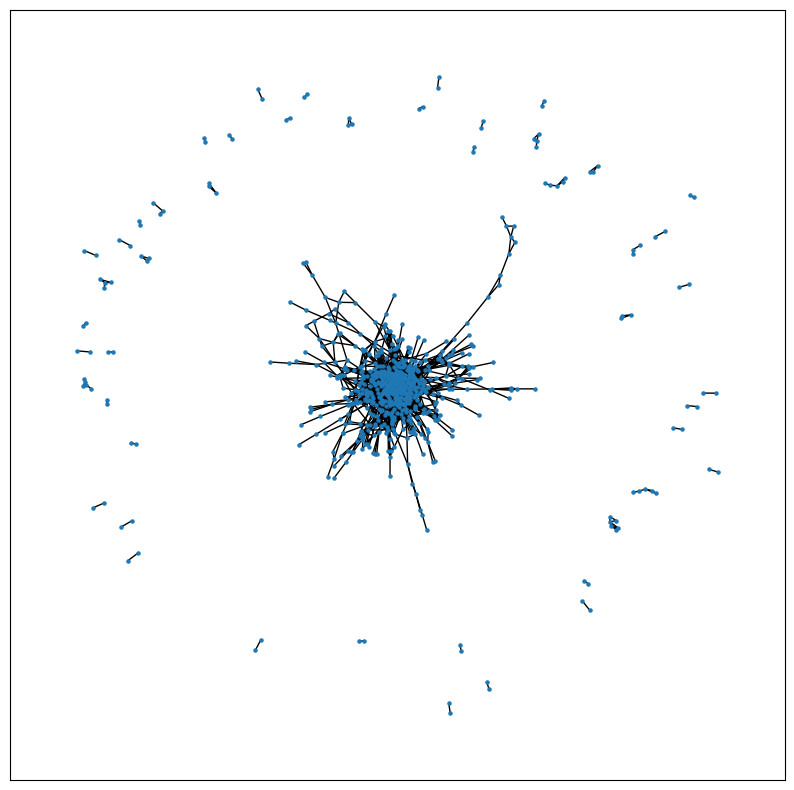

In [838]:
#plot network graph of simulated data
# Create a graph from the co_investment_counts DataFrame

G_simulated = nx.from_pandas_edgelist(co_investment_counts_simulated, 'angel_x', 'angel_y', ['CoInvestments'])

# Draw the graph
pos = nx.spring_layout(G_simulated)
#make the graph bigger
plt.figure(figsize=(10,10))
nx.draw_networkx(G_simulated, pos, with_labels=False, node_size=5, edge_color='black')
#add a heatmap
#nx.draw_networkx_edge_labels(G, pos, edge_labels=co_investment_counts['Distance'])
#save graph as png
plt.savefig('graphs/Simulated Network Graph.png')
plt.show()



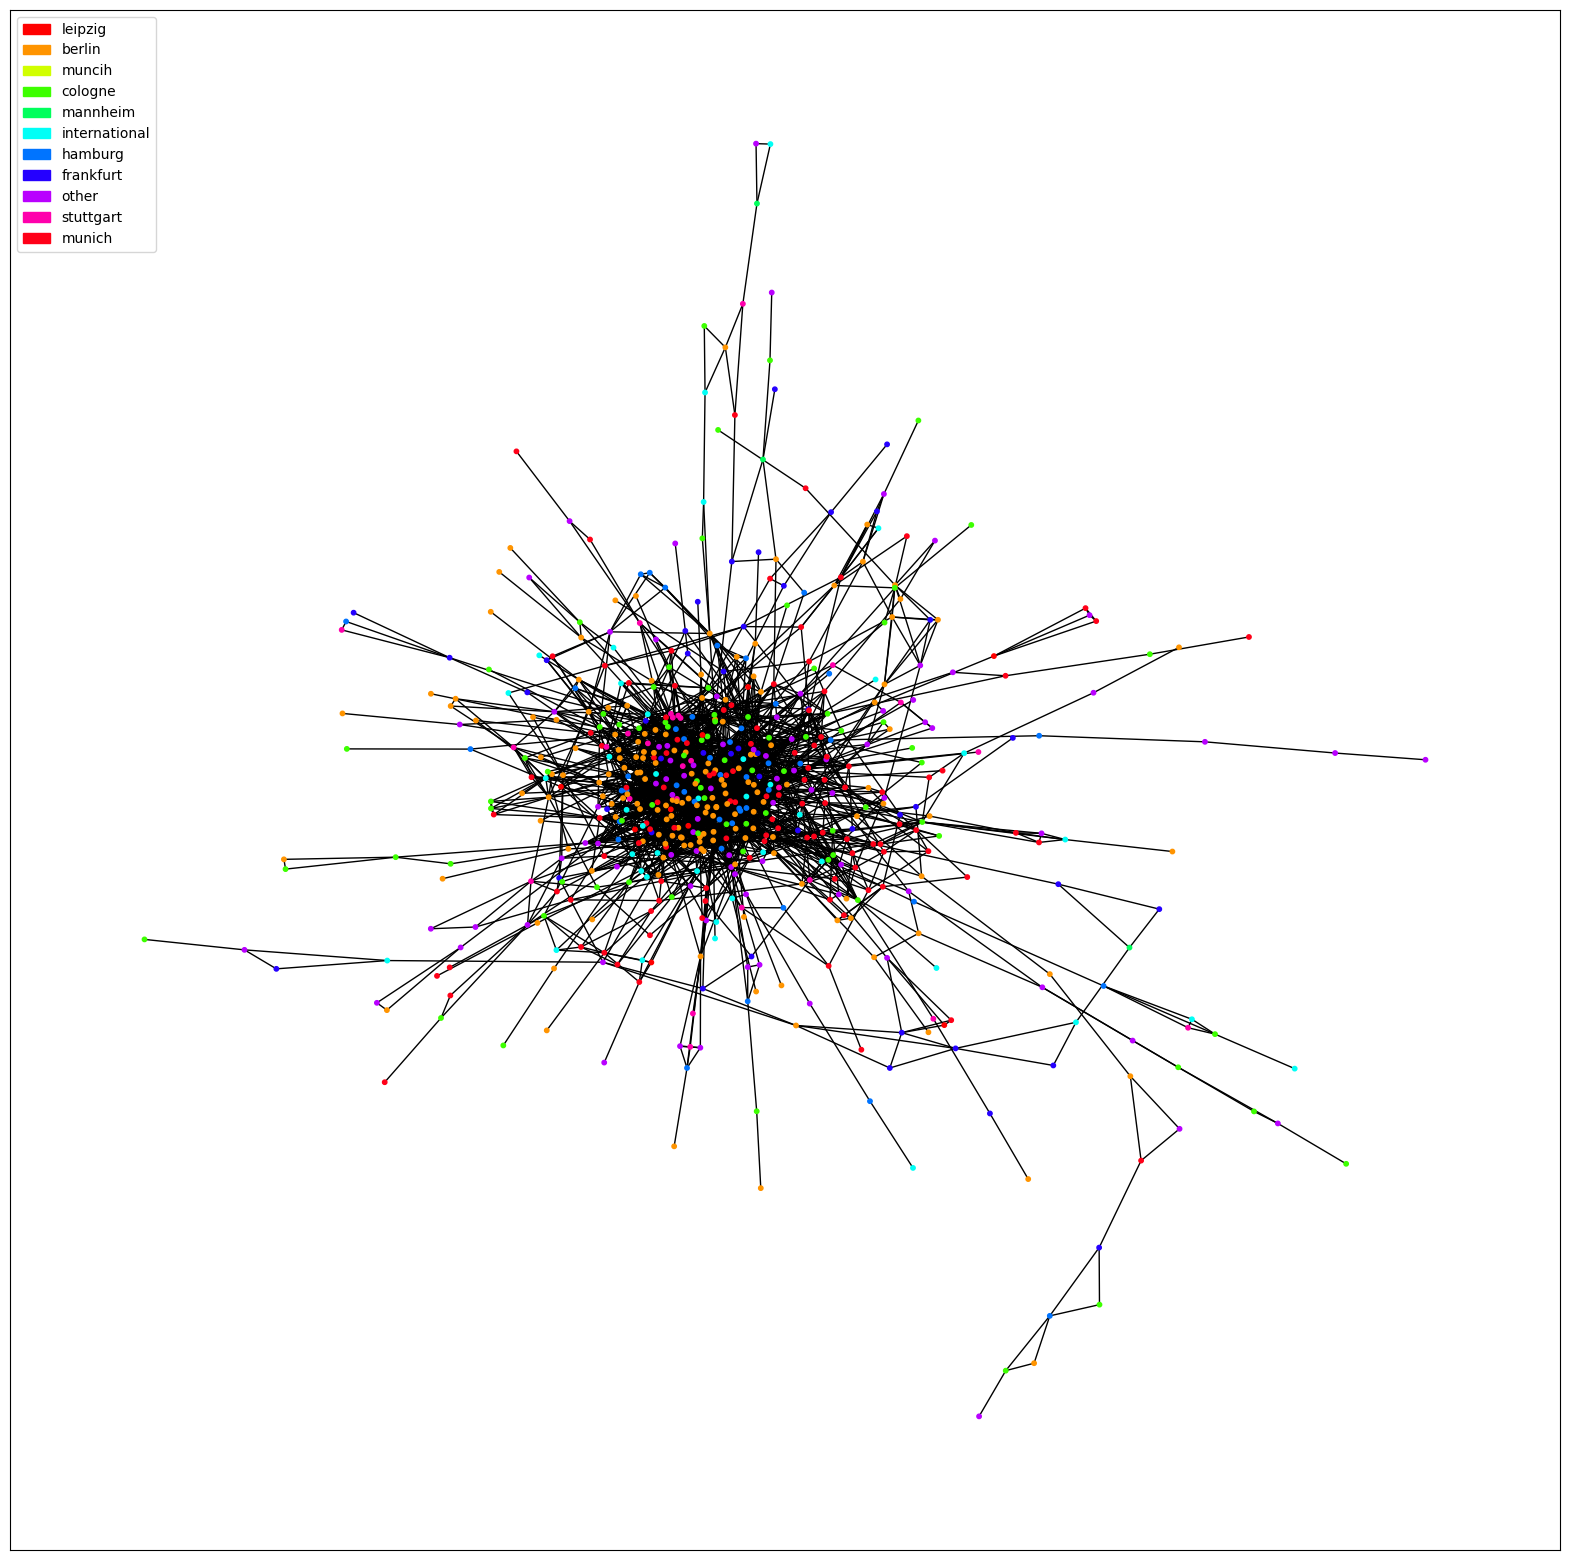

In [839]:
from matplotlib import patches

#get largest subgraph_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)

df_angels_active_temp = df_angels_active
df_angels_active_temp['shareholder_name'] = df_angels_active['shareholder_name'].str.replace(" ", "_")
# Create a dictionary of region mappings
region_mapping = df_angels_active.set_index('shareholder_name')['region_mapping'].to_dict()

# Generate unique colors for each region
unique_regions = set(region_mapping.values())
colors = plt.cm.tab10.colors  # Using a tab10 colormap for up to 10 unique regions
if len(unique_regions) > len(colors):
    colors = plt.cm.hsv(np.linspace(0, 1, len(unique_regions)))  # Use hsv for more than 10

region_colors = dict(zip(unique_regions, colors))

# Create a list of node colors based on their region
node_colors = [region_colors.get(region_mapping.get(node), 'grey') for node in subgraph_simulated.nodes()]
#add information of which color is whoch region to the graph
# Create a legend for the regions


# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(20, 20))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=10, edge_color='black', node_color=node_colors, cmap=plt.cm.hsv)
# Create a legend
# Create a legend
patch_list = [patches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=patch_list, loc='upper left')


# Save as PNG
plt.savefig('graphs/Network_graph_with_region_mapping_simulated.png')

# Display the plot
plt.show()

#add information of which color is whoch region to the graph


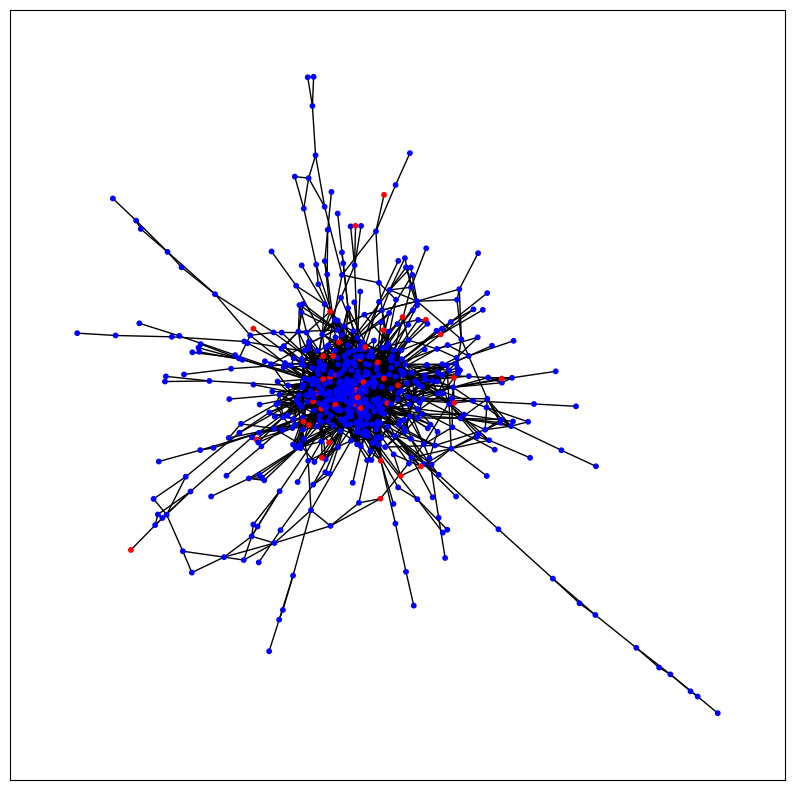

In [840]:
#color the nodes in red, where gender in df_angels is female
female_shareholders = set(df_angels_active[df_angels_active['gender'] == 'female']['shareholder_name'])
#replace space with _ in all names of female shareholders
# Replace spaces with underscores in the names of female shareholders
female_shareholders = {name.replace(" ", "_") for name in female_shareholders}

# Create a list of node colors
node_colors = ['red' if node in female_shareholders else 'blue' for node in subgraph_simulated.nodes]
node_sizes = [10 if node in female_shareholders else 10 for node in subgraph_simulated.nodes]
# Draw the graph
pos = nx.spring_layout(subgraph_simulated)
plt.figure(figsize=(10,10))
nx.draw_networkx(subgraph_simulated, pos, with_labels=False, node_size=node_sizes, edge_color='black', node_color=node_colors)
#save as png

plt.show()

In [841]:
#Draw a network graph of active angels only
# Create a new DataFrame where each row represents a co-investment

#only consider active angels in df_investment_rel_angel_startup
#match status from df_angels to df_investment_rel_angel_startup
#df_investment_rel_angel_startup = df_investment_rel_angel_startup.merge(df_angels[['name','status']], left_on='name', right_on='name', how='left')
#only consider active angels
# df_investment_rel_angel_startup_active = df_investment_rel_angel_startup[df_investment_rel_angel_startup['status'] == 'active']

co_investments_active = df_investment_rel_angel_startup.merge(df_investment_rel_angel_startup, on='startup_name')

# Filter out rows where the investor is the same in both columns
co_investments_active = co_investments_active[co_investments_active['shareholder_name_mapped_x'] != co_investments_active['shareholder_name_mapped_y']]
# # Create a table with the number of co-investments for each pair of investors
co_investment_counts_active = co_investments_active.groupby(['shareholder_name_mapped_x', 'shareholder_name_mapped_y']).size().reset_index(name='CoInvestments')

#replace all spaces with _ in shareholder_name_mapped_x
co_investment_counts_active['shareholder_name_mapped_x'] = co_investment_counts_active['shareholder_name_mapped_x'].str.replace(' ', '_')
co_investment_counts_active['shareholder_name_mapped_y'] = co_investment_counts_active['shareholder_name_mapped_y'].str.replace(' ', '_')

co_investment_counts_active.to_csv('co_investment_counts_active.csv', index=False)

#sort by number of co-investments
co_investment_counts_active = co_investment_counts_active.sort_values(by=['CoInvestments'], ascending=False)
print(co_investment_counts_active)

                            shareholder_name_mapped_x  \
4047                                ROMM_Holding_GmbH   
4053                                ROMM_Holding_GmbH   
4387                     Roskopf_Ventures_GmbH_Berlin   
5544                                   whiletrue_GmbH   
5546                                   whiletrue_GmbH   
...                                               ...   
1975                                GPS_Ventures_GmbH   
1974                                GPS_Ventures_GmbH   
1973  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
1972  GPF_-_Global_Peace_Fund_UG_(haftungsbeschränkt)   
5567                  wrapall_UG_(haftungsbeschränkt)   

               shareholder_name_mapped_y  CoInvestments  
4047        Roskopf_Ventures_GmbH_Berlin              6  
4053                      whiletrue_GmbH              6  
4387                   ROMM_Holding_GmbH              6  
5544                   ROMM_Holding_GmbH              6  
5546        Roskopf_Ventu

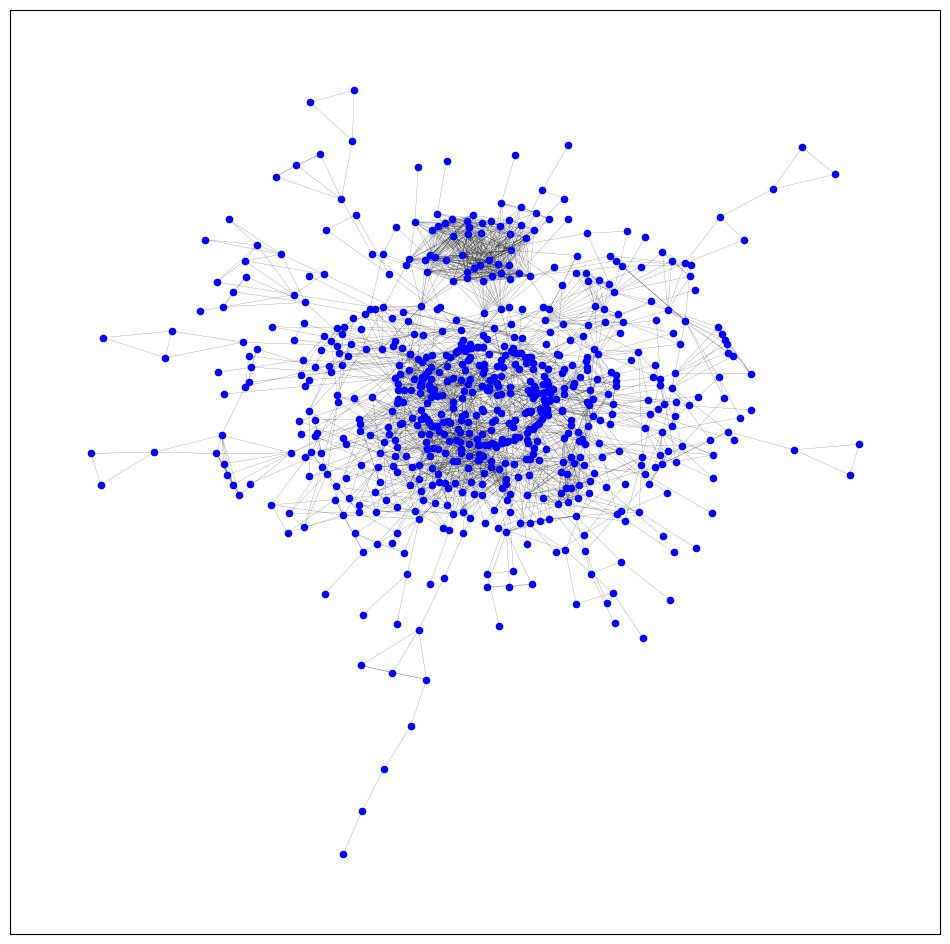

In [842]:
#plot network graph of active angels only
# Create a graph from the co_investment_counts DataFrame

G_active = nx.from_pandas_edgelist(co_investment_counts_active, 'shareholder_name_mapped_x', 'shareholder_name_mapped_y', ['CoInvestments'])

# Draw the graph
pos = nx.kamada_kawai_layout(G_active, scale=2)  
# pos = nx.spring_layout(G_active)
#make the graph bigger
plt.figure(figsize=(12,12))
# make nodes bigger in the graph
nx.draw_networkx(G_active, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color='blue')
# nx.draw_networkx(G_active, pos, with_labels=False, node_size=5, edge_color='black', node_color='green')

#Save graph as png
plt.savefig('graphs/Active Angels Network Graph.png')

## Detecting communities - 4



In [843]:
from cdlib import algorithms
import networkx as nx
import igraph as ig

In [844]:
# Was nutzen wir (angelehnt an bubna, aber deren walk trap ausgetaischt mit apparently more robus leiden algorithmus) considered
# - Leiden (von louvain zu Leiden)
# - minimum 5 community members
# - diameter of the community not larger than 1/4 of the diameter of the largest connected subgraph

#Community detection, where we remove all communitiues that are only composed of less than 5 nodes or which have a diameter larger than 1/4 of the network diameter
from cdlib import algorithms
# Create a networkx graph (replace this with your graph)
def detectCommunities(G, method):
    # Apply the Walktrap algorithm to the graph
    if method == 'walktrap':
        coms = algorithms.walktrap(G)
    if method == 'louvain':
        coms = algorithms.louvain(G)
    if method == 'leiden':
        coms = algorithms.leiden(G)
    if method == 'infomap':
        coms = algorithms.infomap(G)
    print(f"We are using the {method} algorithm to detect communities\n")

    print("The network has "+ str(G.number_of_nodes())+" nodes\n")
    print("We detected "+str(len(coms.communities))+' communities\n')

    print("The communities have those sizes respectively: \n")
    print([len(community) for community in coms.communities]) # print sizes of all remaining communities
    #remove all smaller than 5
    largest_cc = max(nx.connected_components(G), key=len)

    # Generate the subgraph of G consisting only of this component
    subgraph = G.subgraph(largest_cc)

    # Calculate and print the diameter of this subgraph
    network_diameter = nx.diameter(subgraph)
    # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
    coms.communities = [community for community in coms.communities if nx.diameter(G.subgraph(community)) <= network_diameter/4]
    print("The communities have those sizes respectively post nwd: \n")
    print([len(community) for community in coms.communities])
    coms.communities = [community for community in coms.communities if len(community) >4]
    print("The communities have those sizes respectively post >5: \n")
    print([len(community) for community in coms.communities])
    # #remove communities larger than 25
    # coms.communities = [community for community in coms.communities if len(community) < 25]
    print("After removing all with less than 5 community members we have "+str(len(coms.communities))+" communities left. \n")
    print(coms.communities)
    return coms.communities


def comparison(G):
    communities_walktrap = detectCommunities(G,'walktrap')
    communities_louvain = detectCommunities(G,'louvain')
    communities_leiden = detectCommunities(G,'leiden')
    communities_infomap = detectCommunities(G,'infomap')

    # Create df that compares the number of communities across the different methods
    df_community_comparison = pd.DataFrame(columns=("method","number_of_communities"))
    df_community_comparison.loc[0] = ["walktrap", len(communities_walktrap)]
    df_community_comparison.loc[1] = ["louvain", len(communities_louvain)]
    df_community_comparison.loc[2] = ["leiden", len(communities_leiden)]
    df_community_comparison.loc[3] = ["infomap", len(communities_infomap)]
    return df_community_comparison

# comparison_g_active = comparison(G_active)
# comparison_g_simulated = comparison(G_simulated)

# #Same thing for simulated data

# # Create a networkx graph (replace this with your graph)
# print(comparison_g_active)
# print(comparison_g_simulated)


We are using the infomap algorithm to detect communities

The network has 577 nodes

We detected 59 communities

The communities have those sizes respectively: 

[53, 32, 20, 19, 16, 16, 16, 15, 15, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2]
The communities have those sizes respectively post nwd: 

[32, 20, 19, 16, 16, 16, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2]
The communities have those sizes respectively post >5: 

[32, 20, 19, 16, 16, 16, 15, 15, 14, 14, 14, 13, 13, 13, 12, 12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 5, 5]
After removing all with less than 5 community members we have 39 communities left. 

[['ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH_Berlin', 'whiletrue_GmbH', 'Alvio_GmbH', 'PK_Projects_GmbH', 

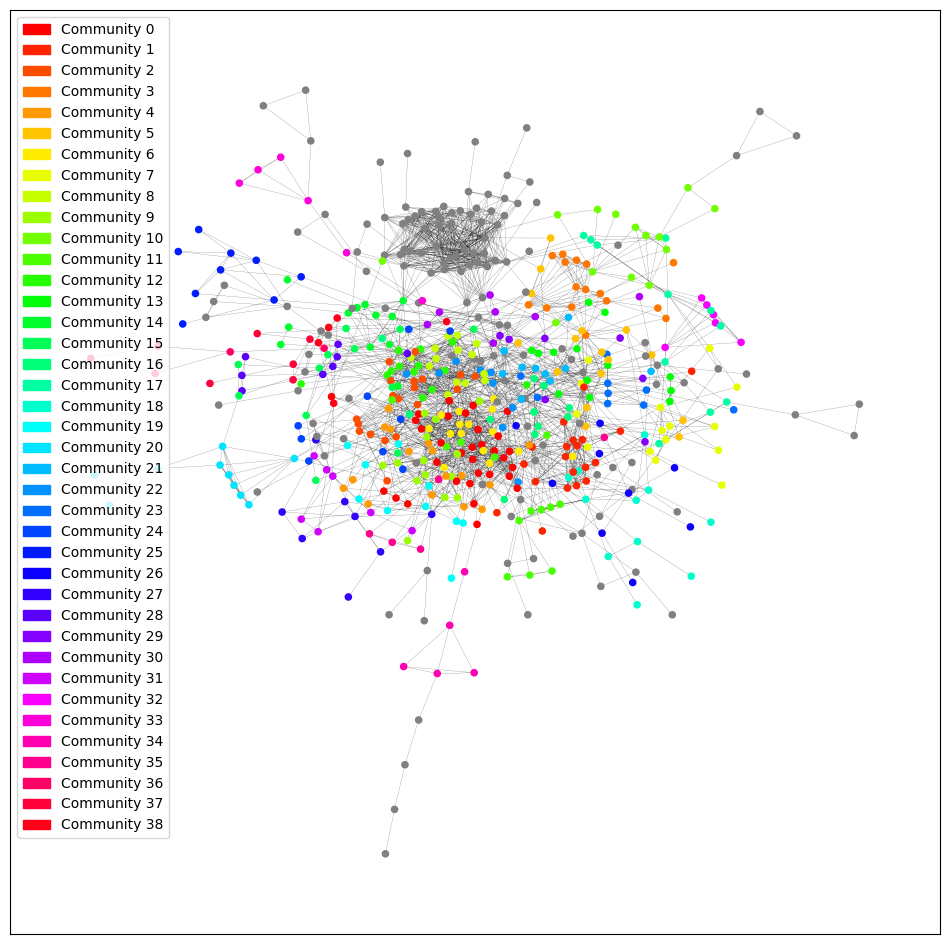

{'Dr._Stefan_Wiskemann': 0, 'AleHa_Holding_UG_(haftungsbeschränkt)': 0, 'HiddenMarkets_UG_(haftungsbeschränkt)': 0, 'DR._MARTIN_HECKER': 0, 'JAN_ARNE_TEGTMEIER': 0, 'Florian_Huber_Beteiligungen_GmbH': 0, 'Bochum_Ventures_GmbH': 0, 'Liberty_Ventures_GmbH': 0, 'Ralph_Müller': 0, 'STS_Ventures_II_GmbH': 0, 'Schwarzenholz_Ventures_GmbH': 0, 'Stefan_Rühling_Capital_GmbH_AG_Würzburg': 0, 'PK_Projects_GmbH': 0, 'B.I.G._Holding_SE': 0, 'ULRICH_CHRISTOPH_HEINRICH_HELLBERG': 0, 'Ey_Ventures_GmbH': 0, 'make_a_startup_GmbH': 0, 'Florian_Müller_Beteiligungsgesellschaft_UG_(haftungsbeschränkt)': 0, 'Mobilis_in_Mobili_GmbH': 0, 'DRSAPS_GmbH': 0, 'Mega_Ventures_GmbH': 0, 'Connect_Ventures_Three_LP': 0, 'Professor_Ronald_Richter': 0, 'Dr._Joachim_Maus': 0, 'Peter_Koch': 0, 'Fabiola_Hochkirchen': 0, 'Piotr_Swiatek_Brzezinski': 0, 'Weynberg_Ventures_GmbH': 0, 'Wathory_Holding_GmbH': 0, 'Mathias_Alt': 0, 'M-TRIBES_GmbH': 0, 'GALANDER_Beteiligungs_GmbH': 0, 'Eyser_GmbH_Stuttgart': 1, 'AllgäuSports_WSH_GmbH

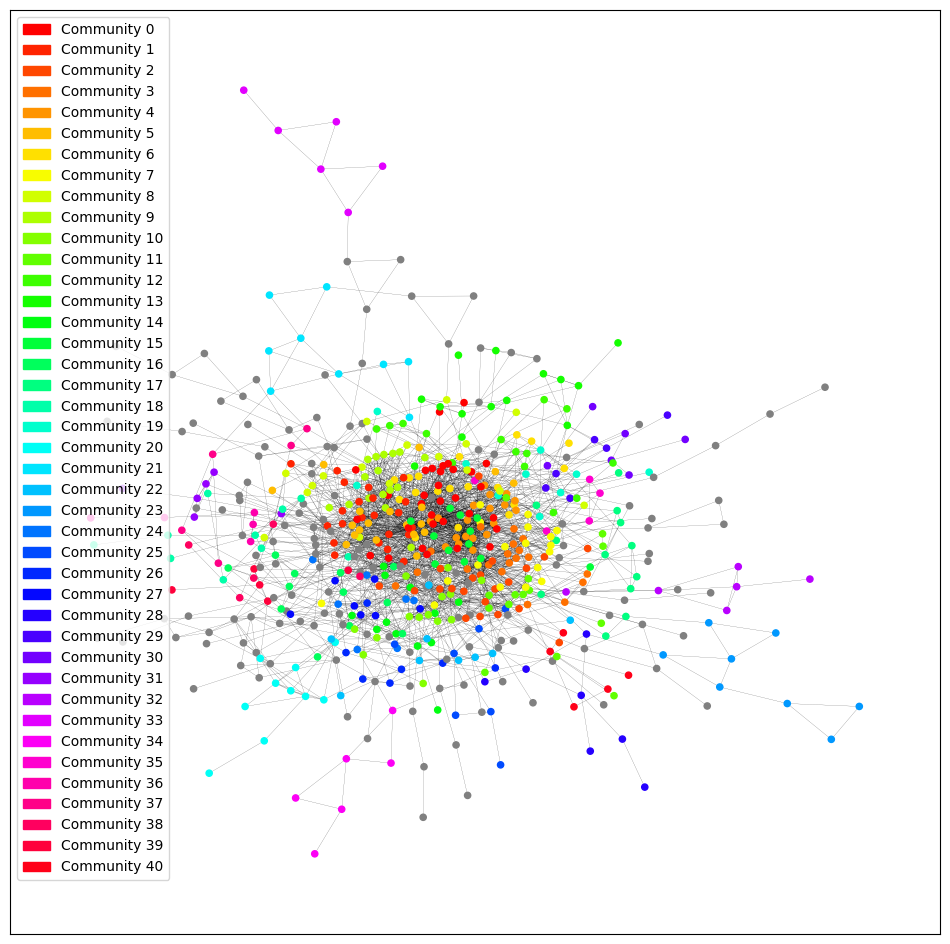

In [845]:
#get largest subgraph of G_active
largest_cc_active = max(nx.connected_components(G_active), key=len)
subgraph_active = G_active.subgraph(largest_cc_active)

#get largest subgraph of G_simulated
largest_cc_simulated = max(nx.connected_components(G_simulated), key=len)
subgraph_simulated = G_simulated.subgraph(largest_cc_simulated)


import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def drawCommunities(G, communities):
    # Create a dictionary of community mappings
    community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}
    print(community_mapping)
    # Generate unique colors for each community
    colors = plt.cm.hsv(np.linspace(0, 1, len(communities)))
    community_colors = dict(zip(range(len(communities)), colors))

    # Create a list of node colors based on their community, if the are not in the list make it grey
    node_colors = [community_colors.get(community_mapping.get(node), 'grey') for node in G.nodes()]
    
    # Draw the graph
    pos = nx.kamada_kawai_layout(G, scale=2)  # Using Kamada-Kawai layout with increased scale
    plt.figure(figsize=(12,12))  # Increase figure size
    nx.draw_networkx(G, pos, with_labels=False, node_size=20, width=0.1, edge_color='black', node_color=node_colors)
    #add a legend for the communities
    # Create a legend
    patch_list = [patches.Patch(color=color, label=f'Community {community_id}') for community_id, color in community_colors.items()]
    plt.legend(handles=patch_list, loc='upper left')



    # Save as PNG
    plt.savefig('graphs/Network_graph_with_community_mapping.png')
    
    # Display the plot
    plt.show()

# Example usage, make sure detectCommunities function is defined and works correctly
communities=detectCommunities(subgraph_active, 'infomap')
print(f"communities: {communities}")
communities_simulated = detectCommunities(subgraph_simulated, 'infomap')

# #get subset where communities are saller than 25
# communities = [community for community in communities if len(community) < 25]
# communities_simulated = [community for community in communities_simulated if len(community) < 25]

drawCommunities(subgraph_active, communities)
drawCommunities(subgraph_simulated, communities_simulated)

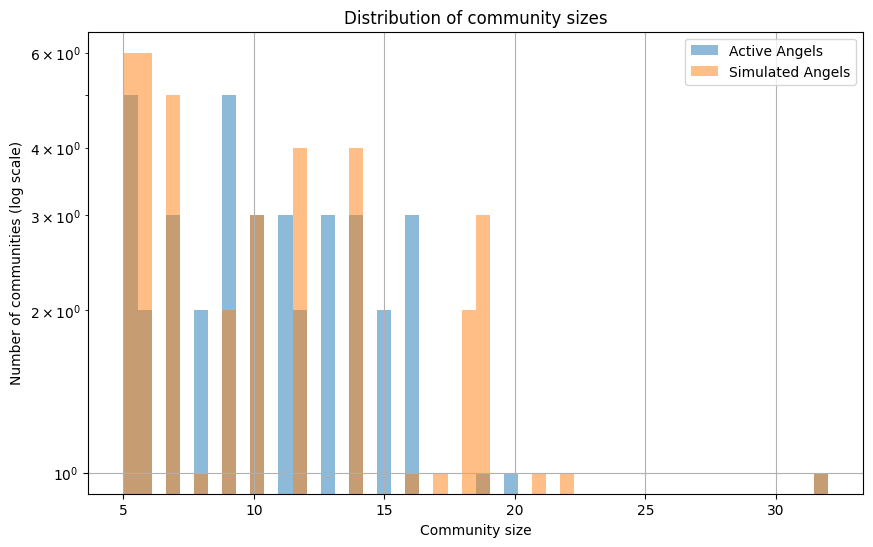

In [846]:
#plot the distribution of the how often a certain community size occurs
#count how often a certain community size occurs
community_sizes = [len(community) for community in communities]
community_sizes_simulated = [len(community) for community in communities_simulated]


# Plot the distribution of community sizes
plt.figure(figsize=(10, 6))
plt.hist(community_sizes, bins=50, log=True, alpha=0.5, label='Active Angels')
plt.hist(community_sizes_simulated, bins=50, log=True, alpha=0.5, label='Simulated Angels')
plt.title('Distribution of community sizes')
plt.xlabel('Community size')
plt.ylabel('Number of communities (log scale)')
plt.legend()
plt.grid(True)
# Save as PNG
plt.savefig('graphs/Distribution of community sizes.png')
plt.show()


In [847]:
#for each shareholder map into the df_angels_active the community they belong to
# Create a dictionary of community mappings
community_mapping = {node: community_id for community_id, community in enumerate(communities) for node in community}

community_mapping_simulated = {node: community_id for community_id, community in enumerate(communities_simulated) for node in community}
# Map the community of each node to the df_angels_active DataFrame

df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)
#fill nodes who are part of subgraph with -1 as they are not part of any community, fill everything thats still Nan with "not core network"
for node in subgraph_active.nodes():
    if node not in community_mapping:
        community_mapping[node] = -1
df_angels_active['community'] = df_angels_active['shareholder_name'].map(community_mapping)

df_angels_active['community'] = df_angels_active['community'].fillna(100).astype(int)
df_angels_active['community_simulated'] = df_angels_active['shareholder_name'].map(community_mapping_simulated)
df_angels_active['community_simulated'] = df_angels_active['community_simulated'].fillna(-1).astype(int)
df_angels_active

Unnamed: 0                               shareholder_name_old  \
33         13898                                    Oliver Diezmann   
32         13535                                 JAN ARNE TEGTMEIER   
62         14067                                     DIRK BREITBACH   
131        13543                                  DR. MARTIN HECKER   
132        13548                                     STEFAN SCHMÖLZ   
...          ...                                                ...   
1210       25338                     Bruemmer Digital Ventures GmbH   
1211       25361           Octopus Ventures UG (haftungsbeschränkt)   
1213       25365                                        TactiQ GmbH   
1221       25487      Hanseatic Digital JPL UG (haftungsbeschränkt)   
1222       25500  Happy & Fresh Beratungs- und Beteiligungsgesel...   

      shareholder_id                     created_at  number_of_investments  \
33            5164.0  2024-03-10 17:37:22.160384+00                      6   
32            4673.0  2024-03-10 17:37:22.160384+00                      6   
62            5402.0  2024-03-10 17:37:22.160384+00                      5   
131           4675.0  2024-03-10 17:37:22.160384+00                      4   
132           4678.0  2024-03-10 17:37:22.160384+00                      4   
...              ...                            ...                    ...   
1210           803.0  2024-03-10 17:37:19.751917+00                      2   
1211           634.0  2024-03-10 17:37:19.751917+00                      2   
1213         19165.0  2024-03-10 17:37:30.209471+00                      2   
1221         19966.0  2024-03-10 17:37:30.209471+00                      2   
1222          1847.0  2024-03-10 17:37:20.561047+00                      2   

     shareholder_type            register_id register_court  \
33              angel                    NaN            NaN   
32              angel                    NaN            NaN   
62              angel                    NaN            NaN   
131             angel                    NaN            NaN   
132             angel                    NaN            NaN   
...               ...                    ...            ...   
1210            angel             HRB 736573       Mannheim   
1211            angel  AG München HRB 262683        München   
1213            angel              HRB 32242       Augsburg   
1221            angel             HRB 150307        Hamburg   
1222            angel              HRB 39000        Dresden   

      total_participation  register_mapping  ... munich_simulated  \
33               0.675000               NaN  ...                0   
32               0.868333               NaN  ...                0   
62               0.492000               NaN  ...                0   
131              0.670000               NaN  ...                0   
132              0.620000               NaN  ...                4   
...                   ...               ...  ...              ...   
1210            73.809500              33.0  ...                0   
1211            29.500000             136.0  ...                2   
1213            19.350000             111.0  ...                2   
1221            29.450000             261.0  ...                0   
1222             8.500000             621.0  ...                0   

     hamburg_simulated frankfurt_simulated stuttgart_simulated  \
33                   6                   0                   0   
32                   6                   0                   0   
62                   0                   0                   0   
131                  4                   0                   0   
132                  0                   0                   0   
...                ...                 ...                 ...   
1210                 0                   2                   0   
1211                 0                   0                   0   
1213                 0              

In [848]:
import pandas as pd

# Definition der Funktion zur Berechnung des HHI
def gender_hhi(df):
    # Zählen der Vorkommen jedes Geschlechts
    gender_counts = df['gender'].value_counts()

    
    
    #get only male and female


    gender_counts = gender_counts.loc[gender_counts.index.isin(['male', 'female'])]

    # Quadrieren der gezählten Häufigkeiten
    squared_counts = gender_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

# Erstellen eines DataFrames mit einer Spalte 'gender'
df = pd.DataFrame({
    'gender': ['male', 'female', 'female', 'male', 'non-binary', 'female', 'male']
})

# Berechnen des HHI für den Beispiel-DataFrame
hhi = gender_hhi(df)
print(f'Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: {hhi}')

Der Herfindahl-Hirschman Index für die Geschlechterverteilung beträgt: 0.3673469387755102


In [849]:
#define function to calculate region HHI for communities
def region_hhi(df):
    
    # Zählen der Vorkommen jeder Region
    region_counts = df['region_mapping'].value_counts()
    #drop rows other
    region_counts = region_counts.drop('other', errors='ignore')
    # Quadrieren der gezählten Häufigkeiten
    squared_counts = region_counts ** 2
    # Summe der quadrierten Häufigkeiten
    sum_of_squares = squared_counts.sum()
    # Berechnung des HHI
    hhi = sum_of_squares / (len(df) ** 2)
    return hhi

In [850]:
def calculate_ei_index(num_males, num_females):
    # Calculate within-group ties for males and females
    ties_within_males = num_males * (num_males - 1) / 2
    ties_within_females = num_females * (num_females - 1) / 2

    # Calculate cross-group ties
    cross_group_ties = num_males * num_females

    # Total within-group ties
    total_within_group_ties = ties_within_males + ties_within_females

    # EI index calculation
    ei_index = (cross_group_ties - total_within_group_ties) / (cross_group_ties + total_within_group_ties)

    return ei_index

# Example usage:
num_males = 28
num_females = 2
ei_index = calculate_ei_index(num_males, num_females)

print(f"The EI index for a fully connected network with {num_males} males and {num_females} females is: {ei_index:.3f}")

The EI index for a fully connected network with 28 males and 2 females is: -0.743


In [851]:
# columns for community comparison
community_columns = ["community","number_of_members","average_age","sd_eigenvector_centrality","sd_degree_centrality","sd_total_participation","sd_number_of_investments","sd_age","sd_industry_hhi","sd_region_hhi","ei_index_gender","region_hhi_value","ei_index_dach","average_eigenvector_centrality",'average_number_of_investments']

In [852]:
# for each angel calculate degree centrality and add to df_angels_active
df_angels_active['degree_centrality'] = df_angels_active['shareholder_name'].map(nx.degree_centrality(G_active))
df_angels_active['degree_centrality_simulated'] = df_angels_active['shareholder_name'].map(nx.degree_centrality(G_simulated))

#fill degree centrality with 0 for where it is null
df_angels_active['degree_centrality'] = df_angels_active['degree_centrality'].fillna(0)
df_angels_active['degree_centrality_simulated'] = df_angels_active['degree_centrality_simulated'].fillna(0)


# for each angel calculate eigenvector centrality and add to df_angels_active
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(G_active))
df_angels_active['eigenvector_centrality_simulated'] = ""
df_angels_active['eigenvector_centrality_simulated'] = df_angels_active['shareholder_name'].map(nx.eigenvector_centrality(G_simulated))

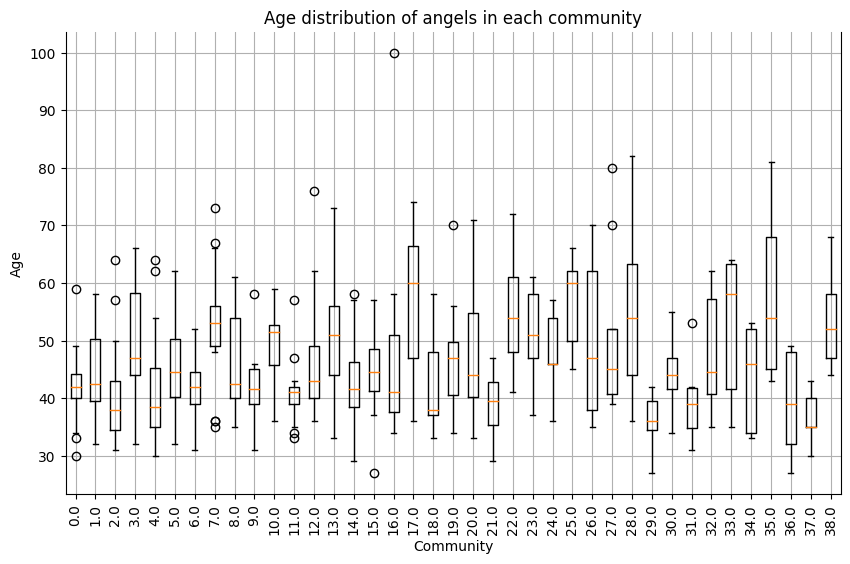

In [853]:
#build df_communities_active
df_communities_active = pd.DataFrame(columns=community_columns)
#drip rows with nan from commnities

#

# Loop through each community
for community_id, community in enumerate(communities):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    
    #Calculate SD of age
    sd_age = df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community'] == community_id]['total_participation'].std()
    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].mean()
    sd_number_of_investments = df_angels_active[df_angels_active['community'] == community_id]['number_of_investments'].std()
   
    
    # Calculate the average eigenvector centrality of the community
    average_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].mean()
    sd_eigenvector_centrality = df_angels_active[df_angels_active['community'] == community_id]['eigenvector_centrality'].std()
    # Calculate the number of members in the community
    number_of_members = df_angels_active[df_angels_active['community'] == community_id].shape[0]
    temp= df_angels_active[df_angels_active['community'] == community_id]
    
    #calculate sd degree centrality
    sd_degree_centrality = df_angels_active[df_angels_active['community'] == community_id]['degree_centrality'].std()


    # Calculate the percentage of men
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    #calculate ei index per community
    if(len(temp) > 0):
        
        ei_index = calculate_ei_index(len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')]),len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'male')]))
    else:
        ei_index = 1000
    

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community'] == community_id]['industry_HHI'].std()
    
    #Calculate sd of region hhi
    sd_region_hhi = df_angels_active[df_angels_active['community'] == community_id]['region_HHI'].std()
    # Calculate female ratio
    # female_ratio = len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['gender'] == 'female')])/len(community)
    # Add the community to the DataFrame
    region_hhi_value = region_hhi(temp)
    #get angels in this community where country is not in DE CH and AT
    non_dach = df_angels_active[(df_angels_active['community'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]

    #calculate non-DACH ratios
    if len(temp) > 0:
        ei_index_dach = calculate_ei_index(len(df_angels_active[(df_angels_active['community'] == community_id) & (df_angels_active['country'].isin(['DE', 'CH', 'AT']))]),len(df_angels_active[(df_angels_active['community'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]))
    else:
        ei_index_dach = 0
    #add to df_communities_active
    
    df_communities_active.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_degree_centrality,sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,ei_index,region_hhi_value,ei_index_dach,average_eigenvector_centrality,average_number_of_investments]

    


#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_active['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_active['community'])
plt.title('Age distribution of angels in each community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community.png')
plt.show()

#calc average_sd_age
average_sd_age_active = df_communities_active['average_age'].mean()
#drop rows with nan
df_communities_active = df_communities_active.dropna(subset=['sd_eigenvector_centrality'])


In [854]:
# #plot gender hhi
# plt.figure(figsize=(10, 6))
# plt.bar(df_communities_active['community'], df_communities_active['female_ratio'])
# plt.title('Female ratio in communities')
# plt.xlabel('Community')
# plt.ylabel
# plt.grid(True)
# plt.xticks(rotation=90)
# plt.gca().spines['top'].set_visible(False)
# plt.savefig
# plt.show()


In [855]:
#return subset of df_angels_active where community is 25
df_angels_active[df_angels_active['community'] == 25]

Unnamed: 0                shareholder_name_old  shareholder_id  \
29          9007                           BeAI GmbH          1288.0   
1159       23157                       Markus Hammes         18149.0   
86          3301              Impulsio Ventures GmbH          4205.0   
1068       18088                  Guenter Christmann         11091.0   
322        20451  Dr. Ulrich Matthias Jürgen Meißner         14363.0   
1165       24369    Akribie nobel Aktiengesellschaft         19688.0   
968        14157                     Dr. Stefan Hehn          5522.0   
923        13004                    EGO Capital GmbH         14503.0   
142        24615                         LeMoMe GmbH          6565.0   

                         created_at  number_of_investments shareholder_type  \
29    2024-03-10 17:37:19.751917+00                      6            angel   
1159  2024-03-10 17:37:29.143888+00                      2            angel   
86    2024-03-10 17:37:21.332579+00                      4            angel   
1068  2024-03-10 17:37:25.834675+00                      2            angel   
322   2024-03-10 17:37:27.447081+00                      3            angel   
1165  2024-03-10 17:37:30.209471+00                      2            angel   
968   2024-03-10 17:37:22.160384+00                      2            angel   
923   2024-03-10 17:37:27.447081+00                      2            angel   
142   2024-03-10 17:37:22.963246+00                      3            angel   

     register_id          register_court  total_participation  \
29     HRB 13943  Bad Homburg v. d. Höhe             3.839733   
1159         NaN                     NaN             5.430000   
86      HRB 7384    Königstein im Taunus             8.485000   
1068         NaN                     NaN             5.320000   
322          NaN                     NaN             4.003667   
1165   HRB 87373               Darmstadt             2.640000   
968          NaN                     NaN             2.543760   
923     HRB 8622    Königstein im Taunus             7.500000   
142   HRB 113167               Frankfurt             3.017500   

      register_mapping  ... munich_simulated hamburg_simulated  \
29               282.0  ...                0                 0   
1159               NaN  ...                0                 0   
86               283.0  ...                0                 0   
1068               NaN  ...                0                 0   
322                NaN  ...                0                 0   
1165             270.0  ...                0                 0   
968                NaN  ...                0                 0   
923              283.0  ...                0                 0   
142              281.0  ...                0                 0   

     frankfurt_simulated stuttgart_simulated other_simulated  \
29                     6                   0               0   
1159                   2                   0               0   
86                     0                   0               0   
1068                   2                   0               0   
322                    3                   0               0   
1165                   2                   0               0   
968                    2                   0               0   
923                    0                   0               2   
142                    3                   0               0   

      cologne_simulated leipzig_simulated industry_HHI_simulated  \
29                    0                 0               0.277778   
1159                  0                 0               1.000000   
86                    0                 0               0.375000   
1068                  0                 0               1.000000   
322                   0                 0               0.555556   
1165                  0                 0               0.500000   
968                   0                 0               1.000000 

In [856]:
#descriptive stats on communities
#create df_community_descriptive
df_community_descriptive = pd.DataFrame(columns=["variable_name","value"])

number_of_communities = len(df_communities_active)
df_community_descriptive.loc[0] = ["number_of_communities", number_of_communities]
#add average number of members per community
#add average number of members per community
average_number_of_members = df_communities_active['number_of_members'].mean()
df_community_descriptive.loc[1] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_active['average_age'].mean()
df_community_descriptive.loc[2] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_active['average_number_of_investments'].mean()
df_community_descriptive.loc[3] = ["average_number_of_investments", average_number_of_investments]

#add max number of members
max_number_of_members = df_communities_active['number_of_members'].max()
df_community_descriptive.loc[4] = ["max_number_of_members", max_number_of_members]

#add min number of members
min_number_of_members = df_communities_active['number_of_members'].min()
df_community_descriptive.loc[5] = ["min_number_of_members", min_number_of_members]

# add median number od members
median_number_of_members = df_communities_active['number_of_members'].median()
df_community_descriptive.loc[6] = ["median_number_of_members", median_number_of_members]

#calculate sd of number of members
sd_number_of_members = df_communities_active['number_of_members'].std()
df_community_descriptive.loc[7] = ["sd_number_of_members", sd_number_of_members]

df_community_descriptive

variable_name      value
0          number_of_communities  39.000000
1      average_number_of_members  11.179487
2                    average_age  46.848637
3  average_number_of_investments   2.761698
4          max_number_of_members  32.000000
5          min_number_of_members   5.000000
6       median_number_of_members  10.000000
7           sd_number_of_members   5.260937

In [857]:
#create df_angels_active_simulated
#add_columns for each region_simulated berlin_simulated, munich_simulated, hamburg_simulated, franfurt_simulated, stuttgart_simulated, other_simulated, cologne_simulated, leipzig_simulated
df_angels_active['berlin_simulated'] = 0
df_angels_active['munich_simulated'] = 0
df_angels_active['hamburg_simulated'] = 0
df_angels_active['frankfurt_simulated'] = 0
df_angels_active['stuttgart_simulated'] = 0
df_angels_active['other_simulated'] = 0
df_angels_active['cologne_simulated'] = 0
df_angels_active['leipzig_simulated'] = 0



#count for every shareholder how many startups they are involved in per location
#create a df that counts the number of startups per shareholder per location
df_investment_rel_angel_startup_simulated['count'] = 1
df_shareholder_relations_pivot_simulated = df_investment_rel_angel_startup_simulated.pivot_table(index='angel', columns='region', values='count', aggfunc='sum')
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.fillna(0)
df_shareholder_relations_pivot_simulated = df_shareholder_relations_pivot_simulated.reset_index()
df_shareholder_relations_pivot_simulated

#now map the values from df_shareholder_relations_pivot_simulated to df_angels_active

for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    berlin_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['berlin']
    munich_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['munich']
    stuttgart_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['stuttgart']
    leipzig_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['leipzig']
    cologne_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['cologne']
    franfurt_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['frankfurt']
    hamburg_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['hamburg']
    other_simulated = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['other']
    # international = df_shareholder_relations_pivot_simulated[df_shareholder_relations_pivot_simulated['angel'] == angel]['international']

    if len(berlin_simulated) > 0:
        df_angels_active.at[index, 'berlin_simulated'] = berlin_simulated.values[0]
    if len(munich_simulated) > 0:
        df_angels_active.at[index, 'munich_simulated'] = munich_simulated.values[0]
    if len(stuttgart_simulated) > 0:
        df_angels_active.at[index, 'stuttgart_simulated'] = stuttgart_simulated.values[0]
    if len(leipzig_simulated) > 0:
        df_angels_active.at[index, 'leipzig_simulated'] = leipzig_simulated.values[0]
    if len(cologne_simulated) > 0:
        df_angels_active.at[index, 'cologne_simulated'] = cologne_simulated.values[0]
    if len(franfurt_simulated) > 0:
        df_angels_active.at[index, 'frankfurt_simulated'] = franfurt_simulated.values[0]
    if len(hamburg_simulated) > 0:
        df_angels_active.at[index, 'hamburg_simulated'] = hamburg_simulated.values[0]
    if len(other_simulated) > 0:
        df_angels_active.at[index, 'other_simulated'] = other_simulated.values[0]
    # if len(international) > 0:
    #     df_angels_active.at[index, 'international'] = international.values[0]

df_angels_active


Unnamed: 0                               shareholder_name_old  \
33         13898                                    Oliver Diezmann   
32         13535                                 JAN ARNE TEGTMEIER   
62         14067                                     DIRK BREITBACH   
131        13543                                  DR. MARTIN HECKER   
132        13548                                     STEFAN SCHMÖLZ   
...          ...                                                ...   
1210       25338                     Bruemmer Digital Ventures GmbH   
1211       25361           Octopus Ventures UG (haftungsbeschränkt)   
1213       25365                                        TactiQ GmbH   
1221       25487      Hanseatic Digital JPL UG (haftungsbeschränkt)   
1222       25500  Happy & Fresh Beratungs- und Beteiligungsgesel...   

      shareholder_id                     created_at  number_of_investments  \
33            5164.0  2024-03-10 17:37:22.160384+00                      6   
32            4673.0  2024-03-10 17:37:22.160384+00                      6   
62            5402.0  2024-03-10 17:37:22.160384+00                      5   
131           4675.0  2024-03-10 17:37:22.160384+00                      4   
132           4678.0  2024-03-10 17:37:22.160384+00                      4   
...              ...                            ...                    ...   
1210           803.0  2024-03-10 17:37:19.751917+00                      2   
1211           634.0  2024-03-10 17:37:19.751917+00                      2   
1213         19165.0  2024-03-10 17:37:30.209471+00                      2   
1221         19966.0  2024-03-10 17:37:30.209471+00                      2   
1222          1847.0  2024-03-10 17:37:20.561047+00                      2   

     shareholder_type            register_id register_court  \
33              angel                    NaN            NaN   
32              angel                    NaN            NaN   
62              angel                    NaN            NaN   
131             angel                    NaN            NaN   
132             angel                    NaN            NaN   
...               ...                    ...            ...   
1210            angel             HRB 736573       Mannheim   
1211            angel  AG München HRB 262683        München   
1213            angel              HRB 32242       Augsburg   
1221            angel             HRB 150307        Hamburg   
1222            angel              HRB 39000        Dresden   

      total_participation  register_mapping  ... munich_simulated  \
33               0.675000               NaN  ...                0   
32               0.868333               NaN  ...                0   
62               0.492000               NaN  ...                0   
131              0.670000               NaN  ...                0   
132              0.620000               NaN  ...                4   
...                   ...               ...  ...              ...   
1210            73.809500              33.0  ...                0   
1211            29.500000             136.0  ...                2   
1213            19.350000             111.0  ...                2   
1221            29.450000             261.0  ...                0   
1222             8.500000             621.0  ...                0   

     hamburg_simulated frankfurt_simulated stuttgart_simulated  \
33                   6                   0                   0   
32                   6                   0                   0   
62                   0                   0                   0   
131                  4                   0                   0   
132                  0                   0                   0   
...                ...                 ...                 ...   
1210                 0                   2                   0   
1211                 0                   0                   0   
1213                 0              

In [858]:
# Updated list of industries with 'medicine' renamed to 'medicine_biotech'
english_industries = [
    'mobility', 'software', 'food', 'industry', 'staffing', 
    'energy', 'media', 'service', 'construction', 'hardware', 
    'blockchain_crypto', 'gaming', 'medicine_biotech', 'agriculture', 
    'real_estate', 'environmental_technology', 'sports', 'education', 
    'ecommerce', 'finance', 'tourism', 'advertising', 'logistics', 
    'legal_consulting', 'insurance'
]

# Initialize the new columns with 0, using the updated English names
for industry in english_industries:
    df_angels_active[industry] = 0

# Assuming df_shareholder_relations is already defined and has a similar structure
# as shown in your initial code.
# Creating a pivot table to count the startups per shareholder per industry
df_shareholder_relations_pivot = df_investment_rel_angel_startup_simulated.pivot_table(
    index='angel', 
    columns='startup_industry', 
    values='count', 
    aggfunc='sum'
).fillna(0).reset_index()

# Mapping the values from the pivot table to df_angels_active
for index, row in df_angels_active.iterrows():
    shareholder_name_mapped = row['shareholder_name']
    
    # Iterate through each industry to assign the corresponding values
    for industry in english_industries:
        industry_count = df_shareholder_relations_pivot[df_shareholder_relations_pivot['angel'] == shareholder_name_mapped].get(industry)
        if industry_count is not None and len(industry_count) > 0:
            df_angels_active.at[index, industry] = industry_count.values[0]
           


In [859]:
#calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
# #calculate the industry_HHI for each angel
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    #calculate shares of total first
    
    total_shares = sum(market_shares)
    
    market_shares = [share/total_shares for share in market_shares]
    hhi = sum([share**2 for share in market_shares])

    return hhi

#calculate the industry_HHI for each angel based on the industry columns production_trade,technology_digital_services,energy_environment_infrastructure,healthcare,services_consulting
df_angels_active['industry_HHI_simulated'] = df_angels_active[['production_trade','technology_digital_services','energy_environment_infrastructure','healthcare','services_consulting']].apply(calculate_hhi, axis=1)

#calculate region HHI for each angel based on the region columns muncih,hamburg,berlin,frankfurt,other,leipzig,cologne,international
df_angels_active['region_HHI_simulated'] = df_angels_active[['munich','hamburg','berlin','frankfurt','other','leipzig','cologne','stuttgart']].apply(calculate_hhi, axis=1)




In [860]:
# #calculate eigenvector centrality for each angel in simulated graph
# # Create a dictionary of eigenvector centralities
eigenvector_centrality = nx.eigenvector_centrality(G_active)

# # Map the eigenvector centralities to the df_angels_active DataFrame
df_angels_active['eigenvector_centrality'] = df_angels_active['shareholder_name'].map(eigenvector_centrality)

# #fill NaN values with 0
# df_angels_active = df_angels_active.fillna(0)
# df_angels_active

      Unnamed: 0       shareholder_name_old  shareholder_id  \
123        10791         AleHa Holding GmbH          1944.0   
203         5040                DRSAPS GmbH         22694.0   
364         1157  Connect Ventures Three LP          3155.0   
253         4222          B.I.G. Holding SE          5868.0   
431         2261          Christian Richter          1144.0   
433         2316               Alt, Mathias          1201.0   
456         3064           Ey Ventures GmbH         21120.0   
481         3941            M-SYNDIKAT GmbH         21335.0   
1122       20442           Piotr Brzezinski         14353.0   

                         created_at  number_of_investments shareholder_type  \
123   2024-03-10 17:37:20.561047+00                      4            angel   
203   2024-03-10 17:37:33.369539+00                      3            angel   
364   2024-03-10 17:37:21.332579+00                      2            angel   
253   2024-03-10 17:37:22.160384+00                  

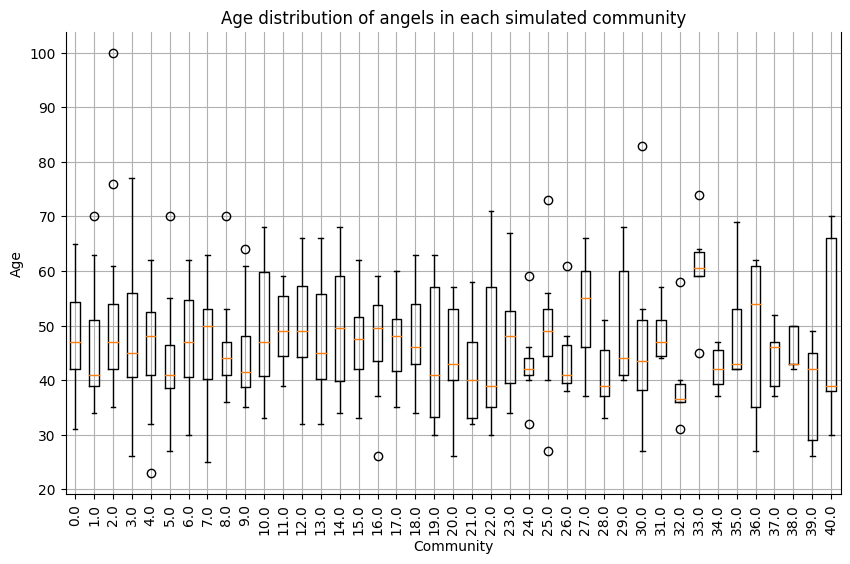

In [861]:
#build df_communities_simulated
df_communities_simulated = pd.DataFrame(columns=community_columns)
# Loop through each community
for community_id, community in enumerate(communities_simulated):
    # Calculate the average age of the community, do not include angels with age 0 or 1
    average_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].mean()
    sd_age = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['age'] > 1)]['age'].std()
    # Calculate the average total participation of the community
    average_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].mean()
    sd_total_participation = df_angels_active[df_angels_active['community_simulated'] == community_id]['total_participation'].std()

    # Calculate the average number of investments of the community
    average_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].mean()

    sd_number_of_investments = df_angels_active[df_angels_active['community_simulated'] == community_id]['number_of_investments'].std()

    #Calculate average eigenvector centrality
    average_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality_simulated'] != 0)]['eigenvector_centrality_simulated'].mean()
    sd_eigenvector_centrality = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['eigenvector_centrality_simulated'] != 0)]['eigenvector_centrality_simulated'].std()

    #Calculate sd of indutry hhi
    sd_industry_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['industry_HHI_simulated'].std()

    #calculate regio hhi
    sd_region_hhi = df_angels_active[df_angels_active['community_simulated'] == community_id]['region_HHI_simulated'].std()
    temp= df_angels_active[df_angels_active['community_simulated'] == community_id]
    
    if len(temp) > 0:
        female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'female')])/len(temp)
    else:
        female_ratio = 0
    
    #calculate sd degree centrality
    sd_degree_centrality = df_angels_active[df_angels_active['community_simulated'] == community_id]['degree_centrality_simulated'].std()

    
    #get angels in this community where country is not in DE CH and AT
    non_dach = df_angels_active[(df_angels_active['community_simulated'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]
    print(non_dach)
    #calculate non-DACH ratios
    non_dach_ratio = len(non_dach)/len(temp)
    #add to df_communities_active
    
    if(len(temp) > 0):
        ei_index_gender = calculate_ei_index(len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'female')]),len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] == 'male')]))
    else:
        ei_index_gender = 1000
    if len(temp) > 0:
        ei_index_dach = calculate_ei_index(len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['country'].isin(['DE', 'CH', 'AT']))]),len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (~df_angels_active['country'].isin(['DE', 'CH', 'AT']))]))
    else:
        ei_index_dach = 1000

    #Calculate region hhi
    region_hhi_value = region_hhi(temp)
    # Calculate the female_ratio of the community
    # female_ratio = len(df_angels_active[(df_angels_active['community_simulated'] == community_id) & (df_angels_active['gender'] =='female')])/len(community)

    # Calculate the number of members in the community
    number_of_members = len(community)
    # Add the community to the DataFrame
    df_communities_simulated.loc[community_id] = [community_id, number_of_members, average_age,sd_eigenvector_centrality, sd_degree_centrality,sd_total_participation,sd_number_of_investments ,sd_age,sd_industry_hhi,sd_region_hhi,ei_index_gender,region_hhi_value,ei_index_dach,average_eigenvector_centrality,average_number_of_investments]

df_communities_simulated

#in one plot plote the age distribution of the angels in each community as a boxplot
# Create a list of age distributions for each community

age_distributions = [df_angels_active[(df_angels_active['community_simulated'] == community_id)  & (df_angels_active['age'].astype(int) > 1)]['age'] for community_id in df_communities_simulated['community']]
# Create a boxplot of the age distributions
plt.figure(figsize=(10, 6))
plt.boxplot(age_distributions, labels=df_communities_simulated['community'])
plt.title('Age distribution of angels in each simulated community')
plt.xlabel('Community')
plt.ylabel('Age')
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().spines['top'].set_visible(False)
plt.savefig('graphs/Age distribution of angels in each community_simulated.png')
plt.show()




In [862]:
df_communities_simulated

community  number_of_members  average_age  sd_eigenvector_centrality  \
0         0.0               32.0    47.125000               4.427292e-02   
1         1.0               22.0    45.545455               3.470125e-02   
2         2.0               21.0    50.619048               1.194244e-02   
3         3.0               19.0    49.315789               3.469801e-02   
4         4.0               19.0    46.052632               4.480452e-02   
5         5.0               19.0    43.631579               4.294381e-02   
6         6.0               18.0    46.944444               5.099487e-02   
7         7.0               18.0    47.277778               2.939165e-02   
8         8.0               17.0    44.941176               1.417369e-02   
9         9.0               16.0    44.375000               2.353221e-02   
10       10.0               14.0    49.785714               2.550512e-02   
11       11.0               14.0    49.500000               1.254614e-02   
12       12.0               14.0    49.571429               4.774153e-03   
13       13.0               14.0    47.857143               4.395513e-03   
14       14.0               12.0    50.083333               2.035336e-02   
15       15.0               12.0    46.666667               3.102253e-02   
16       16.0               12.0    47.916667               9.385263e-03   
17       17.0               12.0    46.833333               6.084655e-03   
18       18.0               10.0    47.300000               1.194917e-02   
19       19.0               10.0    44.500000               1.217675e-02   
20       20.0               10.0    43.888889               7.235610e-04   
21       21.0                9.0    41.555556               5.804355e-04   
22       22.0                9.0    46.555556               1.466253e-02   
23       23.0                8.0    48.000000               1.565466e-05   
24       24.0                7.0    43.285714               1.398473e-02   
25       25.0                7.0    49.142857               3.173132e-03   
26       26.0                7.0    44.571429               1.961494e-03   
27       27.0                7.0    52.857143               1.393200e-02   
28       28.0                7.0    41.142857               4.709034e-04   
29       29.0                6.0    50.600000               8.274416e-03   
30       30.0                6.0    47.833333               5.527846e-04   
31       31.0                6.0    48.500000               2.701999e-03   
32       32.0                6.0    39.666667               1.757367e-03   
33       33.0                6.0    60.500000               3.869780e-09   
34       34.0                6.0    42.166667               5.017218e-05   
35       35.0                5.0    49.800000               7.878235e-03   
36       36.0                5.0    47.800000               1.548658e-03   
37       37.0                5.0    44.200000               1.013211e-03   
38       38.0                5.0    45.600000               8.867306e-03   
39       39.0                5.0    38.200000               1.681022e-02   
40       40.0                5.0    48.600000               5.867826e-04   

    sd_degree_centrality  sd_total_participation  sd_number_of_investments  \
0               0.016007               11.683219                  1.911078   
1               0.017695                9.631594                  2.348436   
2               0.008949               11.200210                  1.352247   
3               0.014723               24.097997                  1.967573   
4               0.019929               15.193539                  3.540905   
5               0.016111                2.693385                  1.484816   
6               0.020661               15.474587                  2.706202   
7               0.017475               16.543358                  2.826115   
8               0.010161               14.585156                  1.344925   
9               0.011261       

In [863]:
len(df_angels_active[(df_angels_active['community_simulated'] == 8) & (df_angels_active['gender'] == 'male')])
calculate_ei_index(5,1)

-0.3333333333333333

In [864]:
# #plot the female ratio of each community
# plt.figure(figsize=(10, 6))
# plt.bar(df_communities_simulated['community'], df_communities_simulated['female_ratio'])
# plt.title('female ratio simulated')
# plt.xlabel('Community')
# plt.ylabel
# plt.grid(True)
# plt.xticks(rotation=90)
# plt.gca().spines['top'].set_visible(False)
# plt.savefig
# plt.show()


In [865]:
#descriptive stats on communities
#create df_community_descriptive_simulated
df_community_descriptive_simulated = pd.DataFrame(columns=["variable_name","value"])

#add number of communities 
number_of_communities = len(df_communities_simulated)
df_community_descriptive_simulated.loc[0] = ["number_of_communities", number_of_communities]
#add average number of members per community
average_number_of_members = df_communities_simulated['number_of_members'].mean()
df_community_descriptive_simulated.loc[1] = ["average_number_of_members", average_number_of_members]

#add average age per community
average_age = df_communities_simulated['average_age'].mean()
df_community_descriptive_simulated.loc[2] = ["average_age", average_age]

#add average number of investments
average_number_of_investments = df_communities_simulated['average_number_of_investments'].mean()
df_community_descriptive_simulated.loc[3] = ["average_number_of_investments", average_number_of_investments]
#add max number of members
max_number_of_members = df_communities_simulated['number_of_members'].max()
df_community_descriptive_simulated.loc[4] = ["max_number_of_members", max_number_of_members]

#add min number of members
min_number_of_members = df_communities_simulated['number_of_members'].min()
df_community_descriptive_simulated.loc[5] = ["min_number_of_members", min_number_of_members]

# add median number od members
median_number_of_members = df_communities_simulated['number_of_members'].median()
df_community_descriptive_simulated.loc[6] = ["median_number_of_members", median_number_of_members]

#calculate sd of number of members
sd_number_of_members = df_communities_simulated['number_of_members'].std()
df_community_descriptive_simulated.loc[7] = ["sd_number_of_members", sd_number_of_members]

df_community_descriptive_simulated

variable_name      value
0          number_of_communities  41.000000
1      average_number_of_members  11.268293
2                    average_age  46.836801
3  average_number_of_investments   2.776227
4          max_number_of_members  32.000000
5          min_number_of_members   5.000000
6       median_number_of_members  10.000000
7           sd_number_of_members   6.156397

In [866]:

#add df_community_descriptive_simulated as a column to df_community_descriptive
df_community_descriptive['value_simulated'] = df_community_descriptive_simulated['value']
df_community_descriptive



variable_name      value  value_simulated
0          number_of_communities  39.000000        41.000000
1      average_number_of_members  11.179487        11.268293
2                    average_age  46.848637        46.836801
3  average_number_of_investments   2.761698         2.776227
4          max_number_of_members  32.000000        32.000000
5          min_number_of_members   5.000000         5.000000
6       median_number_of_members  10.000000        10.000000
7           sd_number_of_members   5.260937         6.156397

In [867]:
#make all values numeric
df_communities_active = df_communities_active.apply(pd.to_numeric, errors='ignore')
df_communities_simulated = df_communities_simulated.apply(pd.to_numeric, errors='ignore')


In [868]:
import pandas as pd
import scipy.stats as stats

# Calculate standard deviation of 'average_age' for active and simulated communities
average_sd_age_active = df_communities_active['average_age'].std()
average_sd_age_simulated = df_communities_simulated['average_age'].std()

# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_simulated", "mean_active", "sd_simulated", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_comparison, "sd_eigenvector_centrality",  df_communities_simulated['sd_eigenvector_centrality'],df_communities_active['sd_eigenvector_centrality'])

add_comparison_row(df_community_comparison, "sd_degree_centrality", df_communities_active['sd_degree_centrality'], df_communities_simulated['sd_degree_centrality'])

# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_comparison, "sd_number_of_investments", df_communities_simulated['sd_number_of_investments'],df_communities_active['sd_number_of_investments'] )
add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_comparison, "sd_industry_hhi",df_communities_simulated['sd_industry_hhi'], df_communities_active['sd_industry_hhi'])

#add comparison for region hhi
add_comparison_row(df_community_comparison, "sd_region_hhi",df_communities_simulated['sd_region_hhi'], df_communities_active['sd_region_hhi'])
# # Assuming 'sd_age' columns exist in your DataFrames
# add_comparison_row(df_community_comparison, "sd_age", df_communities_active['sd_age'], df_communities_simulated['sd_age'])

# #add coparison for region_hhi value
# add_comparison_row(df_community_comparison, "region_hhi_value",df_communities_simulated['region_hhi_value'], df_communities_active['region_hhi_value'])

# add_comparison_row(df_community_comparison, "gender_hhi",df_communities_simulated['gender_hhi'], df_communities_active["gender_hhi"])
# # Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated


add_comparison_row(df_community_comparison, "sd_age", df_communities_simulated['sd_age'], df_communities_active['sd_age'])


df_community_comparison


variable    t_stat       p_value  mean_simulated  \
0  sd_eigenvector_centrality -5.545659  8.021282e-07        0.013883   
1       sd_degree_centrality  1.893459  3.134341e-02        0.005546   
2   sd_number_of_investments  0.619210  2.687961e-01        1.125386   
3     sd_total_participation -3.140310  1.238355e-03       12.789717   
4            sd_industry_hhi -2.305649  1.193734e-02        0.211468   
5              sd_region_hhi -2.161579  1.709320e-02        0.251041   
6                     sd_age -0.739238  2.309956e-01       10.167845   

   mean_active  sd_simulated  sd_active  
0     0.001015      0.014533   0.003009  
1     0.007554      0.003462   0.005788  
2     1.225866      0.717195   0.733260  
3     9.085847      6.254981   4.127668  
4     0.173490      0.068628   0.078109  
5     0.227367      0.039582   0.056459  
6     9.617865      3.297770   3.352912

In [869]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "mean_active", "mean_simulated", "sd_active", "sd_simulated"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable,simulated_data, active_data):
    t_stat, p_value = stats.ttest_ind(active_data, simulated_data, equal_var=False)
    p_value_one_side = p_value / 2
    mean_active = active_data.mean()
    mean_simulated = simulated_data.mean()
    sd_active = active_data.std()
    sd_simulated = simulated_data.std()
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,mean_simulated, mean_active,  sd_simulated,sd_active]


#add coparison for region_hhi value
add_comparison_row(df_community_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], df_communities_simulated['region_hhi_value'])


df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_gender", df_communities_simulated['ei_index_gender'],df_communities_active["ei_index_gender"])
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated

df_community_comparison_mean_vals



variable    t_stat   p_value  mean_active  mean_simulated  \
0  region_hhi_value -2.424043  0.008896     0.371623        0.289282   

   sd_active  sd_simulated  
0   0.164744      0.137025

In [870]:
df_community_comparison_mean_vals_female_ratio = pd.DataFrame(columns=["variable", "t_stat", "p_value","mean_simulated", "mean_active", "sd_active", "sd_simulated"])
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_gender", df_communities_simulated['ei_index_gender'],df_communities_active["ei_index_gender"])
# Perform a one-tailed t-test for 'ei_index_gender' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated

#perforem one-tailed t-test for non_dach_ratio
add_comparison_row(df_community_comparison_mean_vals_female_ratio, "ei_index_dach", df_communities_simulated['ei_index_dach'],df_communities_active["ei_index_dach"])
df_community_comparison_mean_vals_female_ratio

variable    t_stat   p_value  mean_simulated  mean_active  \
0  ei_index_gender  0.018818  0.492517       -0.676401    -0.675057   
1    ei_index_dach -1.645138  0.052079       -0.155805    -0.264135   

   sd_active  sd_simulated  
0   0.316276      0.321862  
1   0.267787      0.317635

In [871]:
# Check if 'startup_name' is unique in df_startups
if df_startups['startup_name'].is_unique:
    # Use 'startup_name' as the index for mapping
    mapping_series = df_startups.set_index('startup_name')['changed_shareholder_structure']
    df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['startup_name'].map(mapping_series)
else:
    print("Error: 'startup_name' is not unique in df_startups.")
    # Handle the non-unique 'startup_name' here, maybe by aggregating or cleaning up

# Print the result
df_investment_rel_angel_startup

#If yes then 1 else 0
df_investment_rel_angel_startup['changed_shareholder_structure'] = df_investment_rel_angel_startup['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
#Replace all spaces in shareholder name mapped with _
df_investment_rel_angel_startup['shareholder_name_mapped'] = df_investment_rel_angel_startup['shareholder_name_mapped'].str.replace(' ', '_')

In [872]:
#add a column survival_rate to df_angels_active
df_angels_active['survival_rate'] = 0
# Calculate the survival rate for each angel
for index, row in df_angels_active.iterrows():
    angel = row['shareholder_name']
    # Calculate the survival rate for the angel
    survival_rate = df_investment_rel_angel_startup[df_investment_rel_angel_startup['shareholder_name_mapped'] == angel]['changed_shareholder_structure'].mean()
    
    # Add the survival rate to the DataFrame
    df_angels_active.at[index, 'survival_rate'] = survival_rate



In [873]:
#map column community into df_investment_rel_angel_startup
df_investment_rel_angel_startup['community'] = df_investment_rel_angel_startup['shareholder_name_mapped'].map(df_angels_active.set_index('shareholder_name')['community'])

#create a df with columns shareholder_name_mapped, shareholder_type, changed_shareholder_structure, funding_round_type
df_investment_rel_angel_startup_ancova = df_investment_rel_angel_startup[['shareholder_name_mapped', 'shareholder_type', 'changed_shareholder_structure','startup_name', 'funding_round_type','community']]

df_investment_rel_angel_startup_ancova




shareholder_name_mapped shareholder_type  \
0                                       Helen_Oy            angel   
1               datavest_UG_(haftungsbeschränkt)            angel   
6               BIG_PICTURE_Venture_Capital_GmbH            angel   
14                  5DMG_UG_(haftungsbeschränkt)            angel   
22                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
14494                          Next_Big_Thing_AG            angel   
14512                           FRESH_Media_GmbH            angel   
14517                        Spree_Eternity_GmbH            angel   
14518                            phm_equity_GmbH            angel   
14520  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name funding_round_type  \
0                                  0       &Charge GmbH      institutional   
1                                  1  021 Software GmbH      institutional   
6                                  1    1-2-Better GmbH              angel   
14                                 0    10er Karte GmbH              angel   
22                                 1  1648 Factory GmbH      institutional   
...                              ...                ...                ...   
14494                              0  ZERO defects GmbH              angel   
14512                              1         Zwopr GmbH              angel   
14517                              1       ZYP.ONE GmbH      institutional   
14518                              1       ZYP.ONE GmbH      institutional   
14520                              1       ZYP.ONE GmbH      institutional   

       community  
0            100  
1            100  
6            100  
14           100  
22            -1  
...          ...  
14494        100  
14512        100  
14517         12  
14518         12  
14520         12  

[2441 rows x 6 columns]

In [874]:
#if community is -1 or 100 then set communityto "no"
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: "no" if x == -1 or x == 100 else "yes")

# if funding round type is aangel set no else yes
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: "no" if x == 'angel' else "yes")

df_investment_rel_angel_startup_ancova
#count yes and no for fundingroundtype and community

#encode yes to 1

#encode yes to 1
df_investment_rel_angel_startup_ancova['community'] = df_investment_rel_angel_startup_ancova['community'].apply(lambda x: 1 if x == 'yes' else 0)
#encode yes to 1
df_investment_rel_angel_startup_ancova['funding_round_type'] = df_investment_rel_angel_startup_ancova['funding_round_type'].apply(lambda x: 1 if x == 'yes' else 0)

#map in year from df_startups
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    startup = row['startup_name']
    year = df_startups[df_startups['startup_name'] == startup]['year_of_incorporation']
    if len(year) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = year.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'year'] = 0

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
0                                       Helen_Oy            angel   
1               datavest_UG_(haftungsbeschränkt)            angel   
6               BIG_PICTURE_Venture_Capital_GmbH            angel   
14                  5DMG_UG_(haftungsbeschränkt)            angel   
22                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
14494                          Next_Big_Thing_AG            angel   
14512                           FRESH_Media_GmbH            angel   
14517                        Spree_Eternity_GmbH            angel   
14518                            phm_equity_GmbH            angel   
14520  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name  funding_round_type  \
0                                  0       &Charge GmbH                   1   
1                                  1  021 Software GmbH                   1   
6                                  1    1-2-Better GmbH                   0   
14                                 0    10er Karte GmbH                   0   
22                                 1  1648 Factory GmbH                   1   
...                              ...                ...                 ...   
14494                              0  ZERO defects GmbH                   0   
14512                              1         Zwopr GmbH                   0   
14517                              1       ZYP.ONE GmbH                   1   
14518                              1       ZYP.ONE GmbH                   1   
14520                              1       ZYP.ONE GmbH                   1   

       community    year  
0              0  2019.0  
1              0  2021.0  
6              0  2019.0  
14             0  2020.0  
22             0  2020.0  
...          ...     ...  
14494          0  2021.0  
14512          0  2018.0  
14517          1  2018.0  
14518          1  2018.0  
14520          1  2018.0  

[2441 rows x 7 columns]

In [875]:
#Match eigenvector centrality from df_angels_active to df_investment_rel_angel_startup_ancova
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    eigenvector_centrality = df_angels_active[df_angels_active['shareholder_name'] == angel]['eigenvector_centrality']
    if len(eigenvector_centrality) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = eigenvector_centrality.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'eigenvector_centrality'] = 0

In [876]:
#categorize the eigenvector centrality into three equally sized bins 0,1,2 representing small middle large and bins being constructed based on the size
df_investment_rel_angel_startup_ancova['eigenvector_centrality'] = pd.qcut(df_investment_rel_angel_startup_ancova['eigenvector_centrality'], 2, labels=[0, 1])

df_investment_rel_angel_startup_ancova

shareholder_name_mapped shareholder_type  \
0                                       Helen_Oy            angel   
1               datavest_UG_(haftungsbeschränkt)            angel   
6               BIG_PICTURE_Venture_Capital_GmbH            angel   
14                  5DMG_UG_(haftungsbeschränkt)            angel   
22                      AREO_B_Beteiligungs_GmbH            angel   
...                                          ...              ...   
14494                          Next_Big_Thing_AG            angel   
14512                           FRESH_Media_GmbH            angel   
14517                        Spree_Eternity_GmbH            angel   
14518                            phm_equity_GmbH            angel   
14520  Campione_Ventures_UG_(haftungsbeschränkt)            angel   

       changed_shareholder_structure       startup_name  funding_round_type  \
0                                  0       &Charge GmbH                   1   
1                                  1  021 Software GmbH                   1   
6                                  1    1-2-Better GmbH                   0   
14                                 0    10er Karte GmbH                   0   
22                                 1  1648 Factory GmbH                   1   
...                              ...                ...                 ...   
14494                              0  ZERO defects GmbH                   0   
14512                              1         Zwopr GmbH                   0   
14517                              1       ZYP.ONE GmbH                   1   
14518                              1       ZYP.ONE GmbH                   1   
14520                              1       ZYP.ONE GmbH                   1   

       community    year eigenvector_centrality  
0              0  2019.0                    NaN  
1              0  2021.0                    NaN  
6              0  2019.0                    NaN  
14             0  2020.0                    NaN  
22             0  2020.0                      1  
...          ...     ...                    ...  
14494          0  2021.0                      0  
14512          0  2018.0                      0  
14517          1  2018.0                      1  
14518          1  2018.0                      1  
14520          1  2018.0                      1  

[2441 rows x 8 columns]

In [877]:
#pull in column number_of_investments from df_angels_active
for index, row in df_investment_rel_angel_startup_ancova.iterrows():
    angel = row['shareholder_name_mapped']
    number_of_investments = df_angels_active[df_angels_active['shareholder_name'] == angel]['number_of_investments']
    if len(number_of_investments) > 0:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = number_of_investments.values[0]
    else:
        df_investment_rel_angel_startup_ancova.at[index, 'number_of_investments'] = 0

In [878]:
#for each startup calculate the max number of investments of their angels
# add to df_startups
# Create a DataFrame to store the average number of investments for each startup
df_startups['max_number_of_investments'] = 0
# Loop through each startup
for index, row in df_startups.iterrows():
    startup = row['startup_name']
    # Calculate the average number of investments of the startup
    max_number_of_investments = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['number_of_investments'].max()
    # Add the startup to the DataFrame
    df_startups.at[index, 'max_number_of_investments'] = max_number_of_investments


In [879]:
#to df_startups_active_angels add columns community_round
df_startups_active_angels['community_round'] = 0
#if community in df_investment_rel_angel_startup_ancova is yes then set community_round to 1
for index, row in df_startups_active_angels.iterrows():
    startup = row['startup_name']
    community_round = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['community'].sum()
    df_startups_active_angels.at[index, 'community_round'] = community_round

In [880]:
#get rows in df_startups_active_angels where community_round is 2
df_startups_active_angels[df_startups_active_angels['community_round'] == 2]

#add column angel_sydication to df_startups_active_angels
df_startups_active_angels['angel_syndication'] = 0
#if community_round>1 then set angel_syndication to 1
df_startups_active_angels['angel_syndication'] = df_startups_active_angels['number_angels'].apply(lambda x: 1 if x > 1 else 0)

#replace all numbers in community_round >1 with 1
df_startups_active_angels['community_round'] = df_startups_active_angels['community_round'].apply(lambda x: 1 if x > 1 else x)

#add_column hot_spot which is 1 is startup_region is berlin or munich and 0 if not
df_startups_active_angels['hot_spot'] = 0
df_startups_active_angels['hot_spot'] = df_startups_active_angels['region_mapping'].apply(lambda x: 1 if x == 'berlin' or x == 'munich' else 0)

#average status add column
df_startups_active_angels['average_status'] = 0
#for every startup get the highest eigenvetor_centrality category of their angels
for index, row in df_startups_active_angels.iterrows():
    startup = row['startup_name']
    average_status = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['startup_name'] == startup]['eigenvector_centrality'].max()
    df_startups_active_angels.at[index, 'average_status'] = average_status


In [881]:
#get subset of df_startups year, startup_name, community_round, angel_syndication, funding_round_type
df_startups_subset = df_startups_active_angels[['year_of_incorporation', 'startup_name', 'community_round', 'angel_syndication', 'funding_round_type','changed_shareholder_structure','hot_spot','average_status','number_external_shareholders','number_angels']]
#replace yes with 1 no with zero
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 'yes' else 0)
df_startups_subset
#replace institutional_investor with 1 else with zero in funding_round_type
df_startups_subset['funding_round_type'] = df_startups_subset['funding_round_type'].apply(lambda x: 1 if x == 'institutional' else 0)
df_startups_subset
# number_shareholders is one if number_shareholders > 2 else 0
# df_startups_subset['number_angels'] = df_startups_subset['number_angels'].apply(lambda x: 1 if x > 2 else 0)
#fill nan with 0
df_startups_subset = df_startups_subset.fillna(0)

In [882]:
#safe df_startups_subset to csv
df_startups_subset.to_csv('dataframes/df_startups_subset.csv', index=False)

In [883]:
# #read from csv
# df_startups_subset = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/df_startups_subset - df_startups_subset.csv')

In [884]:
df_startups_subset

year_of_incorporation                         startup_name  \
1                      2020                     Avi Medical GmbH   
2                      2017                          CAPTIQ GmbH   
3                      2021  ostermeier H2ydrogen Solutions GmbH   
4                      2021            Amazing Brands Group GmbH   
5                      2020             WorkMotion Software GmbH   
...                     ...                                  ...   
5797                   2021                          SaxonQ GmbH   
5799                   2018                         Codiert GmbH   
5804                   2020                        Trionigy GmbH   
5812                   2017                       Seasonary GmbH   
5828                   2017                       LectioPro GmbH   

      community_round  angel_syndication  funding_round_type  \
1                   1                  1                   1   
2                   0                  1                   0   
3                   0                  1                   1   
4                   1                  1                   1   
5                   1                  1                   1   
...               ...                ...                 ...   
5797                0                  0                   0   
5799                0                  0                   0   
5804                1                  0                   0   
5812                1                  0                   0   
5828                0                  0                   0   

      changed_shareholder_structure  hot_spot  average_status  \
1                                 1         1             1.0   
2                                 1         0             0.0   
3                                 1         1             1.0   
4                                 1         0             1.0   
5                                 1         1             1.0   
...                             ...       ...             ...   
5797                              1         0             0.0   
5799                              0         0             0.0   
5804                              1         0             0.0   
5812                              0         0             0.0   
5828                              0         0             0.0   

      number_external_shareholders  number_angels  
1                               27              9  
2                               19              2  
3                               38             14  
4                               38              9  
5                               35              9  
...                            ...            ...  
5797                             1              1  
5799                             1              1  
5804                             1              1  
5812                             1              1  
5828                             1              1  

[1326 rows x 10 columns]

In [885]:
#replace all 4 in changed_shareholderstructure with 1
df_startups_subset['changed_shareholder_structure'] = df_startups_subset['changed_shareholder_structure'].apply(lambda x: 1 if x == 4 else x)

In [886]:
#perform multiple logistic regression with changed_shareholder_structure as dependent variable and year_of_incorporation, community_round, angel_syndication, funding_round_type as independent variables
import statsmodels.api as sm
# Define the independent variables
X = df_startups_subset[['community_round', 'year_of_incorporation','hot_spot','funding_round_type','number_external_shareholders']]
# Define the dependent variable
y = df_startups_subset['changed_shareholder_structure']
# Add a constant to the independent variables
X = sm.add_constant(X)
# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()
# Print the model summary
logit_model.summary()


Optimization terminated successfully.
         Current function value: 0.628447
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     changed_shareholder_structure   No. Observations:                 1326
Model:                                     Logit   Df Residuals:                     1320
Method:                                      MLE   Df Model:                            5
Date:                           Fri, 12 Apr 2024   Pseudo R-squ.:                 0.07454
Time:                                   17:32:34   Log-Likelihood:                -833.32
converged:                                  True   LL-Null:                       -900.44
Covariance Type:                       nonrobust   LLR p-value:                 2.993e-27
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -220.4289     90.523     -2.435      0.015    -397.851     -43.007
community_round                  0.4100      0.134      3.063      0.002       0.148       0.672
year_of_incorporation            0.1089      0.045      2.430      0.015       0.021       0.197
hot_spot                         0.1465      0.121      1.213      0.225      -0.090       0.383
funding_round_type               0.7541      0.141      5.363      0.000       0.479       1.030
number_external_shareholders     0.0529      0.015      3.433      0.001       0.023       0.083
================================================================================================
"""

In [887]:
#check if there are any NaN
df_investment_rel_angel_startup_ancova.isnull().sum()

shareholder_name_mapped            0
shareholder_type                   0
changed_shareholder_structure      0
startup_name                       0
funding_round_type                 0
community                          0
year                               0
eigenvector_centrality           502
number_of_investments              0
dtype: int64

In [888]:
import statsmodels.api as sm

# Assuming 'df_investment_rel_angel_startup_ancova' has a 'year' column and 'changed_shareholder_structure' is binary
# and 'community' and 'funding_round_type' are your independent variables

# Loop through each year and fit a model
for year in df_investment_rel_angel_startup_ancova['year'].unique():
    print(f"Fitting model for year: {year}")
    
    # Subset the DataFrame for the current year
    df_year = df_investment_rel_angel_startup_ancova[df_investment_rel_angel_startup_ancova['year'] == year]
    
    # Add a constant to the independent variables to represent the intercept
    X = sm.add_constant(df_year[['community', 'funding_round_type']])
    
    # Fit logistic regression model
    try:
        logit_model = sm.Logit(df_year['changed_shareholder_structure'], X).fit(disp=0)  # disp=0 suppresses the output during fitting

        # Display the summary
        print(logit_model.summary())
    except Exception as e:
        print(f"An error occurred for year {year}: {e}")
    
    print("\n")  # Add a newline for separation between years

Fitting model for year: 2019.0
                                 Logit Regression Results                                
Dep. Variable:     changed_shareholder_structure   No. Observations:                  513
Model:                                     Logit   Df Residuals:                      510
Method:                                      MLE   Df Model:                            2
Date:                           Fri, 12 Apr 2024   Pseudo R-squ.:                 0.07441
Time:                                   17:32:34   Log-Likelihood:                -299.60
converged:                                  True   LL-Null:                       -323.69
Covariance Type:                       nonrobust   LLR p-value:                 3.469e-11
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2546      0.171     -1.489      0.137      -0.590 

In [889]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_angels_active is your DataFrame containing all active angels

# Calculate the average and standard deviation where the age is greater than 1
average_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].mean()
sd_age_overall = df_angels_active[df_angels_active['age'] > 1]['age'].std()

# Calculate the average and standard deviation of total participation
average_total_participation_overall = df_angels_active['total_participation'].mean()
sd_total_participation_overall = df_angels_active['total_participation'].std()

# Calculate the average and standard deviation of the number of investments
average_number_of_investments_overall = df_angels_active['number_of_investments'].mean()
sd_number_of_investments_overall = df_angels_active['number_of_investments'].std()

# Calculate the average and standard deviation of eigenvector centrality excluding zeros
average_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].mean()
sd_eigenvector_centrality_overall = df_angels_active[df_angels_active['eigenvector_centrality'] != 0]['eigenvector_centrality'].std()

# Calculate the standard deviation of industry HHI
sd_industry_hhi_overall = df_angels_active['industry_HHI'].std()

# Calculate the standard deviation of region HHI
sd_region_hhi_overall = df_angels_active['region_HHI'].std()

# Assuming the gender_hhi and region_hhi functions are defined and work on the overall DataFrame
gender_hhi_value_overall = gender_hhi(df_angels_active)
region_hhi_value_overall = region_hhi(df_angels_active)



In [890]:
# Create a DataFrame to hold the aggregated statistics
df_overall_stats = pd.DataFrame(columns=[
    'average_age', 'sd_age', 'average_total_participation',
    'sd_total_participation', 'average_number_of_investments',
    'sd_number_of_investments', 'average_eigenvector_centrality',
    'sd_eigenvector_centrality', 'sd_industry_hhi', 'sd_region_hhi',
    'gender_hhi_value', 'region_hhi_value'
])

# Add the calculated overall stats to the DataFrame
df_overall_stats.loc[0] = [
    average_age_overall, sd_age_overall,
    average_total_participation_overall, sd_total_participation_overall,
    average_number_of_investments_overall, sd_number_of_investments_overall,
    average_eigenvector_centrality_overall, sd_eigenvector_centrality_overall,
    sd_industry_hhi_overall, sd_region_hhi_overall,
    gender_hhi_value_overall, region_hhi_value_overall
]

# Display the DataFrame
df_overall_stats


average_age     sd_age  average_total_participation  \
0    46.590426  10.842925                     14.41435   

   sd_total_participation  average_number_of_investments  \
0               19.625807                       2.583069   

   sd_number_of_investments  average_eigenvector_centrality  \
0                  1.302592                        0.009527   

   sd_eigenvector_centrality  sd_industry_hhi  sd_region_hhi  \
0                   0.036353         0.214094       0.257067   

   gender_hhi_value  region_hhi_value  
0          0.851753          0.133714

In [891]:
#Perform a one-sided t-test where we compare sd community age to the overall average age

#get sd age from df_communities_active
sd_age_community = df_communities_active['sd_age']
# Perform a one-sided t-test
t_stat, p_value = stats.ttest_1samp(sd_age_community, average_age_overall)
print(f"One-sided t-test for sd_age in communities: t-statistic = {t_stat}, p-value = {p_value/2}")

import pandas as pd
import scipy.stats as stats


# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value", "mean_active", "sd_active"])

# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]

# Perform t-tests on each variable and add to df_community_comparison
add_comparison_row(df_community_network_comparison, "sd_eigenvector_centrality",  df_communities_active['sd_eigenvector_centrality'],sd_eigenvector_centrality_overall)


# add_comparison_row(df_community_comparison, "average_number_of_investments", df_communities_active['average_number_of_investments'], df_communities_simulated['average_number_of_investments'])
# # add_comparison_row(df_community_comparison, "average_eigenvector_centrality", df_communities_active['average_eigenvector_centrality'], df_communities_simulated['average_eigenvector_centrality'])
add_comparison_row(df_community_network_comparison, "sd_number_of_investments", df_communities_active['sd_number_of_investments'],sd_number_of_investments_overall )
# add_comparison_row(df_community_comparison, "sd_total_participation",df_communities_simulated['sd_total_participation'], df_communities_active['sd_total_participation'])

add_comparison_row(df_community_network_comparison, "sd_industry_hhi", df_communities_active['sd_industry_hhi'],sd_industry_hhi_overall)

# #add comparison for region hhi
add_comparison_row(df_community_network_comparison, "sd_region_hhi", df_communities_active['sd_region_hhi'],sd_region_hhi_overall)
# # # Assuming 'sd_age' columns exist in your DataFrames
add_comparison_row(df_community_network_comparison, "sd_age", df_communities_active['sd_age'], sd_age_overall)


df_community_network_comparison


One-sided t-test for sd_age in communities: t-statistic = -68.86359535318026, p-value = 8.245739819963278e-42


variable     t_stat       p_value  network_value  \
0  sd_eigenvector_centrality -73.332319  7.694367e-43       0.036353   
1   sd_number_of_investments  -0.653457  2.586983e-01       1.302592   
2            sd_industry_hhi  -3.246380  1.221634e-03       0.214094   
3              sd_region_hhi  -3.285125  1.098188e-03       0.257067   
4                     sd_age  -2.281747  1.409689e-02      10.842925   

   mean_active  sd_active  
0     0.001015   0.003009  
1     1.225866   0.733260  
2     0.173490   0.078109  
3     0.227367   0.056459  
4     9.617865   3.352912

In [892]:
# Create DataFrame for comparison of communities, including mean and sd
df_community_network_comparison_mean_vals = pd.DataFrame(columns=["variable", "t_stat", "p_value", "network_value","mean_active",  "sd_active"])

# Helper function to add a row to the DataFrame
# Helper function to add a row to the DataFrame
def add_comparison_row(df, variable, active_data,network_value):
    t_stat, p_value = stats.ttest_1samp(active_data, network_value)
    p_value_one_side = p_value/2
    mean_active = active_data.mean()

    sd_active = active_data.std()
   
    
    df.loc[len(df)] = [variable, t_stat, p_value_one_side,network_value, mean_active, sd_active]


#calculate fema

#add coparison for region_hhi value
add_comparison_row(df_community_network_comparison_mean_vals, "region_hhi_value",df_communities_active['region_hhi_value'], region_hhi_value_overall)

add_comparison_row(df_community_network_comparison_mean_vals, "female_ratio",df_communities_active['female_ratio'], share_of_female_angels_active)
# Perform a one-tailed t-test for 'female_ratio' under the assumption that the sd of age in df_communities_active is smaller than df_communities_simulated
df_community_network_comparison_mean_vals

KeyError: 'female_ratio'

In [ ]:
# #Girvan Newman based community detection

# import matplotlib.pyplot as plt
# import networkx as nx
# from networkx.algorithms.community.centrality import girvan_newman
# from networkx.algorithms.community import modularity
 

# def get_communities_Girvan_Newman(G_active):
#     comp = girvan_newman(G_active)
    
#     max_modularity = None
#     optimal_partition = None
#     for communities in comp:
#         new_modularity = modularity(G_active, communities)

#         if max_modularity is None or new_modularity > max_modularity:
#             max_modularity = new_modularity
#             optimal_partition = communities

#         if max_modularity is not None and new_modularity < max_modularity:
#             break
#     # node_groups = []
#     # for com in next(communities):
#     #   node_groups.append(list(com))

#     optimal_partition = [c for c in optimal_partition if len(c) > 4]
#     largest_cc = max(nx.connected_components(G_active), key=len)

#     subgraph = G_active.subgraph(largest_cc)
#     network_diameter = nx.diameter(subgraph)
#     # Filter out communities where the end-to-end diameter exceeds one-fourth that of the entire network
#     optimal_partition = [c for c in optimal_partition if nx.diameter(G_active.subgraph(c)) < network_diameter/2]
#     #transform optimal partition to list of lists
#     optimal_partition = [list(c) for c in optimal_partition]
#     return optimal_partition



# communities_girvan_newman = get_communities_Girvan_Newman(G_active)
# communities_girvan_newman_simulated = get_communities_Girvan_Newman(G_simulated)
# print(communities_girvan_newman)
# communities_girvan_newman
# len(communities_girvan_newman)
# len(communities_girvan_newman_simulated)
# #return size of all communities
# community_sizes = [len(community) for community in communities_girvan_newman]
# community_sizes_simulated = [len(community) for community in communities_girvan_newman_simulated]   
# print(community_sizes_simulated)
# print(community_sizes)

In [ ]:
print(len(communities_girvan_newman))


#get number of shareholders in each community
community_sizes = [len(community) for community in communities_girvan_newman]
community_sizes

NameError: name 'communities_girvan_newman' is not defined

In [ ]:
# Load csv angels
df_temp = pd.read_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels.csv')
#rename column birthdate_x to birthdate
df_temp = df_temp.rename(columns={'birthdate_x':'birthdate'})

#save as csv
df_temp.to_csv('/Users/annabellschafer/Desktop/GitHub/cr_exploration/notebooks/dataframes/angels_upload.csv', index=False)

## Analysis of similarity within communities - 5


In [ ]:
#calculate investments per location per angel based on input df_angel and input df_investment_rel_angel_startup
#define funtion
def investments_per_location_per_angel(df_angel, df_investment_rel_angel_startup):
    #get list of all unique angels
    # rename column angel to name
    df_angel = df_angel.rename(columns={'angel':'name'})
    df_investment_rel_angel_startup = df_investment_rel_angel_startup.rename(columns={'angel':'name'})
    angels = df_angel['name'].unique()
    #create list of all locations in df_investment_rel_angel_startup
    locations = df_investment_rel_angel_startup['startup_location'].unique()
    #in front of every location write investments_
    locations_columns = [x for x in locations+ '_investments']
    #create empty df with columns name and one column for each location
    df_investments_per_location_per_angel = pd.DataFrame(columns=['name']+locations_columns)

    #loop through all angels
    for angel in angels:
        #create empty list to store investments per location
        investments_per_location = []
        #loop through all locations
        for location in locations:
            #calculate investments per location
            investments = len(df_investment_rel_angel_startup[(df_investment_rel_angel_startup['startup_location'] == location) & (df_investment_rel_angel_startup['name'] == angel)])
            #append to list
            investments_per_location.append(investments)
        #create df with name and investments per location
        df = pd.DataFrame([[angel]+investments_per_location], columns=['name']+locations_columns)
        #append to df_investments_per_location_per_angel
        df_investments_per_location_per_angel = df_investments_per_location_per_angel.append(df, ignore_index=True)


    return df_investments_per_location_per_angel

#run function
df_investments_per_location_per_angel = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup)
df_investments_per_location_per_angel_simulated = investments_per_location_per_angel(df_angels, df_investment_rel_angel_startup_simulated)
df_investments_per_location_per_angel




KeyError: 'name'

In [ ]:
#Generating a df_angels_simulated from df_angels active angels only

df_angels_simulated = df_angels[df_angels['status'] == 'active']
#rename name to angel
df_angels_simulated = df_angels_simulated.rename(columns={"name": "angel"})
#calculate number of investments from df_investment_rel_angel_startup_simulated
#calculate number of investments per angel
number_of_investments_per_angel = df_investment_rel_angel_startup_simulated.groupby(['angel']).size().reset_index(name='number_of_investments')

#drop column number_of_investments from df_angels_simulated
df_angels_simulated = df_angels_simulated.drop(columns=['number_of_investments'])
#overwrite number of investments in df_angels_simulated with number_of_investments_per_angel
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_angel, left_on='angel', right_on='angel', how='left')

#Calculate number of investments for all locations and add to df_angels_simulated
#Drop all investments columns from df_angels_simulated
#get all locations from df_investment_rel_angel_startup_simulated
locations_unique = df_investment_rel_angel_startup_simulated['startup_location'].unique()
#add _investments to all locations
locations_investments = [x for x in locations_unique+ '_investments']
df_angels_simulated = df_angels_simulated.drop(columns=locations_investments)
#calculate number of investments per location
number_of_investments_per_location = investments_per_location_per_angel(df_angels_simulated,df_investment_rel_angel_startup_simulated)
#merge with df_angels_simulated
df_angels_simulated = df_angels_simulated.merge(number_of_investments_per_location, left_on='angel', right_on='name', how='left')


df_angels_simulated

angel  gender   location  \
0                                    PK Projects GmbH    male    Cologne   
1   Bayern Kapital Innovationsfonds EFRE GmbH & Co...  female    Cologne   
2                                          Alvio GmbH    male     Munich   
3                                 Rivus Ventures GmbH  female    Cologne   
4                                       Mercutio GmbH    male    Cologne   
5   AKVaganza Unternehmergesellschaft (haftungsbes...  female   Landshut   
6                                   ROMM Holding GmbH    male    Hamburg   
7                               Roskopf Ventures GmbH    male     Munich   
8                                WENVEST Capital GmbH  female    Hamburg   
9            Atlantic Food Labs Vintage GmbH & Co. KG  female    Hamburg   
10                                  SEK Ventures GmbH  female  Stuttgart   
11                                     Wax Venture UG    male   Landshut   
12                                 ROBEL Holding GmbH  female     Berlin   
13                  Dr. Alfred Heinrich Georg Spieker    male     Berlin   
14                                Main Incubator GmbH  female   Landshut   
15                                    another.vc GmbH  female     Berlin   
16                 Companisto Trust Service XVII GmbH  female  Stuttgart   
17                                    HW Capital GmbH  female  Stuttgart   
18                           Aurum Impact Invest GmbH  female  Stuttgart   
19                         ARES CAPITAL ADVISERS GmbH  female  Stuttgart   
20         Alexander Ludwig Friedrich Christian Fuchs    male  Stuttgart   
21                                Herr Gopi Kannappan    male  Stuttgart   
22                        Herr Vijay Pravin Maharajan  female  Stuttgart   
23                                    SixVenture GmbH    male  Stuttgart   
24                   Software Defined Automation Inc.    male  Stuttgart   
25           High-Tech Griinderfonds IV GmbH & Co. KG  female     Berlin   
26                         Vesta Venture Holding GmbH  female    Hamburg   
27                                Manoa Ventures GmbH  female    Cologne   
28                                      La Plata GmbH  female     Munich   
29                    Vsquared Ventures GmbH & Co. KG    male    Cologne   
30           eNugget Ventures UG (haftungsbeschrankt)    male    Cologne   
31                            Herr Ashok Varadharajan    male     Munich   
32              Entrepreneur First Operations Limited  female     Munich   
33                           AENU Fund SCA SICAV-RAIF    male     Berlin   
34                                         Kupke GmbH    male    Hamburg   
35                  Sebastian Schuon Investments GmbH    male    Cologne   
36                                  DSR Ventures GmbH  female   Landshut   
37        Herr Ajay Prashanth Narasaraju Gajendraraju    male     Berlin   
38                        Herr Saravanan Jaichandaran  female  Stuttgart   
39                                          Lino GmbH  female    Hamburg   
40                                 Picus Capital GmbH    male     Berlin   
41                 Possible Ventures II GmbH & Co. KG    male  Stuttgart   
42         Meinhardt Ventures UG (haftungsbeschrankt)    male    Cologne   
43                                  Charles Songhurst    male  Stuttgart   
44                        Simon Capital GmbH & Co. KG  female  Stuttgart   
45         Atlantic Food Labs Vintage I GmbH & Co. KG  female    Hamburg   

    total_participation date_of_birth    label  \
0              0.052364    1983-05-22    Angel   
1              0.020300    1951-03-11       VC   
2              0.039406    1957-04-06    Angel   
3              0.040825    1978-07-20    Angel   
4              0.072229    1979-06-05  founder   
5              0.116015    1992-12-19  founder   
6              0.135157    1984-10-24       VC   
7              0.052308    1971-01-26    Angel   
8              0.093130  

In [ ]:
#prepping the data

#add a column to df angels that contains the community of each angel
df_angels['community_membership'] = None

#in df angels replace all spaces in name column with _
df_angels['name'] = df_angels['name'].str.replace(' ', '_')
communities = communities_girvan_newman
print(communities)
print(df_angels.iloc[1]['name'])
# Ensure the column exists
if 'community_membership' not in df_angels.columns:
    df_angels['community_membership'] = None

# For each angel, see if they are in a community and if so add the community number to the df
for i in range(len(df_angels)):
    for j in range(len(communities)):
        try:
            if df_angels.iloc[i]['name'] in communities[j]:
                comm_memb = "comm_"+str(j+1)
                df_angels.at[i,'community_membership'] = comm_memb
        except KeyError:
            print(f"KeyError: 'name' not found in df_angels at index {i}")
        except Exception as e:
            print(f"An error occurred: {e}")

#for everyone with entry None in community_membership column, add them to a community called "no_community"
df_angels['community_membership'] = df_angels['community_membership'].fillna('no_community')

#show active angels
df_angels[df_angels['status'] == 'active']


[['Alvio_GmbH', 'Mercutio_GmbH', 'Sebastian_Schuon_Investments_GmbH', 'Lino_GmbH', 'Manoa_Ventures_GmbH', 'La_Plata_GmbH', 'PK_Projects_GmbH', 'Possible_Ventures_II_GmbH_&_Co._KG', 'ROMM_Holding_GmbH', 'Roskopf_Ventures_GmbH', 'Picus_Capital_GmbH', 'Wax_Venture_UG', 'DSR_Ventures_GmbH'], ['Herr_Gopi_Kannappan', 'Herr_Ajay_Prashanth_Narasaraju_Gajendraraju', 'Herr_Vijay_Pravin_Maharajan', 'Herr_Saravanan_Jaichandaran', 'Herr_Ashok_Varadharajan'], ['Vesta_Venture_Holding_GmbH', 'Kupke_GmbH', 'ARES_CAPITAL_ADVISERS_GmbH', 'Aurum_Impact_Invest_GmbH', 'Meinhardt_Ventures_UG_(haftungsbeschrankt)', 'AENU_Fund_SCA_SICAV-RAIF'], ['Rivus_Ventures_GmbH', 'HW_Capital_GmbH', 'Main_Incubator_GmbH', 'Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG', 'Charles_Songhurst', 'WENVEST_Capital_GmbH', 'Simon_Capital_GmbH_&_Co._KG']]
Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co._KG


name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
def calculate_hhi(market_shares):
    """
    Calculate Herfindahl-Hirschmann Index (HHI)
    
    Parameters:
    market_shares (list): List of market shares for each company
    
    Returns:
    hhi (float): Calculated HHI index
    """
    hhi = sum([share**2 for share in market_shares])

    return hhi

# Example usage:
market_shares = [30, 30, 20, 20]  # Market shares in percent
hhi = calculate_hhi(market_shares)
print(f"The HHI is {hhi}")

The HHI is 2600


In [ ]:
df_angels

name  number_of_investments  \
0                                    PK_Projects_GmbH                      3   
1   Bayern_Kapital_Innovationsfonds_EFRE_GmbH_&_Co...                      3   
2                                          Alvio_GmbH                      3   
3                                 Rivus_Ventures_GmbH                      2   
4                                       Mercutio_GmbH                      2   
5   AKVaganza_Unternehmergesellschaft_(haftungsbes...                      2   
6                                   ROMM_Holding_GmbH                      2   
7                               Roskopf_Ventures_GmbH                      2   
8                                WENVEST_Capital_GmbH                      2   
9            Atlantic_Food_Labs_Vintage_GmbH_&_Co._KG                      2   
10                                  SEK_Ventures_GmbH                      2   
11                                     Wax_Venture_UG                      2   
12                                 ROBEL_Holding_GmbH                      2   
13                  Dr._Alfred_Heinrich_Georg_Spieker                      2   
14                                Main_Incubator_GmbH                      2   
15                                    another.vc_GmbH                      2   
16                 Companisto_Trust_Service_XVII_GmbH                      2   
17                                    HW_Capital_GmbH                      2   
18                           Aurum_Impact_Invest_GmbH                      2   
19                         ARES_CAPITAL_ADVISERS_GmbH                      2   
20         Alexander_Ludwig_Friedrich_Christian_Fuchs                      2   
21                                Herr_Gopi_Kannappan                      2   
22                        Herr_Vijay_Pravin_Maharajan                      2   
23                                    SixVenture_GmbH                      2   
24                   Software_Defined_Automation_Inc.                      2   
25           High-Tech_Griinderfonds_IV_GmbH_&_Co._KG                      2   
26                         Vesta_Venture_Holding_GmbH                      2   
27                                Manoa_Ventures_GmbH                      2   
28                                      La_Plata_GmbH                      2   
30                    Vsquared_Ventures_GmbH_&_Co._KG                      2   
31           eNugget_Ventures_UG_(haftungsbeschrankt)                      2   
32                            Herr_Ashok_Varadharajan                      2   
33              Entrepreneur_First_Operations_Limited                      2   
34                           AENU_Fund_SCA_SICAV-RAIF                      2   
35                                         Kupke_GmbH                      2   
36                  Sebastian_Schuon_Investments_GmbH                      2   
37                                  DSR_Ventures_GmbH                      2   
38        Herr_Ajay_Prashanth_Narasaraju_Gajendraraju                      2   
39                        Herr_Saravanan_Jaichandaran                      2   
40                                          Lino_GmbH                      2   
41                                 Picus_Capital_GmbH                      2   
42                 Possible_Ventures_II_GmbH_&_Co._KG                      2   
43         Meinhardt_Ventures_UG_(haftungsbeschrankt)                      2   
44                                  Charles_Songhurst                      2   
45                        Simon_Capital_GmbH_&_Co._KG                      2   
46         Atlantic_Food_Labs_Vintage_I_GmbH_&_Co._KG                      2   

    gender   location  total_participation date_of_birth    label  \
0   female    Hamburg             0.034040    1957-09-27    Angel   
1   female   Landshut             0.139842    1996-09-06       VC   
2     male     Berlin             0.002100    1995-08-29    Angel   
3     male  

In [ ]:
df_angels_test = df_angels[df_angels['status'] == 'active']
 #get subset of angels in comm_1

def get_geographical_HHI(df_angels_comm_1):
    #get all communities
    communities = df_angels_comm_1['community_membership'].unique()
    #create df with columns community and HHI

    df_community_HHI = pd.DataFrame(columns=("community","geographical_HHI"))
    print(df_community_HHI)

    #go thorugh communities, create subsets
    input = df_angels_comm_1
    for community in communities:

        #get subset of angels in comm_1
  
        temp2 = input[input['community_membership'] == community]
        # add row for community to df_community_HHI

        #count how many angels there are per location
        temp = temp2.groupby(['location']).size().reset_index(name='count')
        
        #calculate share per location and make whole number sform it
        temp['share'] = temp['count']/temp['count'].sum()*100
       
        #get shares only as list
        shares = temp['share'].tolist()
        #calculate HHI
        hhi = calculate_hhi(shares)
   
        #save HHI community pair in df
        df_community_HHI.loc[len(df_community_HHI)] = [community, hhi]
        
        #add community to df\

    return df_community_HHI
        
test = get_geographical_HHI(df_angels_test)
test

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community  geographical_HHI
0        comm_1       2071.005917
1  no_community       2088.888889
2        comm_4       4285.714286
3        comm_3       2777.777778
4        comm_2       5200.000000

In [ ]:
#create df with all communities and the additional columns average age, average industry HHI
#for everyone with entry None in community_membership column, add them to a community called "no_community"

def get_community_statistics(df_angels):
    # Create a new DataFrame where each row represents a community
    df_communities = pd.DataFrame(columns=("community","average_age","average_eigenvector_centrality_across_angels","average_number_of_investments_per_angel_in_community"))
    df_communities['community'] = df_angels['community_membership'].unique()

    #calculate average age of angels in each community and add to df_communities with variable name "average_age"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_age'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['age'].mean()

    #calculate average industry HHI of angels in each community and add to df_communities with variable name "average_industry_HHI"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_industry_HHI'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['industry_HHI_angel'].mean()

    #calculate average eigenvector centrality of angels in each community and add to df_communities with variable name "average_eigenvector_centrality_across_angels"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_eigenvector_centrality_across_angels'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['eigenvector_centrality'].mean()

    #Calculate average number of investments in each community and add to df_communities with variable name "average_number_of_investments_per_angel_in_community"
    for i in range(len(df_communities)):
        df_communities.at[i,'average_number_of_investments_per_angel_in_community'] = df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']]['number_of_investments'].mean()

    #add number of angels in each community
    for i in range(len(df_communities)):
        df_communities.at[i,'number_of_angels_in_community'] = len(df_angels[df_angels['community_membership'] == df_communities.iloc[i]['community']])
    #Calculate geographic HHI for each community
    # determine the number of angels per location in each community
    df_geographic_HHI = get_geographical_HHI(df_angels)
    #add geographic HHI to df_communities

    df_communities = df_communities.merge(df_geographic_HHI, left_on='community', right_on='community', how='left')
    

    return df_communities

#Calculate geographic HHI for each community


df_communities_statistics = get_community_statistics(df_angels)
df_communities_statistics

Empty DataFrame
Columns: [community, geographical_HHI]
Index: []


community average_age average_eigenvector_centrality_across_angels  \
0        comm_1    44.62824                                     0.571394   
1  no_community   45.969132                                     0.474168   
2        comm_4   50.104501                                     0.460581   
3        comm_3   59.582192                                     0.663625   
4        comm_2   46.848767                                     0.333581   

  average_number_of_investments_per_angel_in_community  average_industry_HHI  \
0                                           2.153846            39743.589744   
1                                           2.066667            38574.074074   
2                                                2.0            31071.428571   
3                                                2.0            59583.333333   
4                                                2.0            47500.000000   

   number_of_angels_in_community  geographical_HHI  
0                           13.0       2071.005917  
1                           15.0       2088.888889  
2                            7.0       4285.714286  
3                            6.0       2777.777778  
4                            5.0       5200.000000